In [1]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly 
import plotly.plotly as py
import plotly.graph_objs as go
from IPython.display import HTML
plotly.tools.set_credentials_file(username='analiselp', api_key='udECHGkQwiOSw4pNPsCh')

In [2]:
sns.set()
america_colors = ["#eeef09", "#1f77b4", "#0d560d", "#3a3838"]
europe_ns_colors = ["#0c3ec9", "#b5070a", "#ff7f0e", "#b70b82"]
europe_we_colors = ["#8c8c8c", "#4c2503", "#e377c2", "#112049"]
age_colors = ["#1f77b4", "#9467bd", "#03c403", "#e377c2", "#4c2503", "#3a3838"]
aao_colors = ["#a0a00c", "#9467bd", "#6008af", "#03c403"]
south_america_colors = ["#eeef09", "#1f77b4"]
central_america_colors = ["#0d560d"]
north_america_colors = ["#3a3838"]
eastern_europe_colors = ["#e377c2", "#112049"]
northern_europe_colors = ["#ff7f0e", "#b70b82"]
southern_europe_colors = ["#0c3ec9", "#b5070a"]
western_europe_colors = ["#8c8c8c", "#4c2503"]
asia_colors = ["#9467bd", "#6008af"]
africa_colors = ["#03c403"]
oceania_colors = ["#a0a00c"]
male_female_colors = ["#d62728", "#2ca02c"]

In [3]:
#Para manter a ordem das cores:

"""
Australia = "#a0a00c" = Mostarda
Brazil = "#eeef09" = Amarelo
Chile = "#1f77b4" = Azul Claro
Germany = "#8c8c8c" = Cinza
Israel = "#9467bd" = Lilás
Italy = "#0c3ec9" = Azul
Japan = "#6008af" = Roxo
Mexico = "#0d560d" = Verde
Netherlands = "#4c2503" = Marrom
Poland = "#e377c2" = Rosa
Russia = "#112049" = Azul Marinho
South Africa = "#03c403" = Verde Claro
Spain = "#b5070a" = Vermelho
Sweden = "#ff7f0e" = Laranja
United Kingdom = "#b70b82" = Rosa Choque
United States = "#3a3838" = Cinza Escuro
"""

'\nAustralia = "#a0a00c" = Mostarda\nBrazil = "#eeef09" = Amarelo\nChile = "#1f77b4" = Azul Claro\nGermany = "#8c8c8c" = Cinza\nIsrael = "#9467bd" = Lilás\nItaly = "#0c3ec9" = Azul\nJapan = "#6008af" = Roxo\nMexico = "#0d560d" = Verde\nNetherlands = "#4c2503" = Marrom\nPoland = "#e377c2" = Rosa\nRussia = "#112049" = Azul Marinho\nSouth Africa = "#03c403" = Verde Claro\nSpain = "#b5070a" = Vermelho\nSweden = "#ff7f0e" = Laranja\nUnited Kingdom = "#b70b82" = Rosa Choque\nUnited States = "#3a3838" = Cinza Escuro\n'

In [4]:
suicide_csv = "../csvs/suicide.csv"
hdi_csv = "../csvs/hdi.csv"
country_continent_csv = "../csvs/countryContinent.csv"
total_population_csv = "../csvs/totalPopulationCountries.csv"
total_populationF_csv = "../csvs/totalPopulationF.csv"
total_populationM_csv = "../csvs/totalPopulationM.csv"
gender_inequality_csv = "../csvs/genderInequality.csv"
users_internet_csv = "../csvs/totalUsersInternet.csv"
employmentto_population_csv = "../csvs/employmenttoPopulationRatio(%ages15andOlder).csv"

In [5]:
#Lendo csv.
suicide_df = pd.read_csv(suicide_csv, sep=";")
hdi_df = pd.read_csv(hdi_csv, sep=";")
country_continent_df = pd.read_csv(country_continent_csv)
total_population_df = pd.read_csv(total_population_csv)
total_populationF_df = pd.read_csv(total_populationF_csv, sep=";")
total_populationM_df = pd.read_csv(total_populationM_csv, sep=";")
gender_inequality_df = pd.read_csv(gender_inequality_csv)
users_internet_df = pd.read_csv(users_internet_csv, sep=";")
employmentto_population_df = pd.read_csv(employmentto_population_csv)

In [6]:
#Fazendo cópias do Dataframe para trabalhar com as cópias.
suicide = suicide_df.copy()
hdi = hdi_df.copy()
country_continent = country_continent_df.copy()
total_population = total_population_df.copy()
total_populationF = total_populationF_df.copy()
total_populationM = total_populationM_df.copy()
gender_inequality = gender_inequality_df.copy()
users_internet = users_internet_df.copy()
employmentto_population = employmentto_population_df.copy()

In [7]:
#Fazendo drop em colunas que não serão ultilizadas.
country_continent.drop("code_2", axis=1, inplace=True)
country_continent.drop("code_3", axis=1, inplace=True)
country_continent.drop("country_code", axis=1, inplace=True)
country_continent.drop("iso_3166_2", axis=1, inplace=True)
country_continent.drop("region_code", axis=1, inplace=True)
country_continent.drop("sub_region_code", axis=1, inplace=True)

In [8]:
#Junatando suicidio com continentes, para obter os nomes dos continentes e sub-regiões.
add_continent = pd.merge(suicide,country_continent,on=["country"], how="inner")

#Juntando continentes(gerado no merge anterior) com o idh, para obter a coluna de idh.
add_hdi = pd.merge(add_continent,hdi, on=["country","year"], how="inner")

#Adicionando a coluna de população total.
add_total_population = pd.merge(add_hdi,total_population, on=["country","year"], how="inner")

#Adicionando a coluna de população total Feminina.
add_total_populationF = pd.merge(add_total_population, total_populationF,on=["country","year"], how="inner")

#Adicionando a coluna de população total Masculina.
add_total_populationM = pd.merge(add_total_populationF, total_populationM,on=["country","year"], how="inner")

#Adicionando a coluna de desigualdade de gênero.
add_gender_inequality = pd.merge(add_total_populationM, gender_inequality,on=["country","year"], how="inner")

#Adicionando a coluna de total de usuários de internet.
add_users_internet = pd.merge(add_gender_inequality, users_internet,on=["country","year"], how="inner")

#Adicionando a coluna de taxa de empregados a partir de 15 anos.
result = pd.merge(add_users_internet,employmentto_population,on=["country","year"], how="inner")

In [9]:
result.head()

country  year     sex          age  suicides_no  population  \
0  Albania  2000  female  05-14 years            0      324700   
1  Albania  2000  female  15-24 years            6      263900   
2  Albania  2000  female  25-34 years            3      245800   
3  Albania  2000  female  35-54 years            5      332200   
4  Albania  2000  female  55-74 years            0      168000   

   suicides/100kpop    gdp-year  gdp-per-capita continent       sub_region  \
0              0.00  3632043908            1299    Europe  Southern Europe   
1              2.27  3632043908            1299    Europe  Southern Europe   
2              1.22  3632043908            1299    Europe  Southern Europe   
3              1.51  3632043908            1299    Europe  Southern Europe   
4              0.00  3632043908            1299    Europe  Southern Europe   

     hdi  totalPopulation  totalPopulationFemale  totalPopulationMale  \
0  0.669        3089027.0              1528046.0            1560981.0   
1  0.669        3089027.0              1528046.0            1560981.0   
2  0.669        3089027.0              1528046.0            1560981.0   
3  0.669        3089027.0              1528046.0            1560981.0   
4  0.669        3089027.0              1528046.0            1560981.0   

   genderInequality  totalUsersInternet  rateEmployment15andOlder  
0             380.0                 0.1                      48.5  
1             380.0                 0.1                      48.5  
2             380.0                 0.1                      48.5  
3             380.0                 0.1                      48.5  
4             380.0                 0.1                      48.5

In [10]:
result.corr("spearman")

year  suicides_no  population  suicides/100kpop  \
year                      1.000000     0.049813    0.064908          0.013205   
suicides_no               0.049813     1.000000    0.751861          0.694790   
population                0.064908     0.751861    1.000000          0.120679   
suicides/100kpop          0.013205     0.694790    0.120679          1.000000   
gdp-year                  0.206404     0.601437    0.761487          0.128854   
gdp-per-capita            0.241599     0.064608    0.014471          0.079192   
hdi                       0.244993     0.158357    0.075397          0.171798   
totalPopulation           0.069782     0.701512    0.929968          0.114498   
totalPopulationFemale     0.070286     0.707440    0.929977          0.124973   
totalPopulationMale       0.070789     0.695186    0.928265          0.105276   
genderInequality         -0.197721    -0.158549   -0.054785         -0.210686   
totalUsersInternet        0.550881     0.075339    0.007773          0.106909   
rateEmployment15andOlder  0.048530    -0.060622   -0.051609         -0.080917   

                          gdp-year  gdp-per-capita       hdi  totalPopulation  \
year                      0.206404        0.241599  0.244993         0.069782   
suicides_no               0.601437        0.064608  0.158357         0.701512   
population                0.761487        0.014471  0.075397         0.929968   
suicides/100kpop          0.128854        0.079192  0.171798         0.114498   
gdp-year                  1.000000        0.564952  0.565192         0.807399   
gdp-per-capita            0.564952        1.000000  0.927567         0.006641   
hdi                       0.565192        0.927567  1.000000         0.061681   
totalPopulation           0.807399        0.006641  0.061681         1.000000   
totalPopulationFemale     0.799250       -0.005015  0.058588         0.998571   
totalPopulationMale       0.812507        0.016075  0.063408         0.999110   
genderInequality         -0.447026       -0.766589 -0.880142        -0.041808   
totalUsersInternet        0.470689        0.838193  0.844446        -0.005640   
rateEmployment15andOlder  0.069130        0.204193  0.071785        -0.031778   

                          totalPopulationFemale  totalPopulationMale  \
year                                   0.070286             0.070789   
suicides_no                            0.707440             0.695186   
population                             0.929977             0.928265   
suicides/100kpop                       0.124973             0.105276   
gdp-year                               0.799250             0.812507   
gdp-per-capita                        -0.005015             0.016075   
hdi                                    0.058588             0.063408   
totalPopulation                        0.998571             0.999110   
totalPopulationFemale                  1.000000             0.995737   
totalPopulationMale                    0.995737             1.000000   
genderInequality                      -0.048733            -0.035204   
totalUsersInternet                    -0.011014            -0.001625   
rateEmployment15andOlder              -0.047501            -0.018731   

                          genderInequality  totalUsersInternet  \
year                             -0.197721            0.550881   
suicides_no                      -0.158549            0.075339   
population                       -0.054785            0.007773   
suicides/100kpop                 -0.210686            0.106909   
gdp-year                         -0.447026            0.470689   
gdp-per-capita                   -0.766589            0.838193   
hdi                              -0.880142            0.844446   
totalPopulation                  -0.041808           -0.005640   
totalPopulationFemale            -0.048733           -0.011014   
totalPopulationMale              -0.035204           -0.001625   
genderInequality         

In [11]:
#America
mexico= result[(result["country"] == "Mexico") & (result["year"] > 2005)]
brazil= result[(result["country"] == "Brazil") & (result["year"] > 2005)]
unitedStates= result[(result["country"] == "United States") & (result["year"] > 2005)]
chile= result[(result["country"] == "Chile") & (result["year"] > 2005)]

#Asia, africa e oceania 
japan = result[(result["country"] == "Japan") & (result["year"] > 2005)]
australia = result[(result["country"] == "Australia") & (result["year"] > 2005)]
southAfrica = result[(result["country"] == "South Africa") & (result["year"] > 2005)]
israel = result[(result["country"] == "Israel") & (result["year"] > 2005)]

#Europa
sweden = result[(result["country"] == "Sweden") & (result["year"] > 2005)]
poland = result[(result["country"] == "Poland") & (result["year"] > 2005)]
netherlands = result[(result["country"] == "Netherlands") & (result["year"] > 2005)]
germany = result[(result["country"] == "Germany") & (result["year"] > 2005)]
unitedKingdom = result[(result["country"] == "United Kingdom") & (result["year"] > 2005)]
italy = result[(result["country"] == "Italy") & (result["year"] > 2005)]
spain = result[(result["country"] == "Spain") & (result["year"] > 2005)]
russia = result[(result["country"] == "Russian Federation") & (result["year"] > 2005)]

In [12]:
sweden.corr("spearman")

year  suicides_no  population  suicides/100kpop  \
year                      1.000000     0.091001    0.092359          0.028958   
suicides_no               0.091001     1.000000    0.629838          0.893631   
population                0.092359     0.629838    1.000000          0.290255   
suicides/100kpop          0.028958     0.893631    0.290255          1.000000   
gdp-year                  0.314286     0.078085    0.037570          0.054785   
gdp-per-capita           -0.142857     0.038162   -0.005870          0.043828   
hdi                       1.000000     0.091001    0.092359          0.028958   
totalPopulation           1.000000     0.091001    0.092359          0.028958   
totalPopulationFemale     1.000000     0.091001    0.092359          0.028958   
totalPopulationMale       1.000000     0.091001    0.092359          0.028958   
genderInequality         -0.985611    -0.097592   -0.089736         -0.034344   
totalUsersInternet        0.085714     0.055775    0.008610          0.047741   
rateEmployment15andOlder  0.985611     0.088061    0.091126          0.028587   

                          gdp-year  gdp-per-capita       hdi  totalPopulation  \
year                      0.314286       -0.142857  1.000000         1.000000   
suicides_no               0.078085        0.038162  0.091001         0.091001   
population                0.037570       -0.005870  0.092359         0.092359   
suicides/100kpop          0.054785        0.043828  0.028958         0.028958   
gdp-year                  1.000000        0.885714  0.314286         0.314286   
gdp-per-capita            0.885714        1.000000 -0.142857        -0.142857   
hdi                       0.314286       -0.142857  1.000000         1.000000   
totalPopulation           0.314286       -0.142857  1.000000         1.000000   
totalPopulationFemale     0.314286       -0.142857  1.000000         1.000000   
totalPopulationMale       0.314286       -0.142857  1.000000         1.000000   
genderInequality         -0.347863        0.086966 -0.985611        -0.985611   
totalUsersInternet        0.771429        0.771429  0.085714         0.085714   
rateEmployment15andOlder  0.347863       -0.086966  0.985611         0.985611   

                          totalPopulationFemale  totalPopulationMale  \
year                                   1.000000             1.000000   
suicides_no                            0.091001             0.091001   
population                             0.092359             0.092359   
suicides/100kpop                       0.028958             0.028958   
gdp-year                               0.314286             0.314286   
gdp-per-capita                        -0.142857            -0.142857   
hdi                                    1.000000             1.000000   
totalPopulation                        1.000000             1.000000   
totalPopulationFemale                  1.000000             1.000000   
totalPopulationMale                    1.000000             1.000000   
genderInequality                      -0.985611            -0.985611   
totalUsersInternet                     0.085714             0.085714   
rateEmployment15andOlder               0.985611             0.985611   

                          genderInequality  totalUsersInternet  \
year                             -0.985611            0.085714   
suicides_no                      -0.097592            0.055775   
population                       -0.089736            0.008610   
suicides/100kpop                 -0.034344            0.047741   
gdp-year                         -0.347863            0.771429   
gdp-per-capita                    0.086966            0.771429   
hdi                              -0.985611            0.085714   
totalPopulation                  -0.985611            0.085714   
totalPopulationFemale            -0.985611            0.085714   
totalPopulationMale              -0.985611            0.085714   
genderInequality         

In [13]:
russia.corr("spearman")

year  suicides_no  population  suicides/100kpop  \
year                      1.000000    -0.082958    0.063790         -0.183917   
suicides_no              -0.082958     1.000000    0.466747          0.856068   
population                0.063790     0.466747    1.000000          0.035472   
suicides/100kpop         -0.183917     0.856068    0.035472          1.000000   
gdp-year                 -0.028571     0.005870   -0.016828          0.003131   
gdp-per-capita           -0.028571     0.005870   -0.016828          0.003131   
hdi                       1.000000    -0.082958    0.063790         -0.183917   
totalPopulation           1.000000    -0.082958    0.063790         -0.183917   
totalPopulationFemale     1.000000    -0.082958    0.063790         -0.183917   
totalPopulationMale       1.000000    -0.082958    0.063790         -0.183917   
genderInequality         -1.000000     0.082958   -0.063790          0.183917   
totalUsersInternet        1.000000    -0.082958    0.063790         -0.183917   
rateEmployment15andOlder  0.927634    -0.078016    0.051221         -0.171515   

                          gdp-year  gdp-per-capita       hdi  totalPopulation  \
year                     -0.028571       -0.028571  1.000000         1.000000   
suicides_no               0.005870        0.005870 -0.082958        -0.082958   
population               -0.016828       -0.016828  0.063790         0.063790   
suicides/100kpop          0.003131        0.003131 -0.183917        -0.183917   
gdp-year                  1.000000        1.000000 -0.028571        -0.028571   
gdp-per-capita            1.000000        1.000000 -0.028571        -0.028571   
hdi                      -0.028571       -0.028571  1.000000         1.000000   
totalPopulation          -0.028571       -0.028571  1.000000         1.000000   
totalPopulationFemale    -0.028571       -0.028571  1.000000         1.000000   
totalPopulationMale      -0.028571       -0.028571  1.000000         1.000000   
genderInequality          0.028571        0.028571 -1.000000        -1.000000   
totalUsersInternet       -0.028571       -0.028571  1.000000         1.000000   
rateEmployment15andOlder  0.115954        0.115954  0.927634         0.927634   

                          totalPopulationFemale  totalPopulationMale  \
year                                   1.000000             1.000000   
suicides_no                           -0.082958            -0.082958   
population                             0.063790             0.063790   
suicides/100kpop                      -0.183917            -0.183917   
gdp-year                              -0.028571            -0.028571   
gdp-per-capita                        -0.028571            -0.028571   
hdi                                    1.000000             1.000000   
totalPopulation                        1.000000             1.000000   
totalPopulationFemale                  1.000000             1.000000   
totalPopulationMale                    1.000000             1.000000   
genderInequality                      -1.000000            -1.000000   
totalUsersInternet                     1.000000             1.000000   
rateEmployment15andOlder               0.927634             0.927634   

                          genderInequality  totalUsersInternet  \
year                             -1.000000            1.000000   
suicides_no                       0.082958           -0.082958   
population                       -0.063790            0.063790   
suicides/100kpop                  0.183917           -0.183917   
gdp-year                          0.028571           -0.028571   
gdp-per-capita                    0.028571           -0.028571   
hdi                              -1.000000            1.000000   
totalPopulation                  -1.000000            1.000000   
totalPopulationFemale            -1.000000            1.000000   
totalPopulationMale              -1.000000            1.000000   
genderInequality         

In [14]:
#Criação de frames por Continente

frames = [mexico, brazil, chile, unitedStates]
america = pd.concat(frames, keys=['a', 'b', 'c', 'd'])

frames = [japan, israel, australia, southAfrica]
asiaAfricaOceania= pd.concat(frames, keys=['a', 'b', 'c', 'd'])

frames = [sweden, unitedKingdom, italy, spain]
europe_northern_southern = pd.concat(frames, keys=['a', 'b', 'c', 'd'])

frames = [poland, netherlands, germany, russia]
europe_western_eastern = pd.concat(frames, keys=['a', 'b', 'c', 'd'])

In [15]:
#Data frame Suicídio por ano e por região.

group_america_year = america.groupby(["year","suicides_no"], as_index=False).mean()
group_aao_year = asiaAfricaOceania.groupby(["year","suicides_no"], as_index=False).mean()
group_europe_ns_year = europe_northern_southern.groupby(["year","suicides_no"], as_index=False).mean()
group_europe_we_year = europe_western_eastern.groupby(["year","suicides_no"], as_index=False).mean()

In [16]:
#Data frame Suicídio por Idade e por região.

group_america_age = america.groupby(["age","suicides_no"], as_index=False).mean()
group_aao_age = asiaAfricaOceania.groupby(["age","suicides_no"], as_index=False).mean()
group_europe_ns_age = europe_northern_southern.groupby(["age","suicides_no"], as_index=False).mean()
group_europe_we_age = europe_western_eastern.groupby(["age","suicides_no"], as_index=False).mean()

In [17]:
def generate_boxplot_year_suicide(df, title, ylim):
    plt.ylim(-50,ylim)
    plt.ylabel("Número de Suicídio")
    plt.title(title)
    plt.rcParams["figure.figsize"] = (10,12)
    df_2010 = df[(df["year"] == 2010)]
    df_2011 = df[(df["year"] == 2011)]
    df_2012 = df[(df["year"] == 2012)]
    df_2013 = df[(df["year"] == 2013)]
    df_2014 = df[(df["year"] == 2014)]
    df_2015 = df[(df["year"] == 2015)]
    df_years = [np.asarray(df_2010["suicides_no"]), np.asarray(df_2011["suicides_no"]), np.asarray(df_2012["suicides_no"]), np.asarray(df_2013["suicides_no"]), np.asarray(df_2014["suicides_no"]), np.asarray(df_2015["suicides_no"])]
    plt.boxplot(df_years,patch_artist=True,labels=["2010", "2011", "2012", "2013", "2014", "2015"])
    plt.show()
    

In [18]:
def generate_boxplot_age_suicide(df, title, ylim):
    plt.ylim(-50,ylim)
    plt.ylabel("Número de Suicídio")
    plt.title(title)
    plt.rcParams["figure.figsize"] = (10,12)
    df_age_05_14= df[(df["age"] == "05-14 years")]
    df_age_15_24 = df[(df["age"] == "15-24 years")]
    df_age_25_34 = df[(df["age"] == "25-34 years")]
    df_age_35_54 = df[(df["age"] == "35-54 years")]
    df_age_55_74 = df[(df["age"] == "55-74 years")]
    df_age_75 = df[(df["age"] == "75+ years")]
    df_years = [np.asarray(df_age_05_14["suicides_no"]), np.asarray(df_age_15_24["suicides_no"]), np.asarray(df_age_25_34["suicides_no"]), np.asarray(df_age_35_54["suicides_no"]), np.asarray(df_age_55_74["suicides_no"]), np.asarray(df_age_75["suicides_no"])]
    plt.boxplot(df_years,patch_artist=True,labels=["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"])
    plt.show()

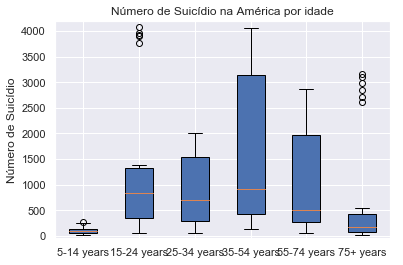

In [19]:
generate_boxplot_age_suicide(group_america_age, "Número de Suicídio na América por idade", 4200)

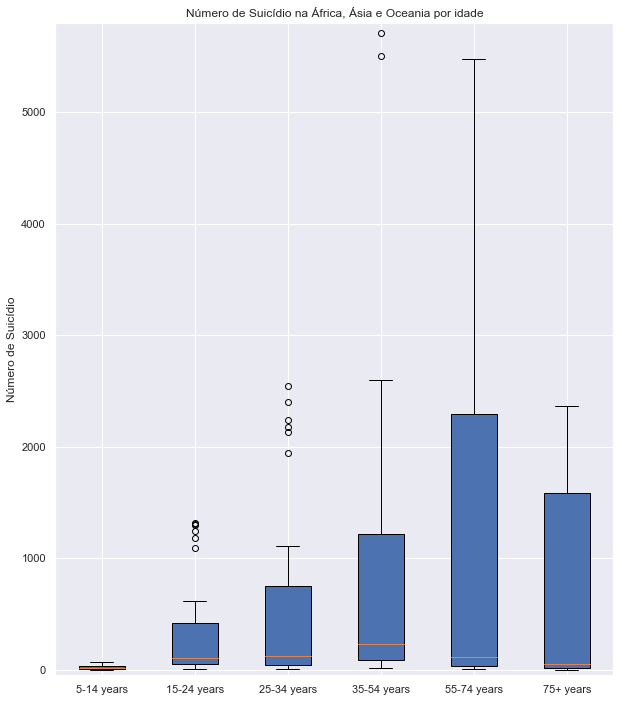

In [20]:
generate_boxplot_age_suicide(group_aao_age, "Número de Suicídio na África, Ásia e Oceania por idade", 5800)

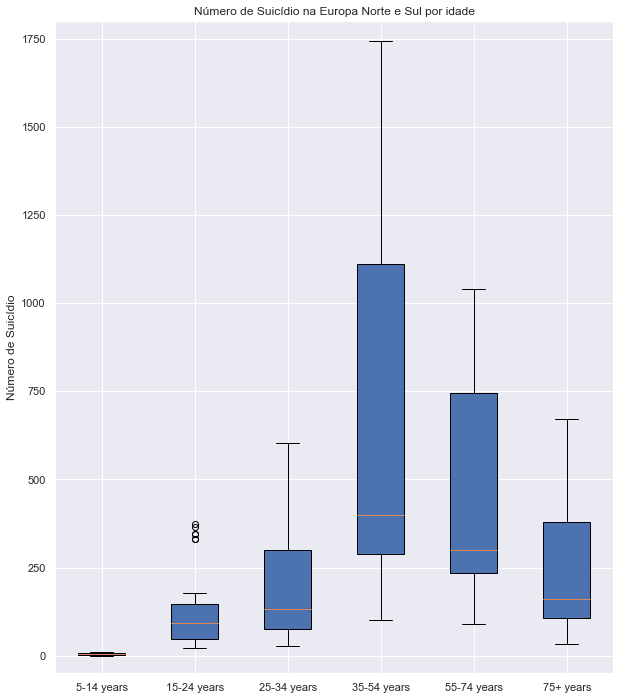

In [21]:
generate_boxplot_age_suicide(group_europe_ns_age, "Número de Suicídio na Europa Norte e Sul por idade", 1800)

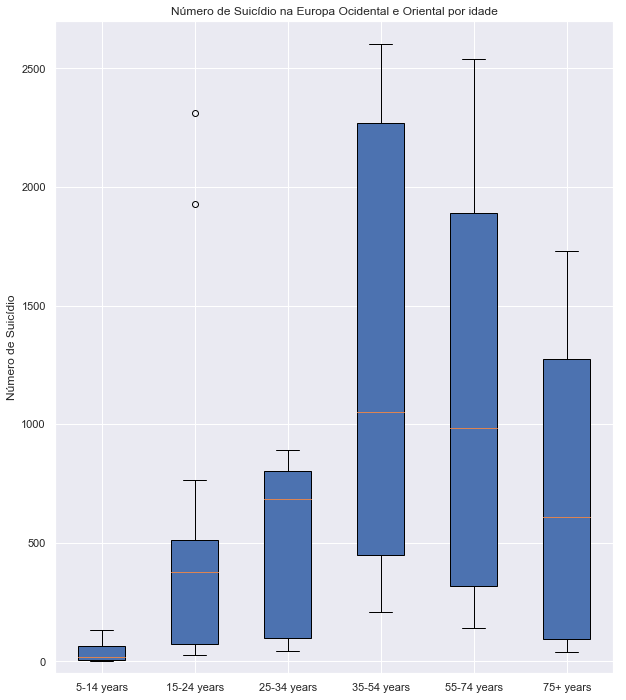

In [22]:
generate_boxplot_age_suicide(group_europe_we_age, "Número de Suicídio na Europa Ocidental e Oriental por idade", 2700)

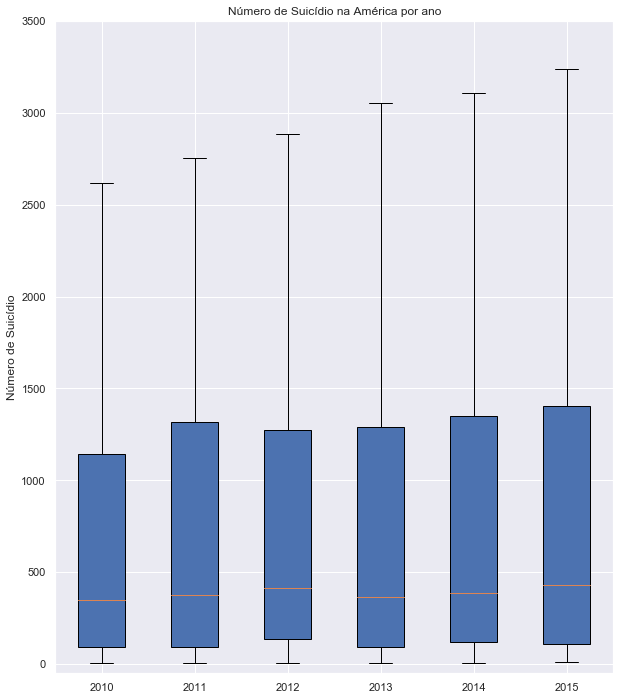

In [23]:
generate_boxplot_year_suicide(group_america_year, "Número de Suicídio na América por ano", 3500)

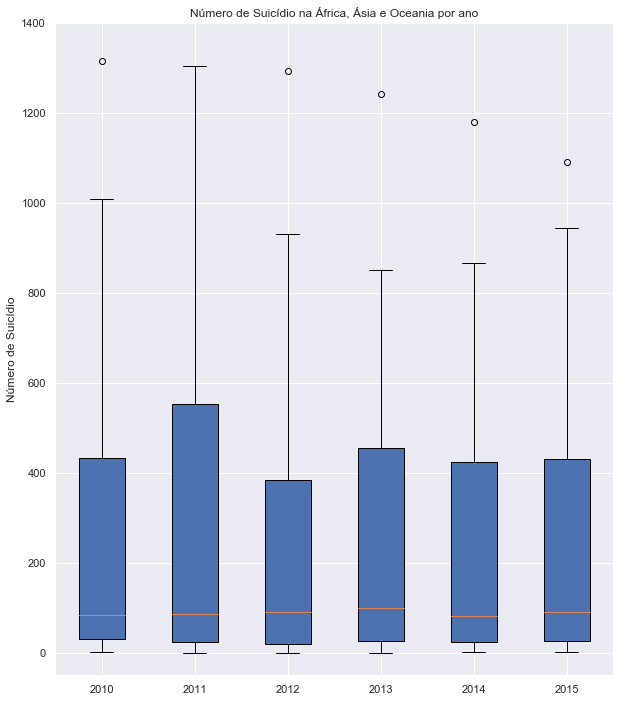

In [24]:
generate_boxplot_year_suicide(group_aao_year, "Número de Suicídio na África, Ásia e Oceania por ano", 1400)

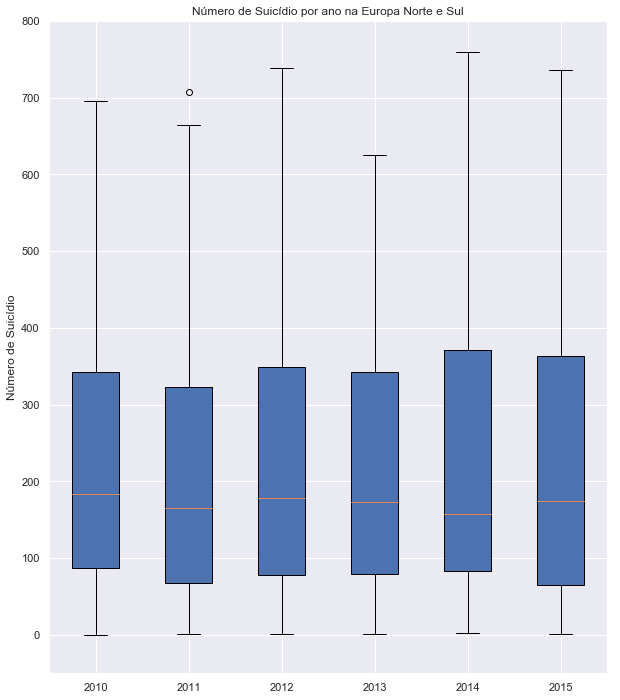

In [25]:
generate_boxplot_year_suicide(group_europe_ns_year, "Número de Suicídio por ano na Europa Norte e Sul",800)

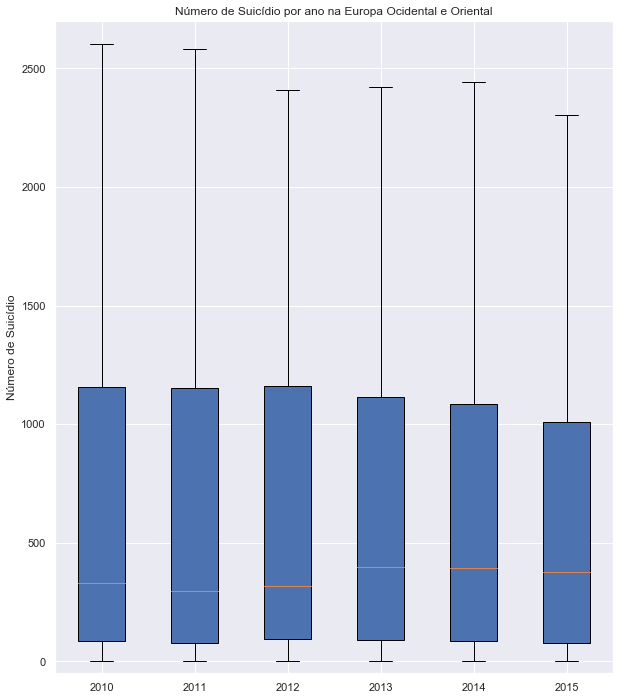

In [26]:
generate_boxplot_year_suicide(group_europe_we_year, "Número de Suicídio por ano na Europa Ocidental e Oriental",2700)

In [27]:
#Criação de frames por sub região.

frames = [brazil, chile]
south_america = pd.concat(frames, keys=['x', 'y'])

frames = [poland, russia]
eastern_europe = pd.concat(frames, keys=['x', 'y'])

frames = [sweden, unitedKingdom]
northern_europe = pd.concat(frames, keys=['x', 'y'])

frames = [italy, spain]
southern_europe = pd.concat(frames, keys=['x', 'y'])

frames = [ germany, netherlands]
western_europe = pd.concat(frames, keys=['x', 'y'])

frames = [israel, japan]
asia = pd.concat(frames, keys=['x', 'y'])

In [28]:
#America
mexico_male = mexico[(mexico["sex"] == "male")]
mexico_female = mexico[(mexico["sex"] == "female")]

unitedStates_male = unitedStates[(unitedStates["sex"] == "male")]
unitedStates_female = unitedStates[(unitedStates["sex"] == "female")]

brazil_male = brazil[(brazil["sex"] == "male")]
brazil_female = brazil[(brazil["sex"] == "female")]

chile_male = chile[(chile["sex"] == "male")]
chile_female = chile[(chile["sex"] == "female")]

#Asia, africa e Oceania
japan_male = japan[(japan["sex"] == "male")]
japan_female = japan[(japan["sex"] == "female")]

israel_male = israel[(israel["sex"] == "male")]
israel_female = israel[(israel["sex"] == "female")]

southAfrica_male = southAfrica[(southAfrica["sex"] == "male")]
southAfrica_female = southAfrica[(southAfrica["sex"] == "female")]

australia_male = australia[(australia["sex"] == "male")]
australia_female = australia[(australia["sex"] == "female")]

#Europa

netherlands_male = netherlands[(netherlands["sex"] == "male")]
netherlands_female = netherlands[(netherlands["sex"] == "female")]

unitedKingdom_male = unitedKingdom[(unitedKingdom["sex"] == "male")]
unitedKingdom_female = unitedKingdom[(unitedKingdom["sex"] == "female")]

spain_male = spain[(spain["sex"] == "male")]
spain_female = spain[(spain["sex"] == "female")]
  
italy_male = italy[(italy["sex"] == "male")]
italy_female = italy[(italy["sex"] == "female")]

germany_male = germany[(germany["sex"] == "male")]
germany_female = germany[(germany["sex"] == "female")]

poland_male = poland[(poland["sex"] == "male")]
poland_female = poland[(poland["sex"] == "female")]

russia_male = russia[(russia["sex"] == "male")]
russia_female = russia[(russia["sex"] == "female")]

sweden_male = sweden[(sweden["sex"] == "male")]
sweden_female = sweden[(sweden["sex"] == "female")]

In [29]:
#Frames de sexo separados por continente.

america_male = america[(america["sex"] == "male")]
america_female = america[(america["sex"] == "female")]

asiaAfricaOceania_male = asiaAfricaOceania[(asiaAfricaOceania["sex"] == "male")]
asiaAfricaOceania_female = asiaAfricaOceania[(asiaAfricaOceania["sex"] == "female")]

europe_ns_male = europe_northern_southern[(europe_northern_southern["sex"] == "male")]
europe_ns_female = europe_northern_southern[(europe_northern_southern["sex"] == "female")]

europe_we_male = europe_western_eastern[(europe_western_eastern["sex"] == "male")]
europe_we_female = europe_western_eastern[(europe_western_eastern["sex"] == "female")]

In [30]:
#Frames de sexo separados por sub região.

south_america_male = south_america[(south_america["sex"] == "male")]
south_america_female = south_america[(south_america["sex"] == "female")]

eastern_europe_male = eastern_europe[(eastern_europe["sex"] == "male")]
eastern_europe_female = eastern_europe[(eastern_europe["sex"] == "female")]

northern_europe_male = northern_europe[(northern_europe["sex"] == "male")]
northern_europe_female = northern_europe[(northern_europe["sex"] == "female")]

southern_europe_male = southern_europe[(southern_europe["sex"] == "male")]
southern_europe_female = southern_europe[(southern_europe["sex"] == "female")]

western_europe_male = western_europe[(western_europe["sex"] == "male")]
western_europe_female = western_europe[(western_europe["sex"] == "female")]

asia_male = asia[(asia["sex"] == "male")]
asia_female = asia[(asia["sex"] == "female")]

In [31]:
#Agrupando por países

#America
gbr = brazil.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gch = chile.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gme = mexico.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gus = unitedStates.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()

#Asia, africa e Oceania
gjp = japan.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gsa = southAfrica.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gis = israel.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gau = australia.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()

#Europa
gru = russia.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gsw = sweden.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gpo = poland.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gge = germany.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
git = italy.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gsp = spain.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
guk = unitedKingdom.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gne = netherlands.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()

In [32]:
#Agrupando por países sem considerar o sexo

#America
tgbr = brazil.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tgbr['suicides_no'] = list((tgbr['suicides_no']/tgbr['totalPopulation'])*100000)
tgbr['gdp-year'] = list(tgbr['gdp-year']/tgbr['totalPopulation'])

tgch = chile.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tgch['suicides_no'] = list((tgch['suicides_no']/tgch['totalPopulation'])*100000)
tgch['gdp-year'] = list(tgch['gdp-year']/tgch['totalPopulation'])

tgme = mexico.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tgme['suicides_no'] = list((tgme['suicides_no']/tgme['totalPopulation'])*100000)
tgme['gdp-year'] = list(tgme['gdp-year']/tgme['totalPopulation'])

tgus = unitedStates.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tgus['suicides_no'] = list((tgus['suicides_no']/tgus['totalPopulation'])*100000)
tgus['gdp-year'] = list(tgus['gdp-year']/tgus['totalPopulation'])

#Asia, africa e Oceania
tgjp = japan.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tgjp['suicides_no'] = list((tgjp['suicides_no']/tgjp['totalPopulation'])*100000)
tgjp['gdp-year'] = list(tgjp['gdp-year']/tgjp['totalPopulation'])

tgsa = southAfrica.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tgsa['suicides_no'] = list((tgsa['suicides_no']/tgsa['totalPopulation'])*100000)
tgsa['gdp-year'] = list(tgsa['gdp-year']/tgsa['totalPopulation'])

tgis = israel.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tgis['suicides_no'] = list((tgis['suicides_no']/tgis['totalPopulation'])*100000)
tgis['gdp-year'] = list(tgis['gdp-year']/tgis['totalPopulation'])

tgau = australia.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tgau['suicides_no'] = list((tgau['suicides_no']/tgau['totalPopulation'])*100000)
tgau['gdp-year'] = list(tgau['gdp-year']/tgau['totalPopulation'])

#Europa

tgru = russia.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tgru['suicides_no'] = list((tgru['suicides_no']/tgru['totalPopulation'])*100000)
tgru['gdp-year'] = list(tgru['gdp-year']/tgru['totalPopulation'])

tgsw = sweden.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tgsw['suicides_no'] = list((tgsw['suicides_no']/tgsw['totalPopulation'])*100000)
tgsw['gdp-year'] = list(tgsw['gdp-year']/tgsw['totalPopulation'])

tgpo = poland.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tgpo['suicides_no'] = list((tgpo['suicides_no']/tgpo['totalPopulation'])*100000)
tgpo['gdp-year'] = list(tgpo['gdp-year']/tgpo['totalPopulation'])

tgge = germany.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tgge['suicides_no'] = list((tgge['suicides_no']/tgge['totalPopulation'])*100000)
tgge['gdp-year'] = list(tgge['gdp-year']/tgge['totalPopulation'])

tgit = italy.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tgit['suicides_no'] = list((tgit['suicides_no']/tgit['totalPopulation'])*100000)
tgit['gdp-year'] = list(tgit['gdp-year']/tgit['totalPopulation'])

tgsp = spain.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tgsp['suicides_no'] = list((tgsp['suicides_no']/tgsp['totalPopulation'])*100000)
tgsp['gdp-year'] = list(tgsp['gdp-year']/tgsp['totalPopulation'])

tguk = unitedKingdom.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tguk['suicides_no'] = list((tguk['suicides_no']/tguk['totalPopulation'])*100000)
tguk['gdp-year'] = list(tguk['gdp-year']/tguk['totalPopulation'])

tgne = netherlands.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tgne['suicides_no'] = list((tgne['suicides_no']/tgne['totalPopulation'])*100000)
tgne['gdp-year'] = list(tgne['gdp-year']/tgne['totalPopulation'])

In [33]:
def generate_chart_lin(df0, df1, df2, df3, df4,df5,df6, df7, df8, df9,df10,df11,df12, df13, df14,df15,
                               col_y, col_value, x_limit, x_label, y_label, legend, title):
    plt.plot(df0[col_y],df0[col_value], color='yellow' )
    plt.plot (df1[col_y],df1[col_value], color='red' )
    plt.plot (df2[col_y],df2[col_value], color='sienna' )
    plt.plot (df3[col_y],df3[col_value], color='cadetblue' )
    plt.plot (df4[col_y],df4[col_value], color='darkred' )
    plt.plot (df5[col_y],df5[col_value], color='green' )
    plt.plot (df6[col_y],df6[col_value], color='darkorange' )
    plt.plot (df7[col_y],df7[col_value], color='c' )
    plt.plot (df8[col_y],df8[col_value], color='y' )
    plt.plot (df9[col_y],df9[col_value], color='r' )
    plt.plot (df10[col_y],df10[col_value], color='blue' )
    plt.plot (df11[col_y],df11[col_value], color='lightgreen' )
    plt.plot (df12[col_y],df12[col_value], color='violet' )
    plt.plot (df13[col_y],df13[col_value], color='darkcyan' )
    plt.plot (df14[col_y],df14[col_value], color='olive' )
    plt.plot (df15[col_y],df15[col_value], color='aqua' )
    plt.xlim(x_limit)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(legend)
    plt.title(title)
    plt.show()
    # Referência: https://mharias.com/2017/08/24/352/

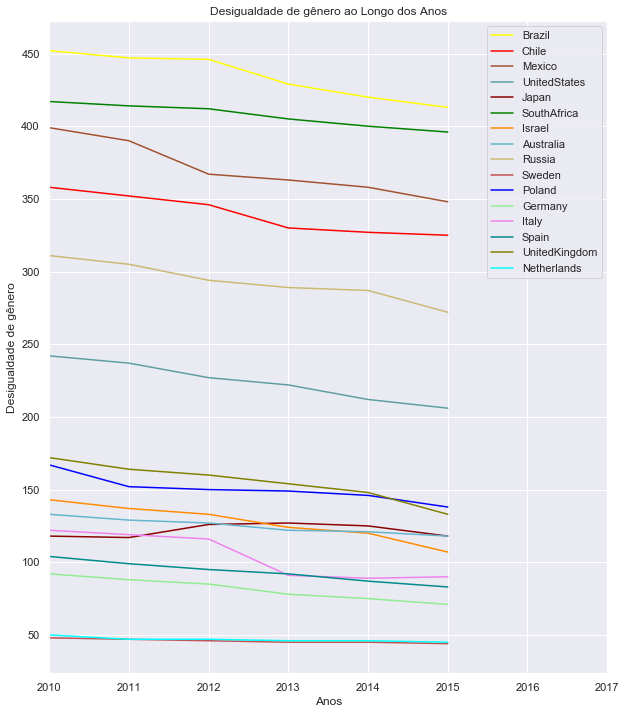

In [34]:
generate_chart_lin(tgbr, tgch,tgme,tgus,tgjp,tgsa,tgis,tgau,tgru,tgsw,tgpo,tgge,tgit,tgsp,tguk,tgne,
                           'year',"genderInequality",[2010,2017],'Anos', 'Desigualdade de gênero', 
                           ['Brazil','Chile','Mexico','UnitedStates','Japan','SouthAfrica',
                            'Israel','Australia','Russia','Sweden', 'Poland',
                            'Germany','Italy', 'Spain','UnitedKingdom', 'Netherlands'], 
                            'Desigualdade de gênero ao Longo dos Anos' )

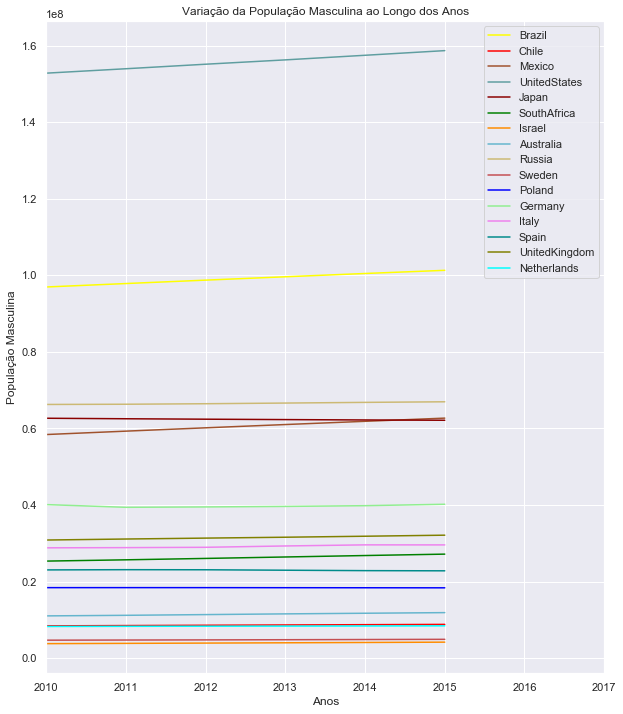

In [35]:
generate_chart_lin(tgbr, tgch,tgme,tgus,tgjp,tgsa,tgis,tgau,tgru,tgsw,tgpo,tgge,tgit,tgsp,tguk,tgne,
                           'year',"totalPopulationMale",[2010,2017],'Anos', 'População Masculina', 
                           ['Brazil','Chile','Mexico','UnitedStates','Japan','SouthAfrica',
                            'Israel','Australia','Russia','Sweden', 'Poland',
                            'Germany','Italy', 'Spain','UnitedKingdom', 'Netherlands'], 
                            'Variação da População Masculina ao Longo dos Anos' )

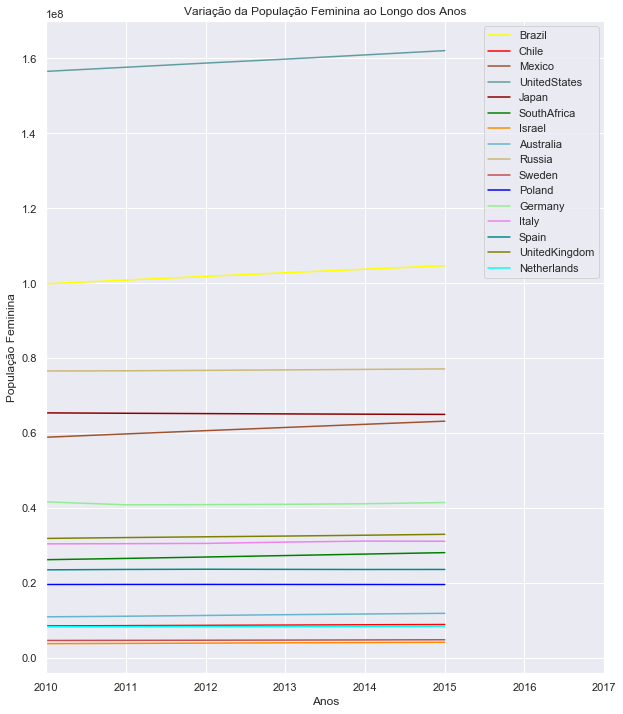

In [36]:
generate_chart_lin(tgbr, tgch,tgme,tgus,tgjp,tgsa,tgis,tgau,tgru,tgsw,tgpo,tgge,tgit,tgsp,tguk,tgne,
                           'year',"totalPopulationFemale",[2010,2017],'Anos', 'População Feminina', 
                           ['Brazil','Chile','Mexico','UnitedStates','Japan','SouthAfrica',
                            'Israel','Australia','Russia','Sweden', 'Poland',
                            'Germany','Italy', 'Spain','UnitedKingdom', 'Netherlands'], 
                            'Variação da População Feminina ao Longo dos Anos' )

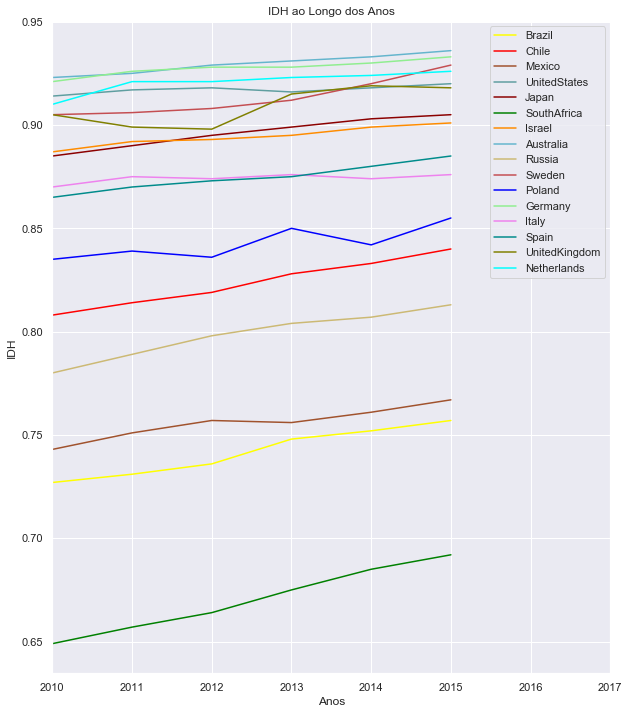

In [37]:
generate_chart_lin(tgbr, tgch,tgme,tgus,tgjp,tgsa,tgis,tgau,tgru,tgsw,tgpo,tgge,tgit,tgsp,tguk,tgne,
                           'year',"hdi",[2010,2017],'Anos', 'IDH', 
                           ['Brazil','Chile','Mexico','UnitedStates','Japan','SouthAfrica',
                            'Israel','Australia','Russia','Sweden', 'Poland',
                            'Germany','Italy', 'Spain','UnitedKingdom', 'Netherlands'], 
                            'IDH ao Longo dos Anos' )

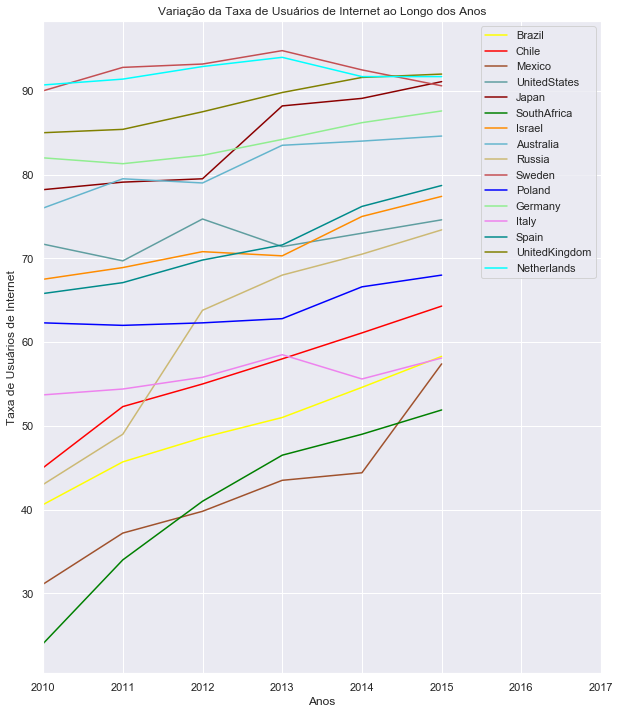

In [38]:
generate_chart_lin(tgbr, tgch,tgme,tgus,tgjp,tgsa,tgis,tgau,tgru,tgsw,tgpo,tgge,tgit,tgsp,tguk,tgne,
                           'year',"totalUsersInternet",[2010,2017],'Anos', 'Taxa de Usuários de Internet', 
                           ['Brazil','Chile','Mexico','UnitedStates','Japan','SouthAfrica',
                            'Israel','Australia','Russia','Sweden', 'Poland',
                            'Germany','Italy', 'Spain','UnitedKingdom', 'Netherlands'], 
                            'Variação da Taxa de Usuários de Internet ao Longo dos Anos' )

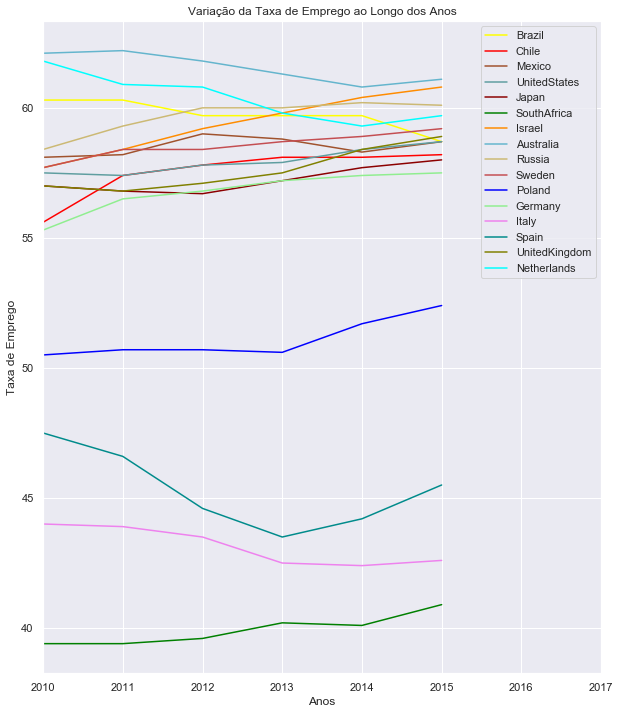

In [39]:
generate_chart_lin(tgbr, tgch,tgme,tgus,tgjp,tgsa,tgis,tgau,tgru,tgsw,tgpo,tgge,tgit,tgsp,tguk,tgne,
                           'year',"rateEmployment15andOlder",[2010,2017],'Anos', 'Taxa de Emprego', 
                           ['Brazil','Chile','Mexico','UnitedStates','Japan','SouthAfrica',
                            'Israel','Australia','Russia','Sweden', 'Poland',
                            'Germany','Italy', 'Spain','UnitedKingdom', 'Netherlands'], 
                            'Variação da Taxa de Emprego ao Longo dos Anos' )

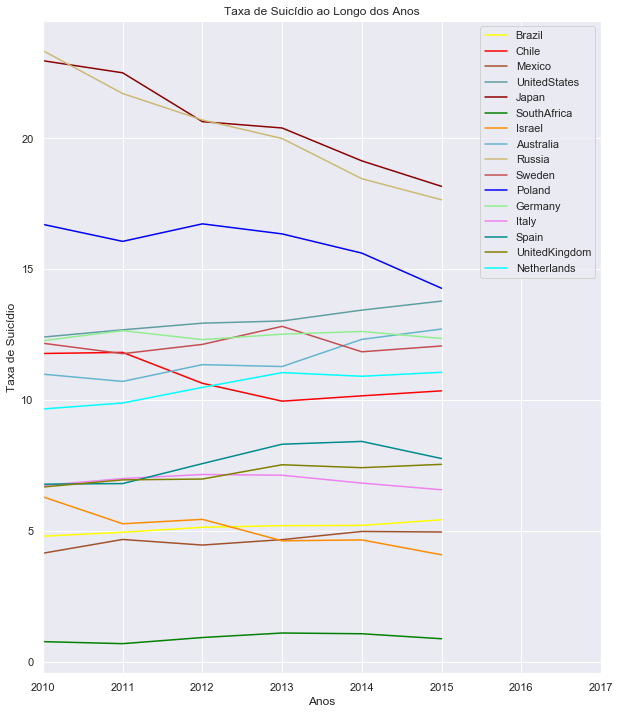

In [40]:
generate_chart_lin(tgbr, tgch,tgme,tgus,tgjp,tgsa,tgis,tgau,tgru,tgsw,tgpo,tgge,tgit,tgsp,tguk,tgne,
                           'year',"suicides_no",[2010,2017],'Anos', 'Taxa de Suicídio', 
                           ['Brazil','Chile','Mexico','UnitedStates','Japan','SouthAfrica',
                            'Israel','Australia','Russia','Sweden', 'Poland',
                            'Germany','Italy', 'Spain','UnitedKingdom', 'Netherlands'], 
                            'Taxa de Suicídio ao Longo dos Anos' )

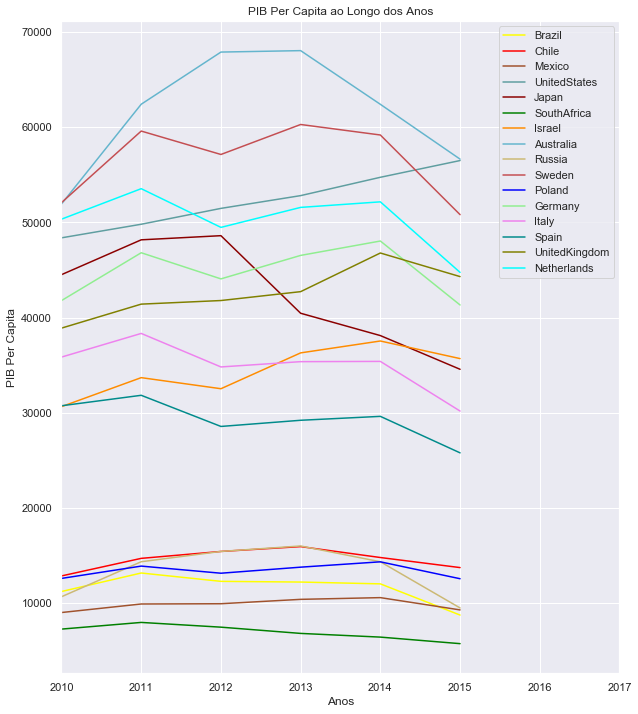

In [41]:
generate_chart_lin(tgbr, tgch,tgme,tgus,tgjp,tgsa,tgis,tgau,tgru,tgsw,tgpo,tgge,tgit,tgsp,tguk,tgne,
                           'year',"gdp-year",[2010,2017],'Anos', 'PIB Per Capita', 
                           ['Brazil','Chile','Mexico','UnitedStates','Japan','SouthAfrica',
                            'Israel','Australia','Russia','Sweden', 'Poland',
                            'Germany','Italy', 'Spain','UnitedKingdom', 'Netherlands'], 
                            'PIB Per Capita ao Longo dos Anos' )

In [42]:
#Agrupando por Continente

gamerica = america.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder", "continent"], as_index=False).sum()
gaao = asiaAfricaOceania.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder", "continent"], as_index=False).sum()
geurons = europe_northern_southern.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder", "continent"], as_index=False).sum()
geurowe = europe_western_eastern.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder", "continent"], as_index=False).sum()

In [43]:
# unindo todos os paises com seus respectivos continentes:
allcountrys = pd.concat([geurons, gamerica,gaao, geurowe], sort= True)
allcountrys = allcountrys.sort_values(by=['country','year'])
allcountrys['suicides_no'] = list((allcountrys['suicides_no']/allcountrys['totalPopulation'])*100000)
allcountrys['gdp-year'] = list(allcountrys['gdp-year']/allcountrys['totalPopulation'])

In [44]:
def generate_3d_bouble_chart(df, x_column, y_column, z_column, text, color_column, title_color_column, title_chart, file_name):
    trace1 = go.Scatter3d(
        x=df[x_column],
        y=df[y_column],
        z=df[z_column],
        text=df[text],
        mode='markers',
        marker=dict(
            sizemode='diameter',
            sizeref=750,
            color = df[color_column],
            colorscale = 'Viridis',
            colorbar = dict(title = title_color_column),
            line=dict(color='rgb(140, 140, 170)')
        )
    )

    data=[trace1]

    layout=go.Layout(height=800, width=800, title=title_chart)

    fig=go.Figure(data=data, layout=layout)
    py.iplot(fig, filename=file_name)
   
    #Referência: https://plot.ly/python/3d-bubble-charts/

In [45]:
# Taxa de suicídio:
generate_3d_bouble_chart(allcountrys,'year','continent','totalPopulation',
                         'country','suicides/100kpop','Suicidio por cada<br>100 mil Habitantes',
                         'Relação:<br>Tamanho da População X Taxa de Suicídio ao Longo do Tempo', 'analise_taxa')
# Desigualdade de gênero:
generate_3d_bouble_chart(allcountrys,'year','continent','totalPopulation',
                         'country','genderInequality','Desigualdade<br>de genero',
                         'Relação:<br>Tamanho da População X Desigualdade de genero ao Longo do Tempo', 'analise_genero_eq')
# PIB Per Capita:
generate_3d_bouble_chart(allcountrys,'year','continent','totalPopulation',
                         'country','gdp-year','PIB<br>Per Capita',
                         'Relação:<br>Tamanho da População X PIB Per Capita ao Longo do Tempo', 'analise_gdp')
# IDH
generate_3d_bouble_chart(allcountrys,'year','continent','totalPopulation',
                         'country','hdi','IDH',
                         'Relação:<br>Tamanho da População X Índice de Desenvolvimento Humano ao Longo do Tempo', 'analise_idh')
# Taxa de Usuários com Internet
generate_3d_bouble_chart(allcountrys,'year','continent','totalPopulation',
                         'country','totalUsersInternet','Taxa de Usuários com Internet',
                         'Relação:<br>Tamanho da População X Taxa de Usuários com Internet ao Longo do Tempo', 'analise_int')
# Taxa de Emprego
generate_3d_bouble_chart(allcountrys,'year','continent','totalPopulation',
                         'country','rateEmployment15andOlder','Taxa de Emprego',
                         'Relação:<br>Tamanho da População X Taxa de Emprego ao Longo do Tempo', 'analise_emp')
# Taxa de Suicidio x Taxa de Emprego
generate_3d_bouble_chart(allcountrys,'year','continent','suicides_no',
                         'country','rateEmployment15andOlder','Taxa de Emprego',
                         'Relação:<br>Tamanho de Suicídio X Taxa de Emprego ao Longo do Tempo', 'analise_suicide_emp')

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [46]:
#Agrupando por sub região

south_america_group = south_america.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
eastern_europe_group = eastern_europe.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
northern_europe_group = northern_europe.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
southern_europe_group = southern_europe.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
western_europe_group = western_europe.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
asia_group = asia.groupby(["year","country","totalPopulationFemale","totalPopulationMale","gdp-year","gdp-per-capita","hdi"], as_index=False).sum()

In [47]:
def axis_x_center(length=1):
    start = -(length//2) if length%2 == 0 else -((length//2))
    end = (length//2) if length%2 == 0 else ((length//2)+1)
    
    return [x for x in range(start, end)]

In [48]:
#Função para gerar gráfico de taxa de suicídio por gênero.
# Os comentários abaixo podem ser aplicados paras as demais funções semelhantes.
def generate_chart_suicide_gen(df, axis_y, axis_x, title, list_colors, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y) # label do eixo y
    plt.xlabel(axis_x) # label do eixo x
    plt.title(title) # titulo do gráfico
    plt.rcParams["figure.figsize"] = (10,8)
    ax = plt.subplot() # Necessário para plotar o tipo de gráfico que será utilizado.
    
    country_sex = list(df["sex"].unique())  # Pega os valores unicos da coluna do df.
    year_df = list(df["year"].unique())  # Pega os valores unicos da coluna do df.
    country_year = np.asarray(year_df) # Converte em um array do numpy.
    
    list_num = axis_x_center(len(country_sex))  # Centraliza os labels dos paises. - # Centraliza os labels do eixo x.
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+3)))  # alterar as larguras dos limites no eixo x.
    plt.xticks(country_year) #  #seta os labels do eixo x
    
    for index in range(len(country_sex)):
        if country_sex[index] == "female":
            country_list = list((df["suicides_no"][df["sex"] == country_sex[index]]/df["totalPopulationFemale"][df["sex"] == country_sex[index]])*100000)
            # Linha anterior: Monta a lista que será passada no gráfico com os dados que se quer para o gráfico. Irá variar para cada tipo de dado que quer mostrar no gráfico.
            country_list = np.asarray(country_list) # Converte em um array do numpy.
        elif country_sex[index] == "male":
            country_list = list((df["suicides_no"][df["sex"] == country_sex[index]]/df["totalPopulationMale"][df["sex"] == country_sex[index]])*100000)
            # Linha anterior: Monta a lista que será passada no gráfico com os dados que se quer para o gráfico. Irá variar para cada tipo de dado que quer mostrar no gráfico.
            country_list = np.asarray(country_list) # Converte em um array do numpy.
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_sex[index], color=list_colors[index])
        # Parâmetros da linha anterior: label eixo x (ex: anos), (eixo y), largura, alinhamento, as barras, lista de cores.
        ax.legend(loc="upper left") # legendas do grafico.


    plt.show()

In [49]:
#Função para gerar gráfico de taxa de suicídio por idade.
def generate_chart_suicide_age(df, axis_y, axis_x, title, list_colors, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.rcParams["figure.figsize"] = (14,12)
    ax = plt.subplot()
    
    country_age = list(df["age"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_age)) # Centraliza os labels do eixo x
    plt.xlim(country_year[0]+(wd*(list_num[0]-6)), country_year[-1]+(wd*(list_num[-1]+3))) # alterar as larguras dos limites no eixo x.
    plt.xticks(country_year) #seta os labels do eixo x
    
    for index in range(len(country_age)):
        country_list = list(df["suicides/100kpop"][df["age"] == country_age[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_age[index], color=list_colors[index])
       # label eixo x (ex: anos), (eixo y), largura, alinhamento, las barras, lista de cores.
        ax.legend(loc="upper left") # legendas do grafico.
    plt.show()

In [50]:
#Função para gerar gráfico de taxa de suicídio total por país.
def generate_chart_suicide_total(df, axis_y, axis_x, title, list_colors, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.rcParams["figure.figsize"] = (14,12)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name)) 
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+3)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list((df["suicides_no"][df["country"] == country_name[index]]/df["totalPopulation"][df["country"] == country_name[index]])*100000)
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper right")


    plt.show()

In [51]:
#Função para gerar gráfico de taxa de idh total por país.
def generate_chart_hdi_total(df, axis_y, axis_x, title, list_colors, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.ylim(0.6, 1)
    plt.rcParams["figure.figsize"] = (14,12)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_hdi = list(df["hdi"][df["country"] == country_name[index]])
        country_hdi = np.asarray(country_hdi)
        ax.bar(country_year+(wd*list_num[index]), country_hdi, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show() 

In [52]:
#Função para gerar gráfico de Desigualdade de Gênero por país.
def generate_chart_gender_inequality(df, axis_y, axis_x, title, list_colors, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.rcParams["figure.figsize"] = (14,12)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-2)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list((df["genderInequality"][df["country"] == country_name[index]]))
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper right")


    plt.show()

In [53]:
#Função para gerar gráfico do PIB por país.
def generate_chart_gdp_year(df, axis_y, axis_x, title, list_colors, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.rcParams["figure.figsize"] = (14,12)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-2)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list(df["gdp-year"][df["country"] == country_name[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [54]:
#Função para gerar gráfico de população total por país.
def generate_chart_total_pop(df, axis_y, axis_x, title, list_colors, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.rcParams["figure.figsize"] = (14,12)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-2)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list(df["totalPopulation"][df["country"] == country_name[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [55]:
#Função para gerar gráfico de taxa de PIB per capita por país.
def generate_chart_gdp_pc(df, axis_y, axis_x, title, list_colors,wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.rcParams["figure.figsize"] = (14,12)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name)) 
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+3))) 
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list((df["gdp-year"][df["country"] == country_name[index]]/df["totalPopulation"][df["country"] == country_name[index]]))
        country_list = np.asarray(country_list)  # converter uma lista num array numpy.
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [56]:
def generate_chart_rate_population_age(df, axis_y, axis_x, title, population_sex, list_colors,wd = 0.15):
    list_colors = list_colors
    population_sex = population_sex
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.rcParams["figure.figsize"] = (15,10)
    ax = plt.subplot()
    
    country_age = list(df["age"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_age)) 
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+3))) 
    plt.xticks(country_year)
    
    for index in range(len(country_age)):
        country_list = list((df["population"][df["age"] == country_age[index]]) / (df[population_sex][df["age"] == country_age[index]])*100)
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_age[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [57]:
def generate_chart_rate_population_gen(df, axis_y, axis_x, title, list_colors, limy1= 45, limy2= 54, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y) 
    plt.xlabel(axis_x) 
    plt.title(title)
    plt.ylim(limy1,limy2)
    plt.rcParams["figure.figsize"] = (10,8)
    ax = plt.subplot() 
    
    country_sex = list(df["sex"].unique()) 
    year_df = list(df["year"].unique()) 
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_sex))  
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+3))) 
    plt.xticks(country_year) 
    
    for index in range(len(country_sex)):
        if country_sex[index] == "female":
            country_list = list((df["totalPopulationFemale"][df["sex"] == country_sex[index]]/df["totalPopulation"][df["sex"] == country_sex[index]])*100)
            country_list = np.asarray(country_list) 
        elif country_sex[index] == "male":
            country_list = list((df["totalPopulationMale"][df["sex"] == country_sex[index]]/df["totalPopulation"][df["sex"] == country_sex[index]])*100)
            country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_sex[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [58]:
#Função para gerar gráfico de taxa de usuários de internet por país.
def generate_chart_users_internet(df, axis_y, axis_x, title, list_colors, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.rcParams["figure.figsize"] = (14,12)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-5)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list(df["totalUsersInternet"][df["country"] == country_name[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [59]:
#Função para gerar gráfico de taxa de Empregados por país.
def generate_chart_employment(df, axis_y, axis_x, title, list_colors,  ylim1=50, ylim2=60, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.ylim(ylim1,ylim2)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-5)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list(df["rateEmployment15andOlder"][df["country"] == country_name[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [60]:
def generate_growth_pop_age_lin(df, col_y, col_f, col_m, x_limit, x_label, y_label, legend, title):
    plt.plot(df[col_y],df[col_f], color='red' )
    plt.plot (df[col_y],df[col_m], color='green' )
    plt.xlim(x_limit)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(legend)
    plt.title(title)
    plt.show()

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



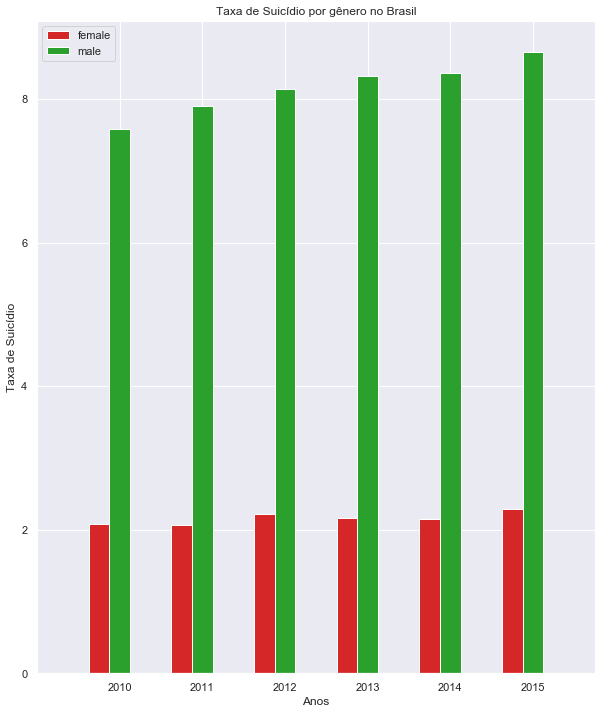

In [61]:
generate_chart_suicide_gen(gbr, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero no Brasil",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



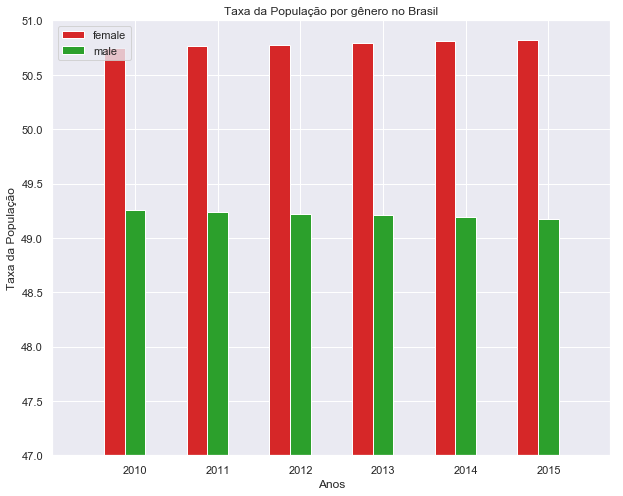

In [62]:
generate_chart_rate_population_gen(gbr, "Taxa da População", "Anos", "Taxa da População por gênero no Brasil",male_female_colors,47,51,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



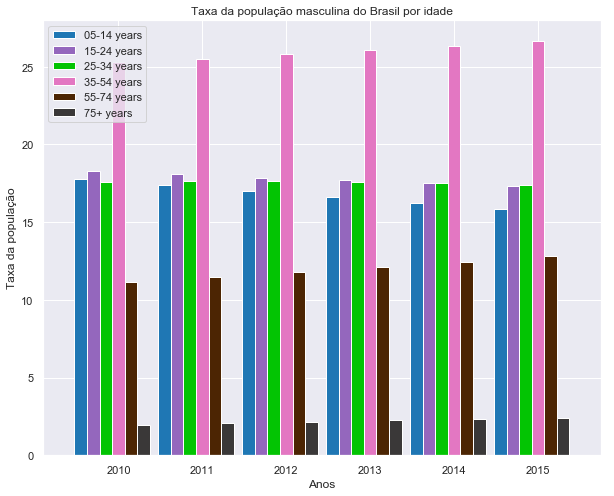

In [63]:
generate_chart_rate_population_age(brazil_male, "Taxa da população", "Anos", "Taxa da população masculina do Brasil por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



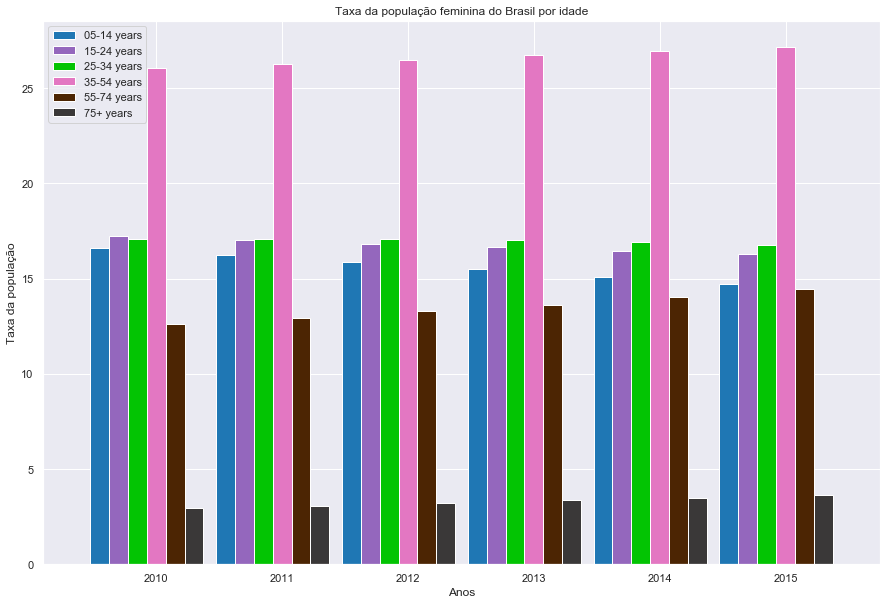

In [64]:
generate_chart_rate_population_age(brazil_female, "Taxa da população", "Anos", "Taxa da população feminina do Brasil por idade", "totalPopulationFemale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



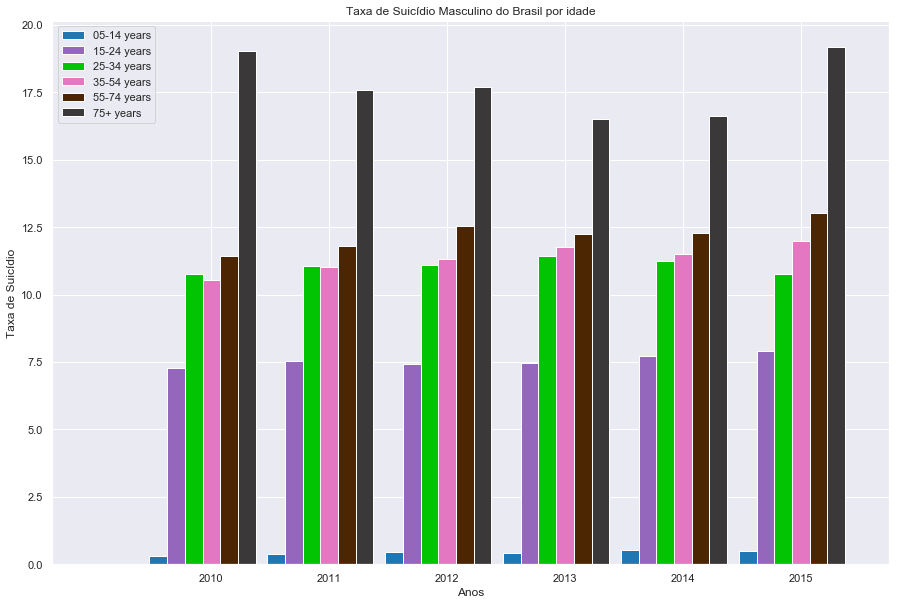

In [65]:
generate_chart_suicide_age(brazil_male, "Taxa de Suicídio", "Anos", "Taxa de Suicídio Masculino do Brasil por idade", age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



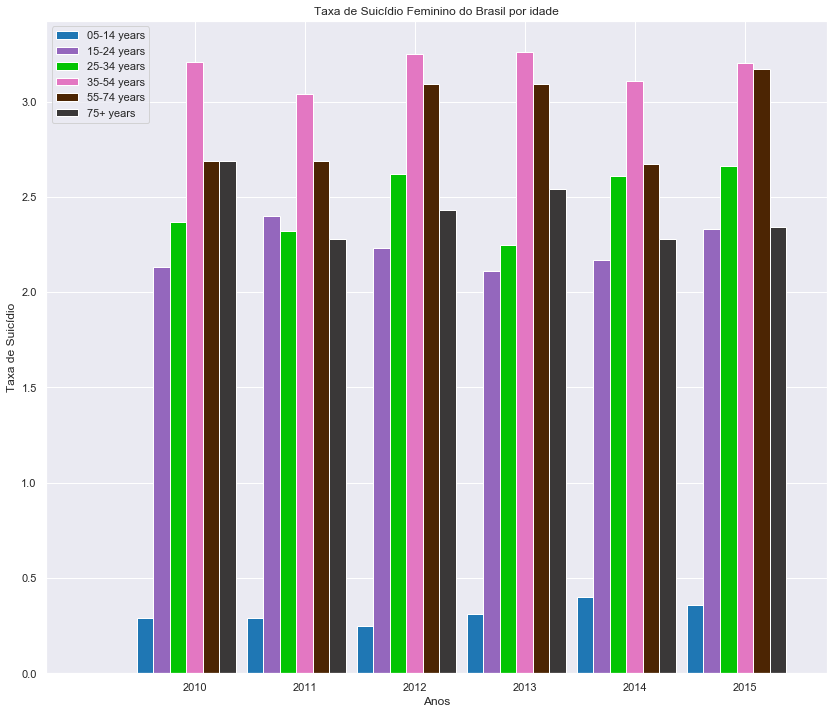

In [66]:
generate_chart_suicide_age(brazil_female, "Taxa de Suicídio", "Anos", "Taxa de Suicídio Feminino do Brasil por idade", age_colors, 0.15)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



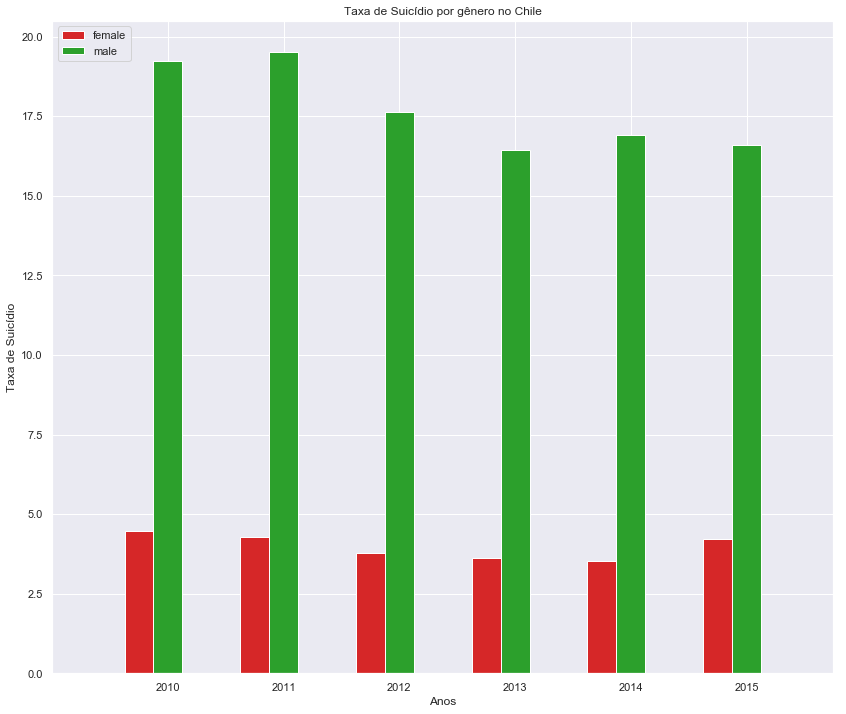

In [67]:
generate_chart_suicide_gen(gch, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero no Chile",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



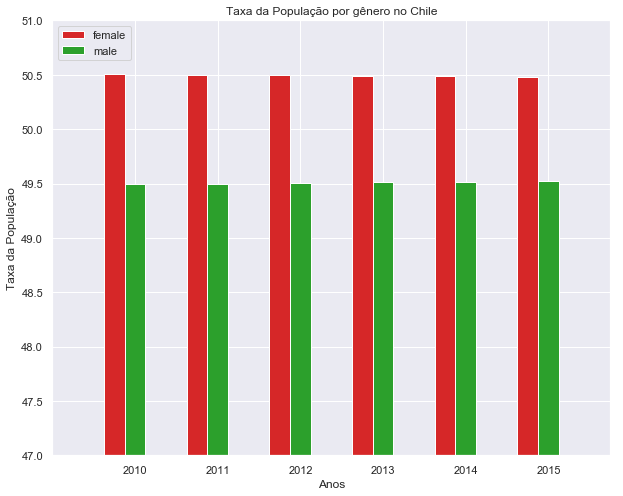

In [68]:
generate_chart_rate_population_gen(gch, "Taxa da População", "Anos", "Taxa da População por gênero no Chile",male_female_colors,47,51,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



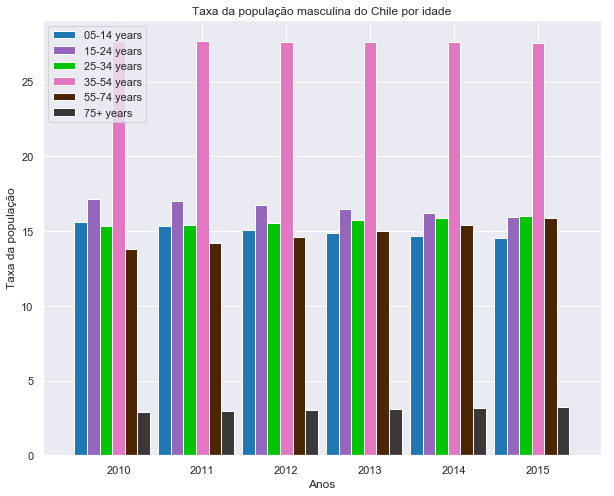

In [69]:
generate_chart_rate_population_age(chile_male, "Taxa da população", "Anos", "Taxa da população masculina do Chile por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



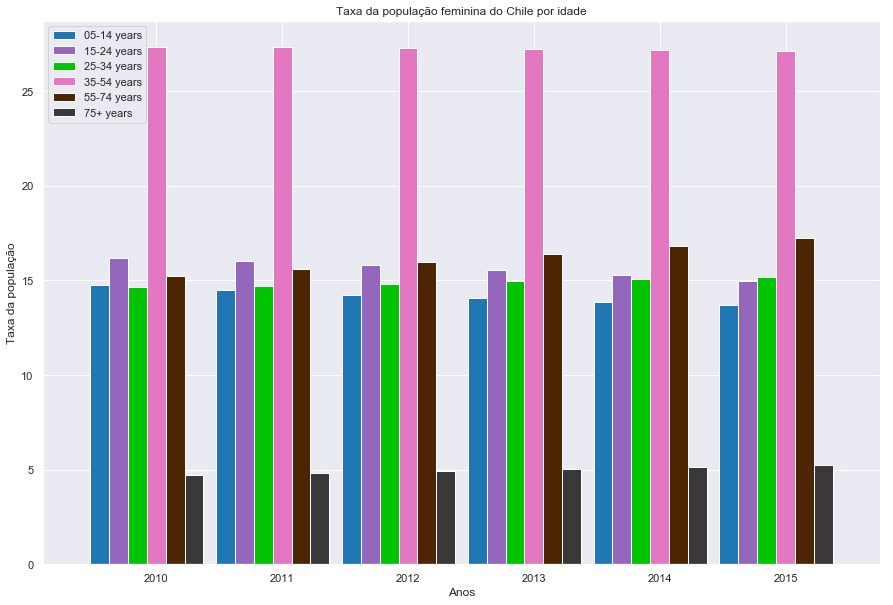

In [70]:
generate_chart_rate_population_age(chile_female, "Taxa da população", "Anos", "Taxa da população feminina do Chile por idade", "totalPopulationFemale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



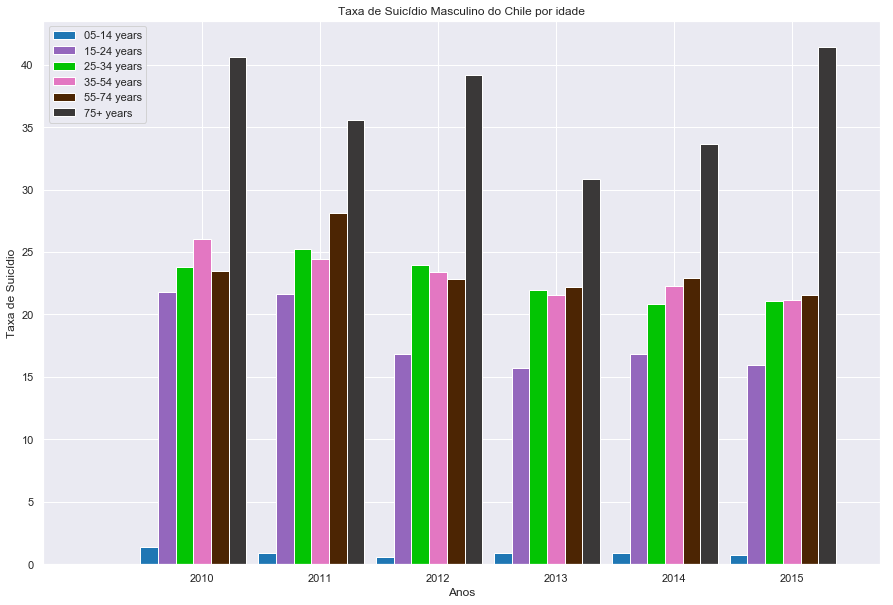

In [71]:
generate_chart_suicide_age(chile_male, "Taxa de Suicídio", "Anos", "Taxa de Suicídio Masculino do Chile por idade", age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



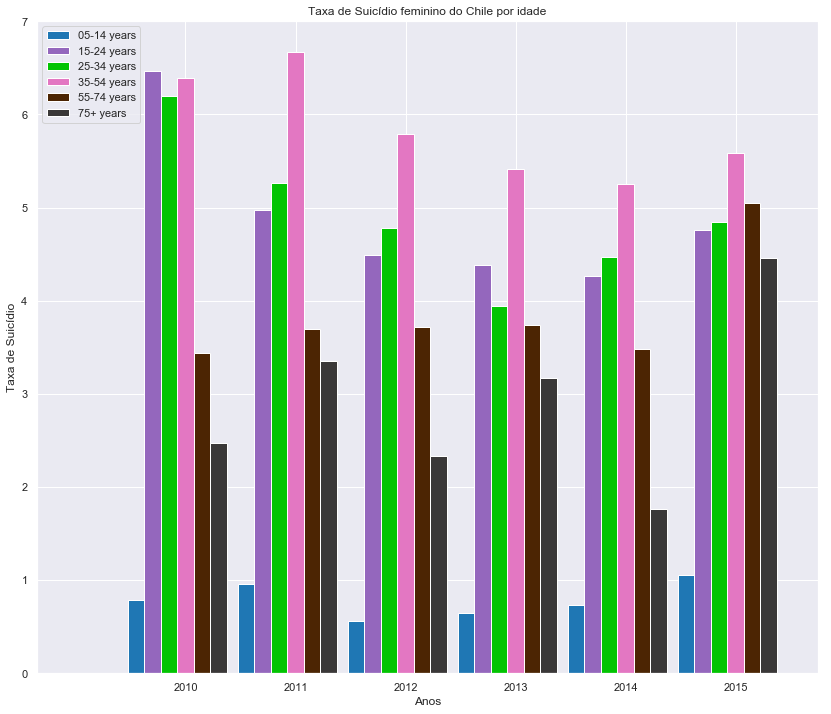

In [72]:
generate_chart_suicide_age(chile_female, "Taxa de Suicídio", "Anos", "Taxa de Suicídio feminino do Chile por idade", age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



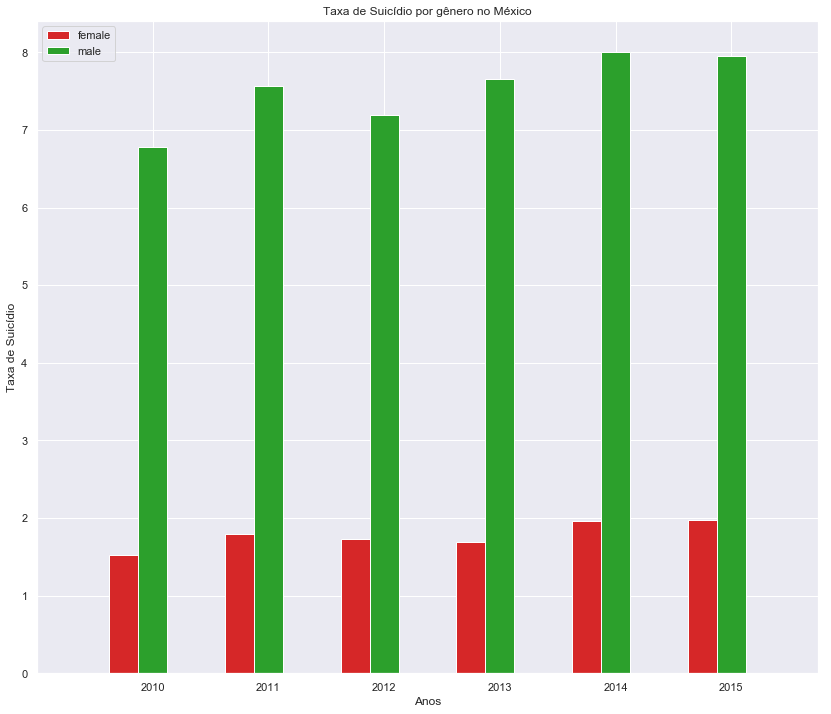

In [73]:
generate_chart_suicide_gen(gme, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero no México",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



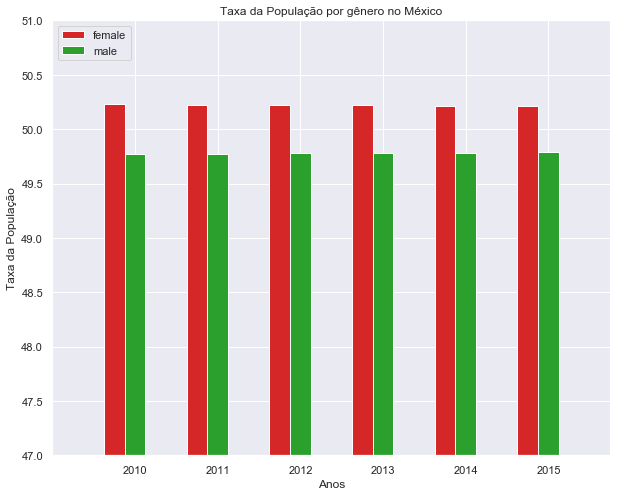

In [74]:
generate_chart_rate_population_gen(gme, "Taxa da População", "Anos", "Taxa da População por gênero no México",male_female_colors,47,51,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



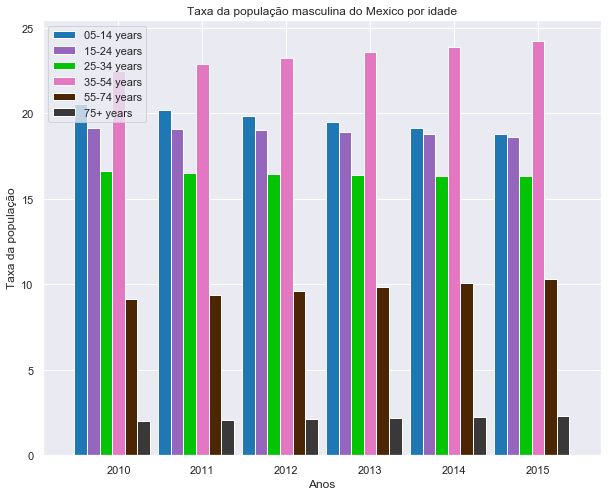

In [75]:
generate_chart_rate_population_age(mexico_male, "Taxa da população", "Anos", "Taxa da população masculina do Mexico por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



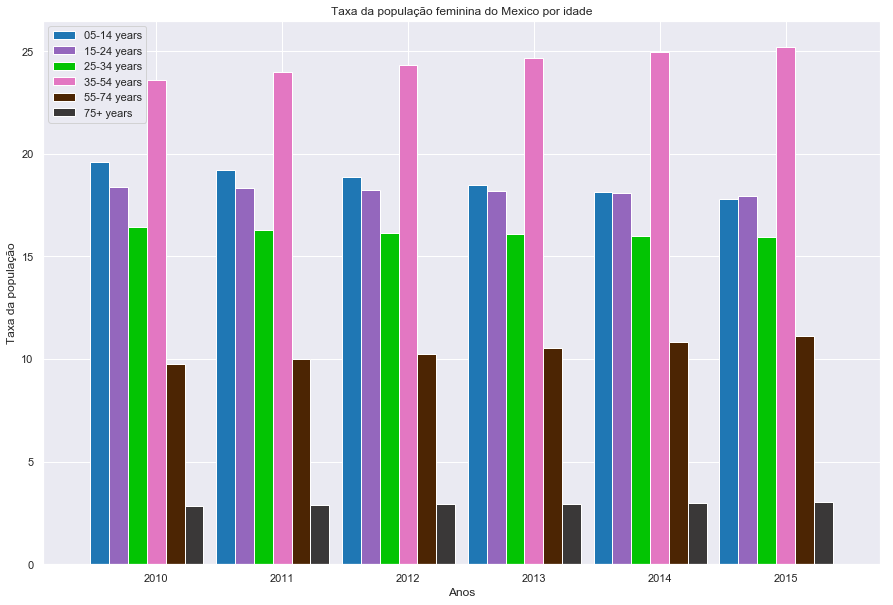

In [76]:
generate_chart_rate_population_age(mexico_female, "Taxa da população", "Anos", "Taxa da população feminina do Mexico por idade", "totalPopulationFemale",age_colors)


C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



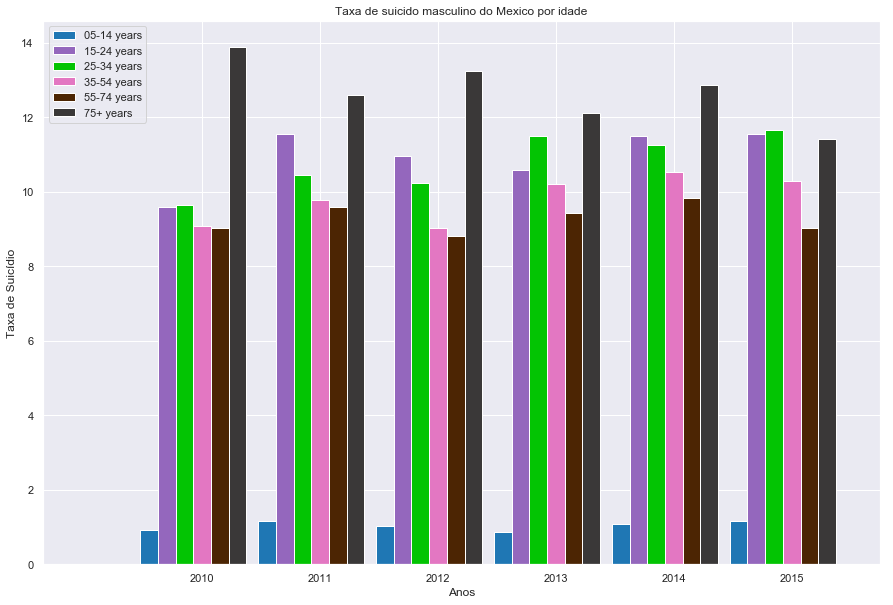

In [77]:
generate_chart_suicide_age(mexico_male, "Taxa de Suicídio", "Anos", "Taxa de suicido masculino do Mexico por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



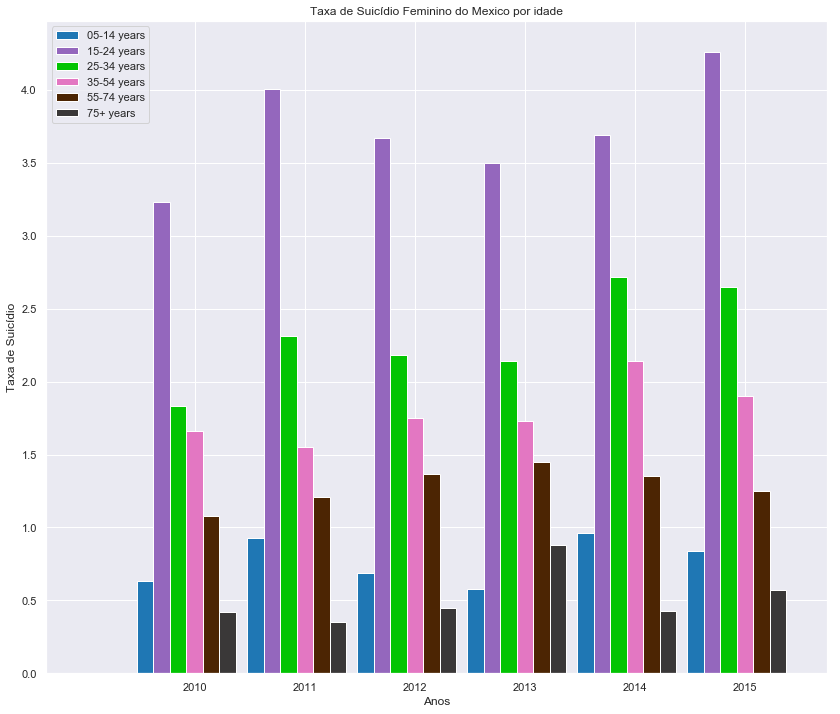

In [78]:
generate_chart_suicide_age(mexico_female, "Taxa de Suicídio", "Anos", "Taxa de Suicídio Feminino do Mexico por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



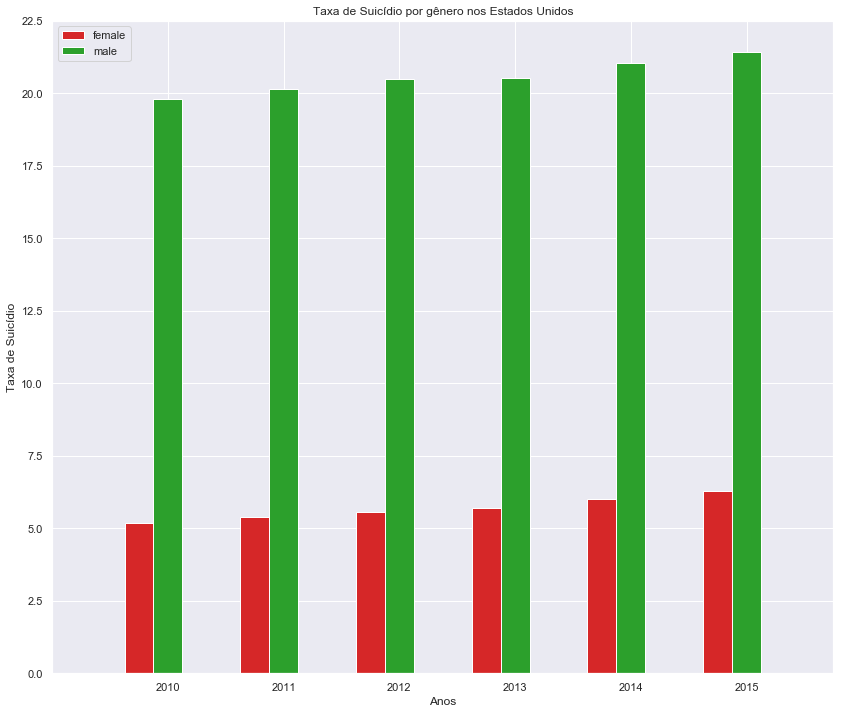

In [79]:
generate_chart_suicide_gen(gus, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero nos Estados Unidos",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



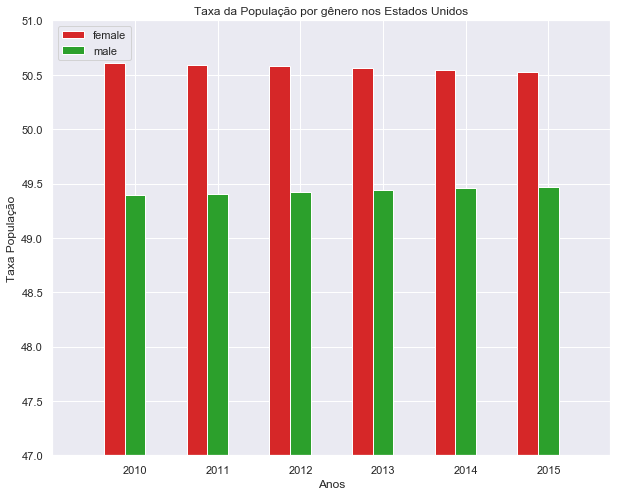

In [80]:
generate_chart_rate_population_gen(gus, "Taxa População", "Anos", "Taxa da População por gênero nos Estados Unidos",male_female_colors,47,51,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



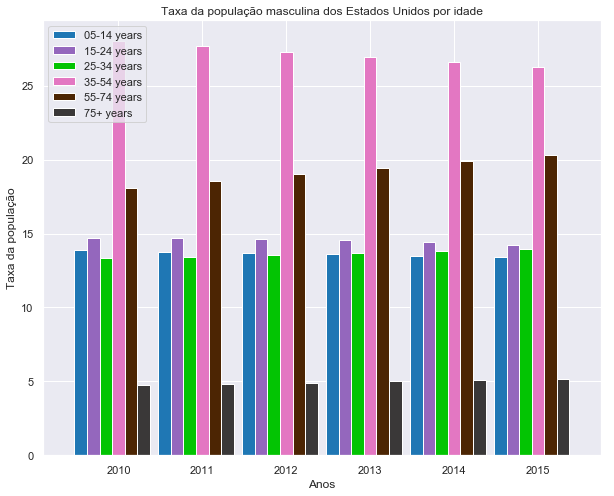

In [81]:
generate_chart_rate_population_age(unitedStates_male, "Taxa da população", "Anos", "Taxa da população masculina dos Estados Unidos por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



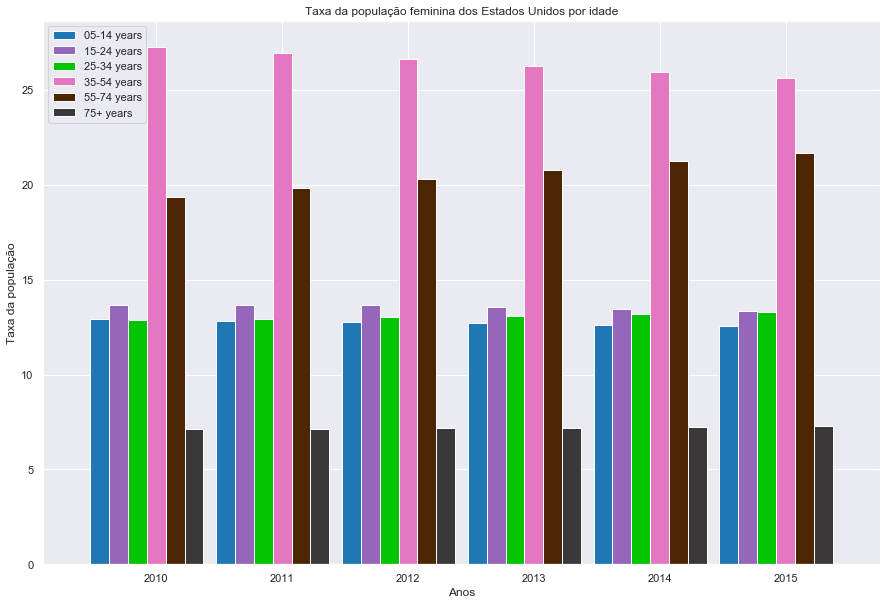

In [82]:
generate_chart_rate_population_age(unitedStates_female, "Taxa da população", "Anos", "Taxa da população feminina dos Estados Unidos por idade", "totalPopulationFemale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



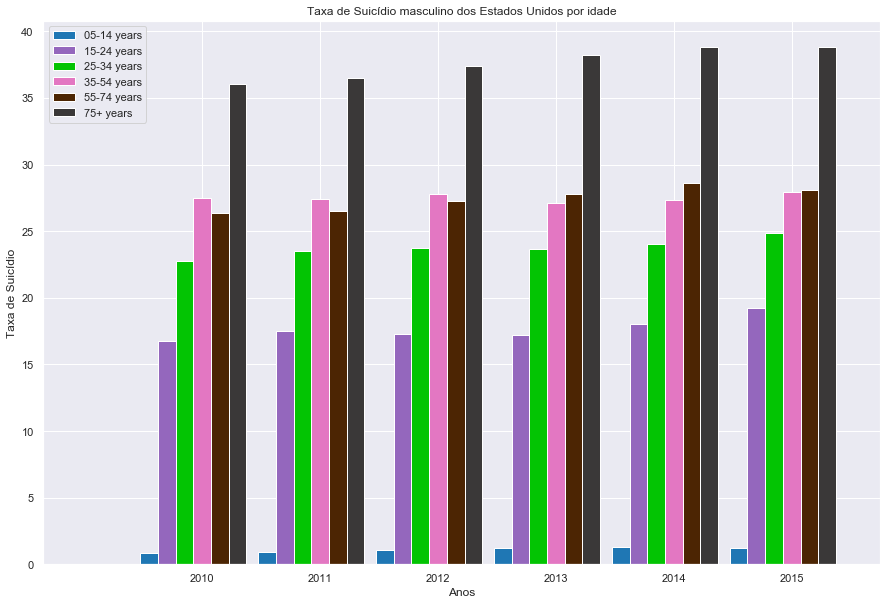

In [83]:
generate_chart_suicide_age(unitedStates_male, "Taxa de Suicídio", "Anos", "Taxa de Suicídio masculino dos Estados Unidos por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



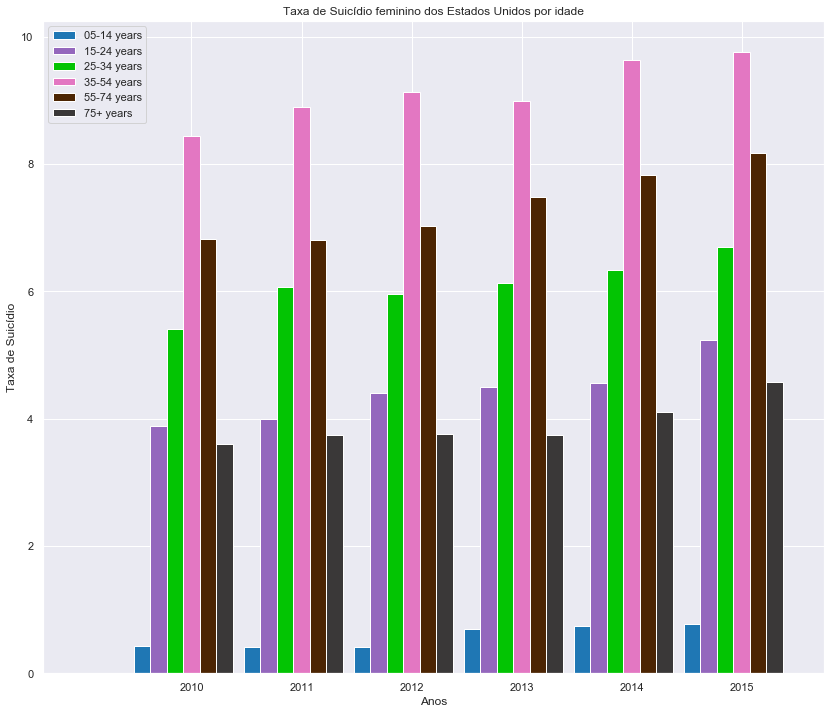

In [84]:
generate_chart_suicide_age(unitedStates_female, "Taxa de Suicídio", "Anos", "Taxa de Suicídio feminino dos Estados Unidos por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



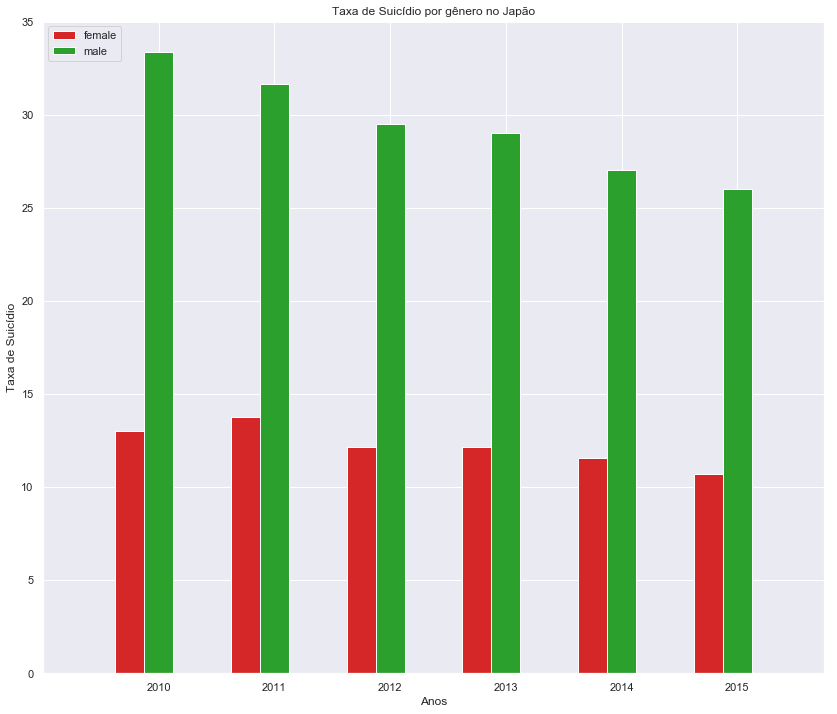

In [85]:
generate_chart_suicide_gen(gjp, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero no Japão",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



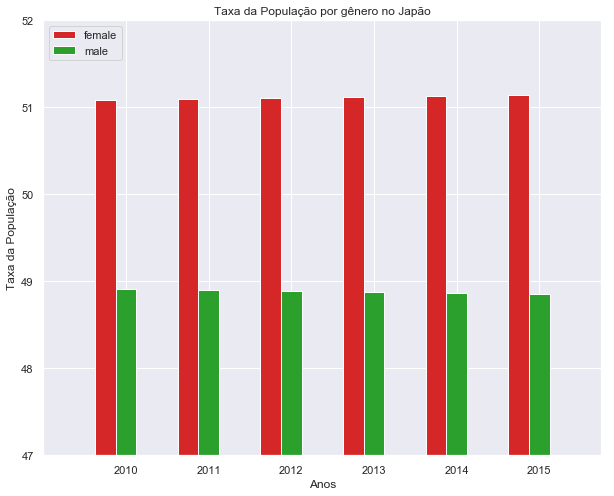

In [86]:
generate_chart_rate_population_gen(gjp, "Taxa da População", "Anos", "Taxa da População por gênero no Japão",male_female_colors,47,52,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



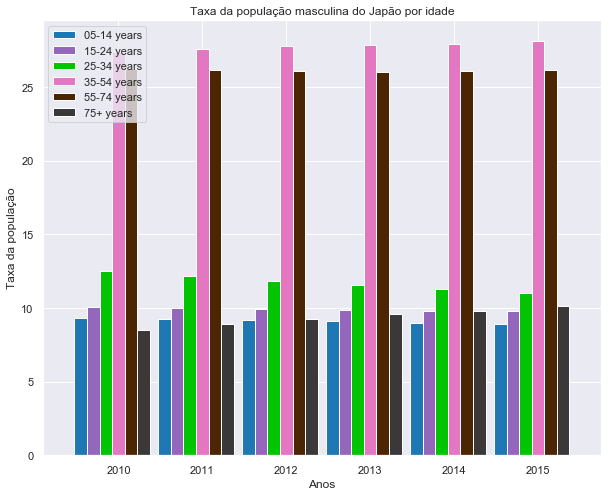

In [87]:
generate_chart_rate_population_age(japan_male, "Taxa da população", "Anos", "Taxa da população masculina do Japão por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



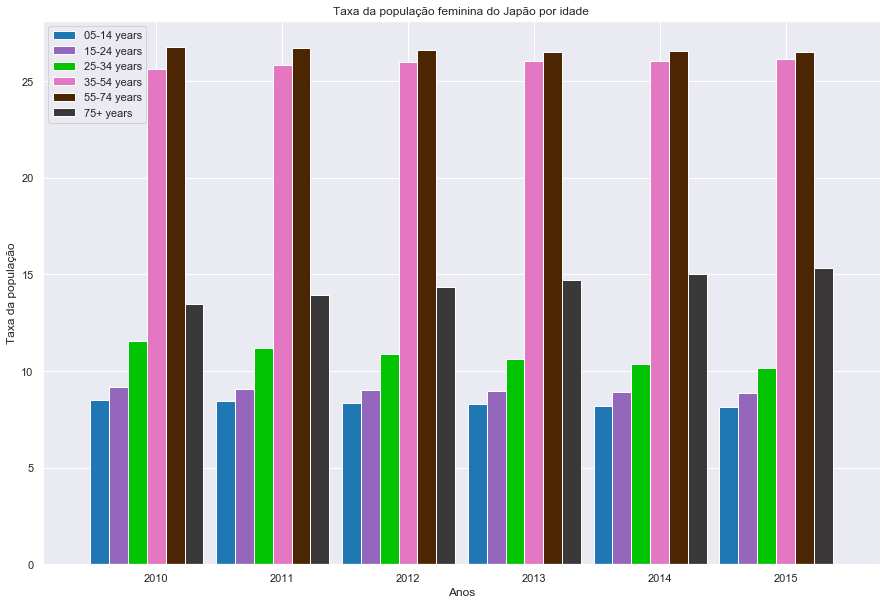

In [88]:
generate_chart_rate_population_age(japan_female, "Taxa da população", "Anos", "Taxa da população feminina do Japão por idade", "totalPopulationFemale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



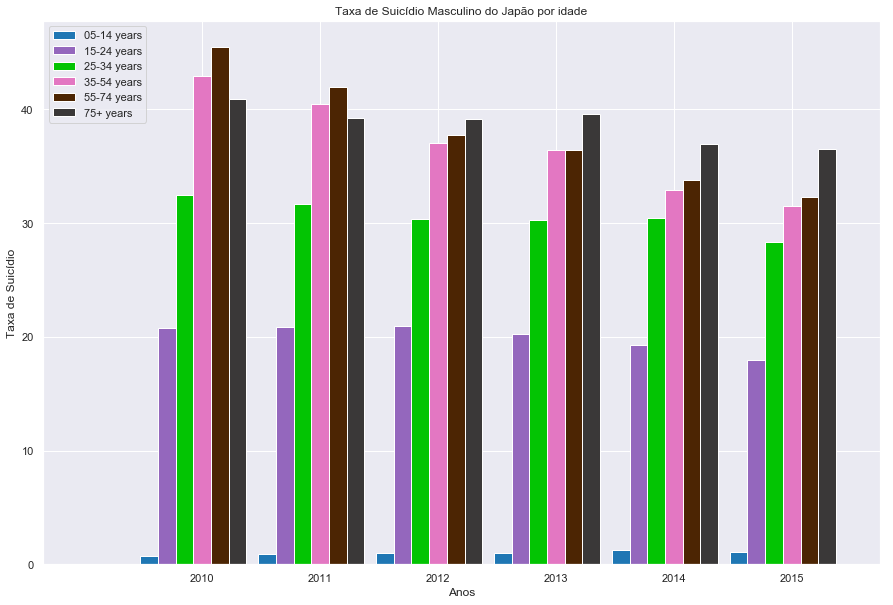

In [89]:
generate_chart_suicide_age(japan_male, "Taxa de Suicídio", "Anos", "Taxa de Suicídio Masculino do Japão por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



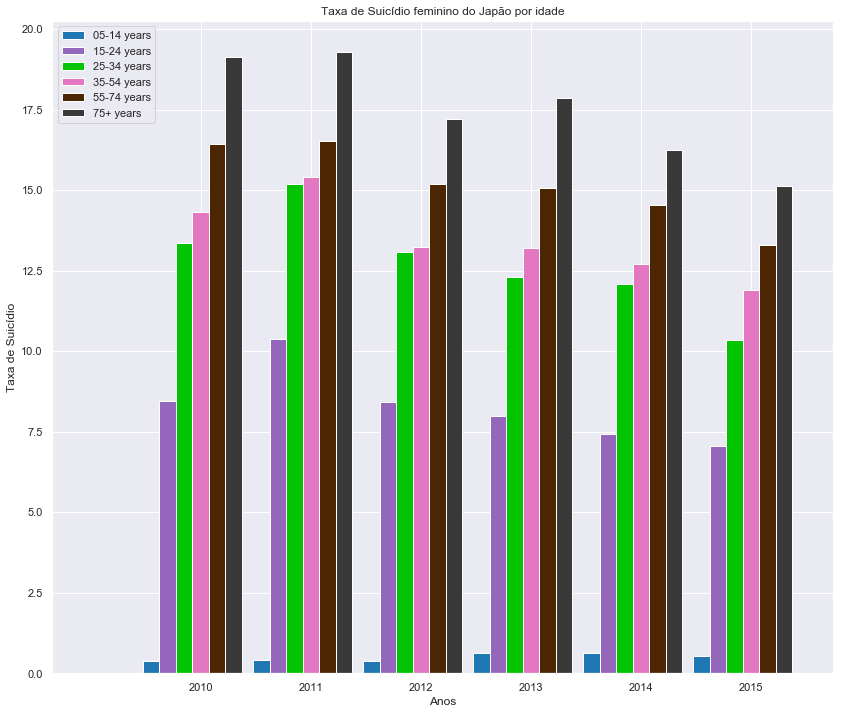

In [90]:
generate_chart_suicide_age(japan_female, "Taxa de Suicídio", "Anos", "Taxa de Suicídio feminino do Japão por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



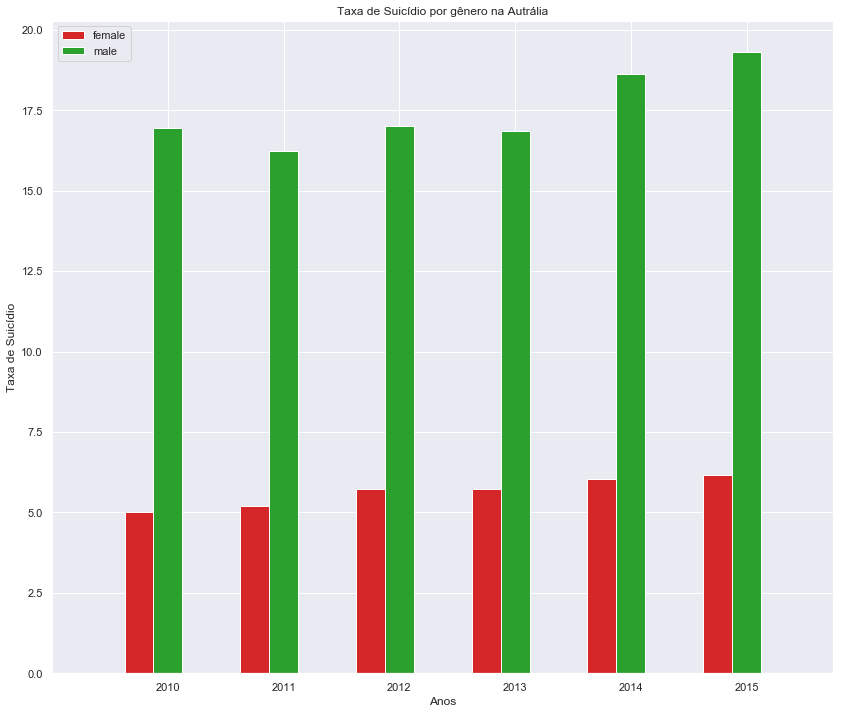

In [91]:
generate_chart_suicide_gen(gau, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Autrália",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



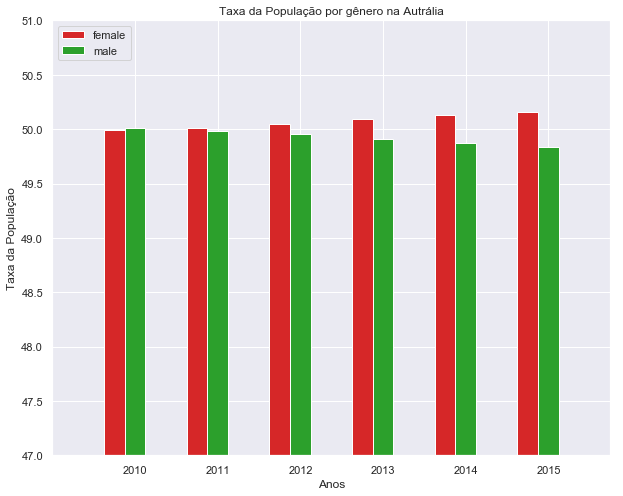

In [92]:
generate_chart_rate_population_gen(gau, "Taxa da População", "Anos", "Taxa da População por gênero na Autrália",male_female_colors,47,51,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



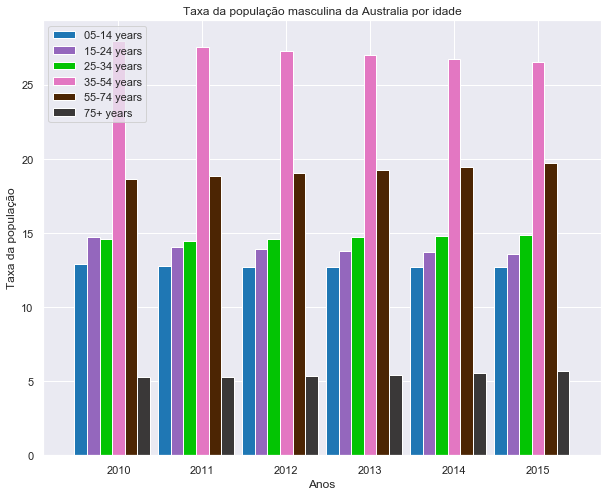

In [93]:
generate_chart_rate_population_age(australia_male, "Taxa da população", "Anos", "Taxa da população masculina da Australia por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



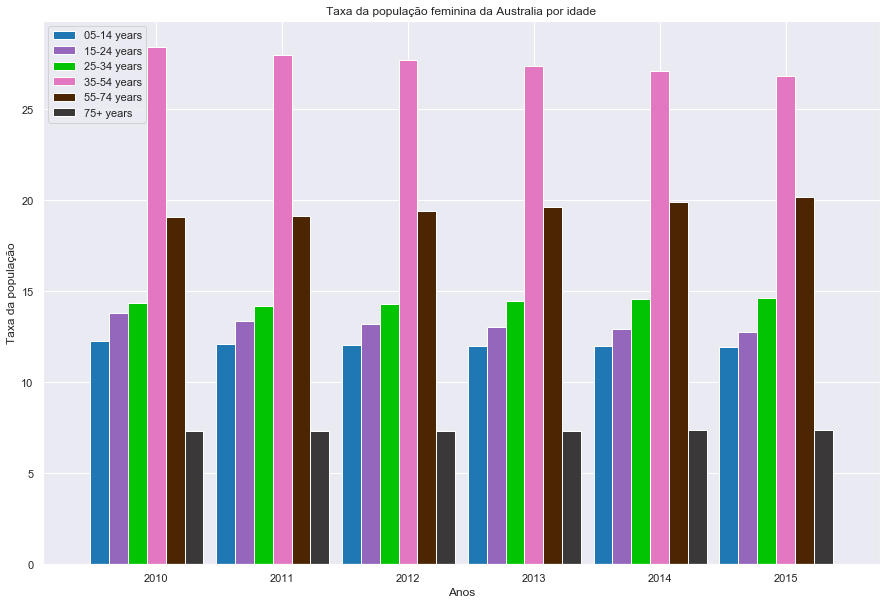

In [94]:
generate_chart_rate_population_age(australia_female, "Taxa da população", "Anos", "Taxa da população feminina da Australia por idade", "totalPopulationFemale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



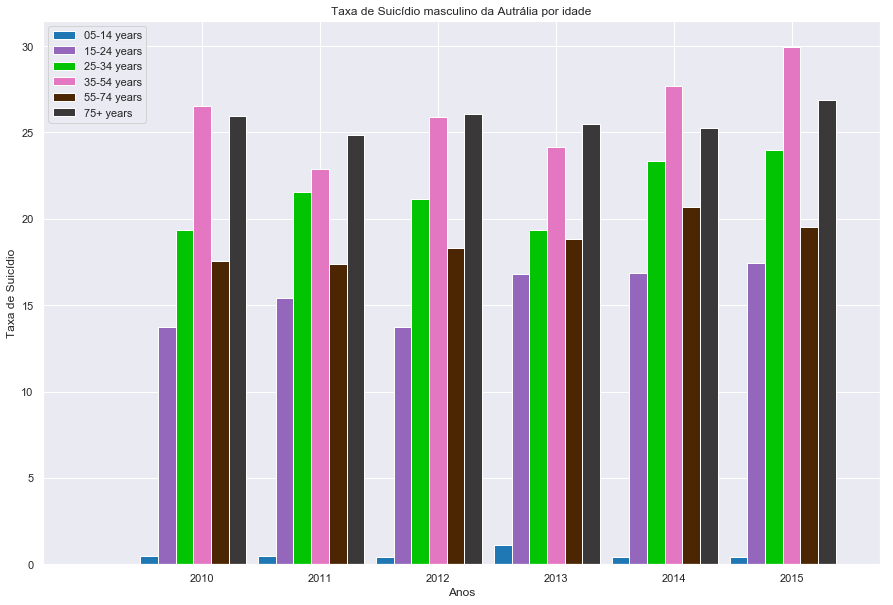

In [95]:
generate_chart_suicide_age(australia_male, "Taxa de Suicídio", "Anos", "Taxa de Suicídio masculino da Autrália por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



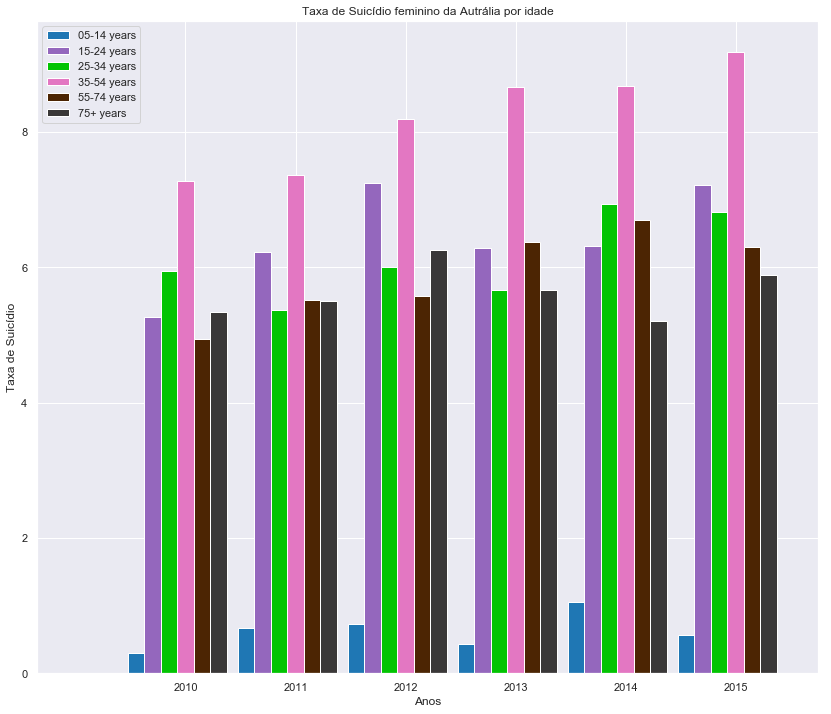

In [96]:
generate_chart_suicide_age(australia_female, "Taxa de Suicídio", "Anos", "Taxa de Suicídio feminino da Autrália por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



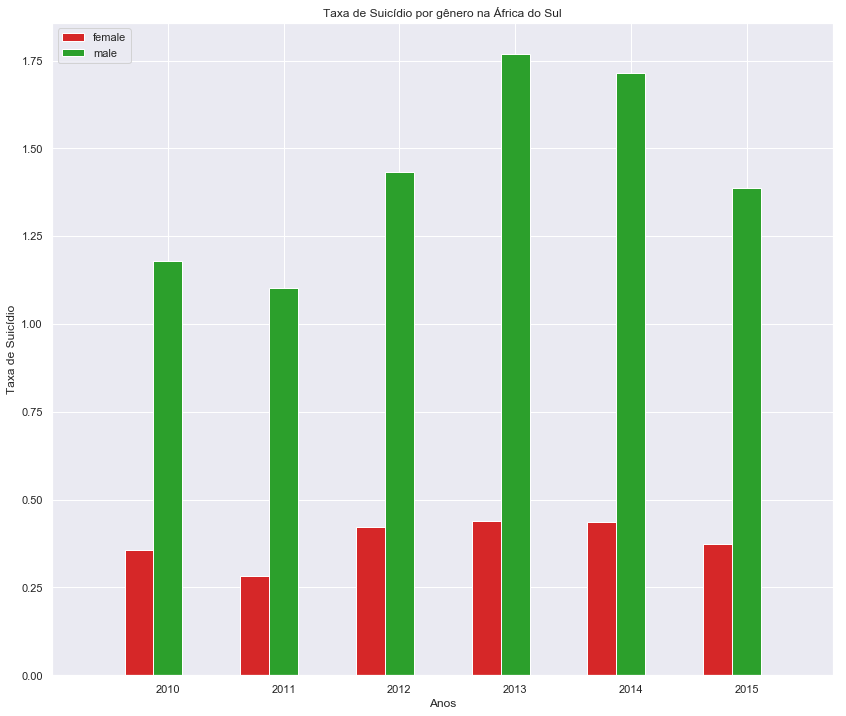

In [97]:
generate_chart_suicide_gen(gsa, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na África do Sul",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



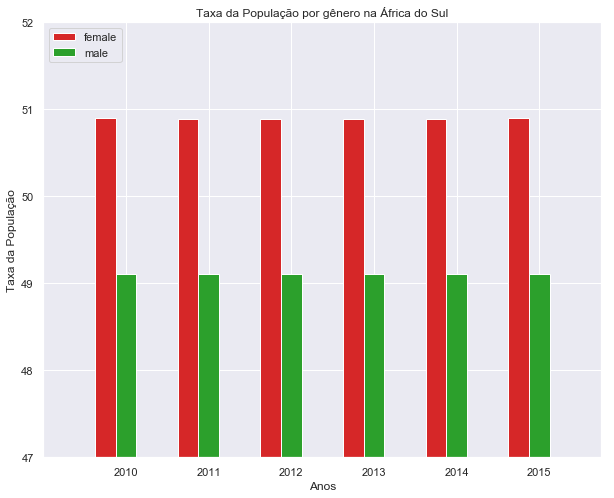

In [98]:
generate_chart_rate_population_gen(gsa, "Taxa da População", "Anos", "Taxa da População por gênero na África do Sul",male_female_colors,47,52,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



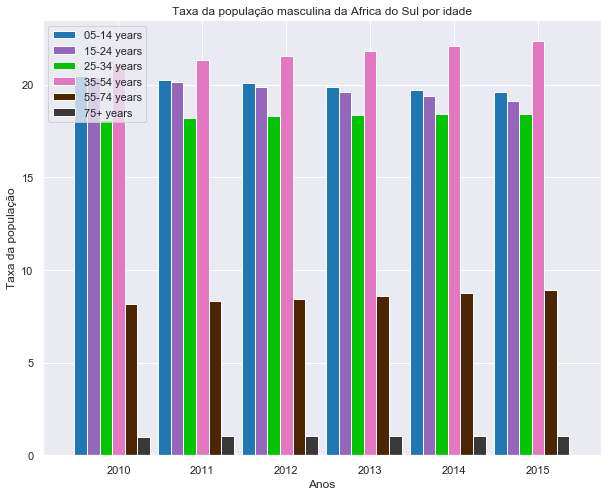

In [99]:
generate_chart_rate_population_age(southAfrica_male, "Taxa da população", "Anos", "Taxa da população masculina da Africa do Sul por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



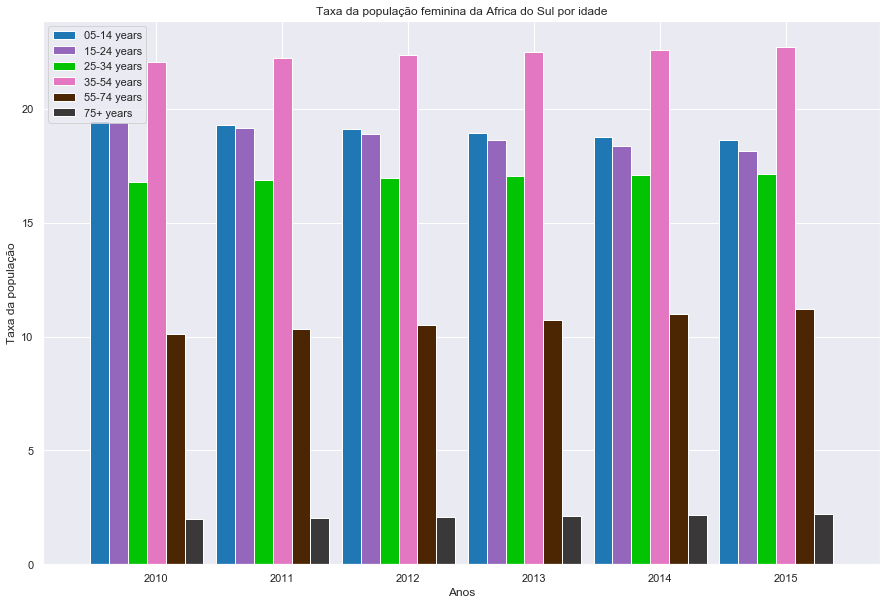

In [100]:
generate_chart_rate_population_age(southAfrica_female, "Taxa da população", "Anos", "Taxa da população feminina da Africa do Sul por idade", "totalPopulationFemale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



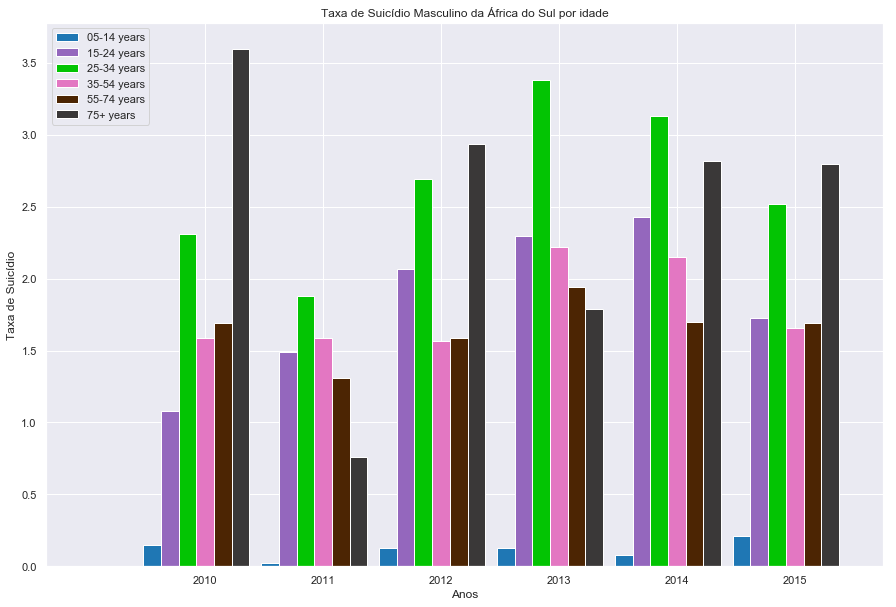

In [101]:
generate_chart_suicide_age(southAfrica_male, "Taxa de Suicídio", "Anos", "Taxa de Suicídio Masculino da África do Sul por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



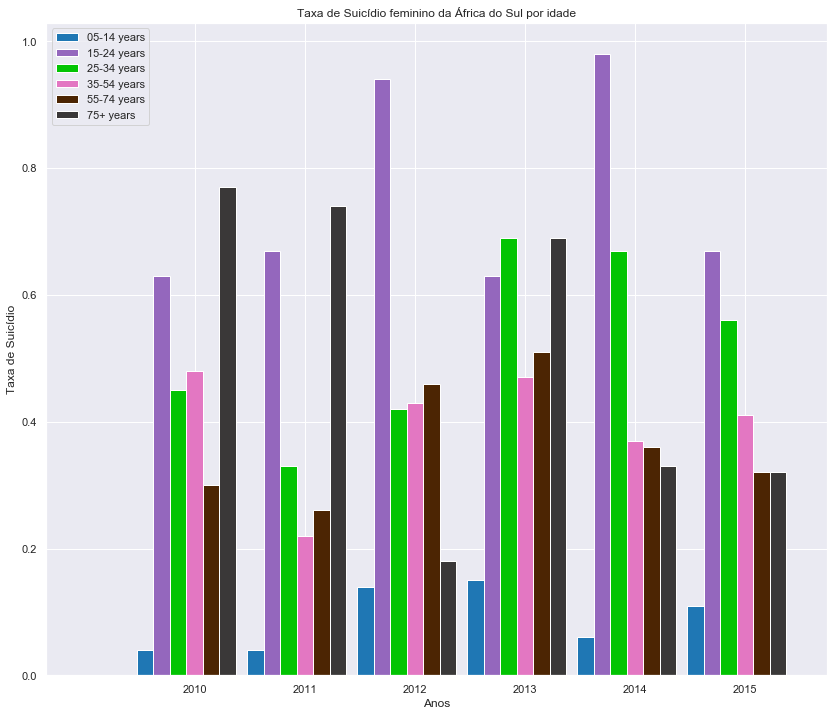

In [102]:
generate_chart_suicide_age(southAfrica_female, "Taxa de Suicídio", "Anos", "Taxa de Suicídio feminino da África do Sul por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



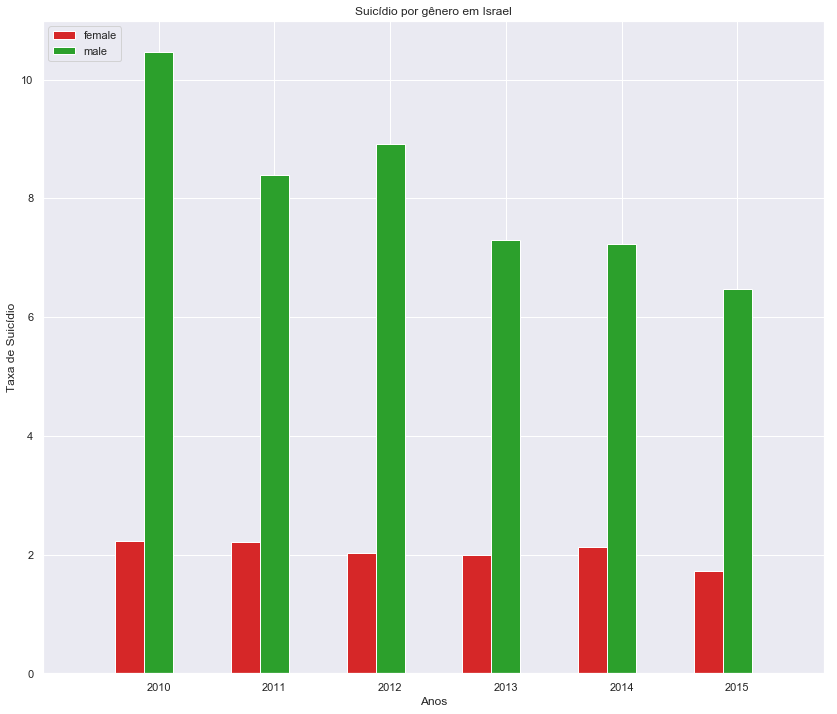

In [103]:
generate_chart_suicide_gen(gis, "Taxa de Suicídio", "Anos", "Suicídio por gênero em Israel",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



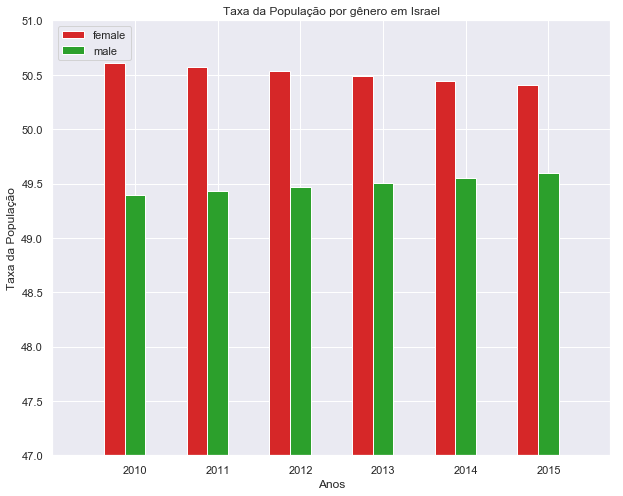

In [104]:
generate_chart_rate_population_gen(gis, "Taxa da População", "Anos", "Taxa da População por gênero em Israel",male_female_colors,47,51,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



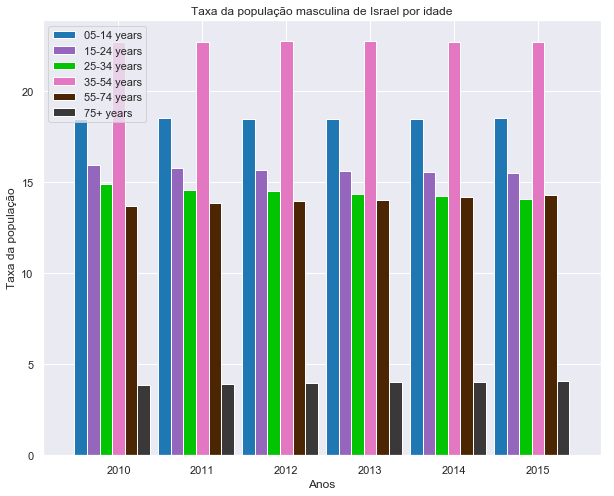

In [105]:
generate_chart_rate_population_age(israel_male, "Taxa da população", "Anos", "Taxa da população masculina de Israel por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



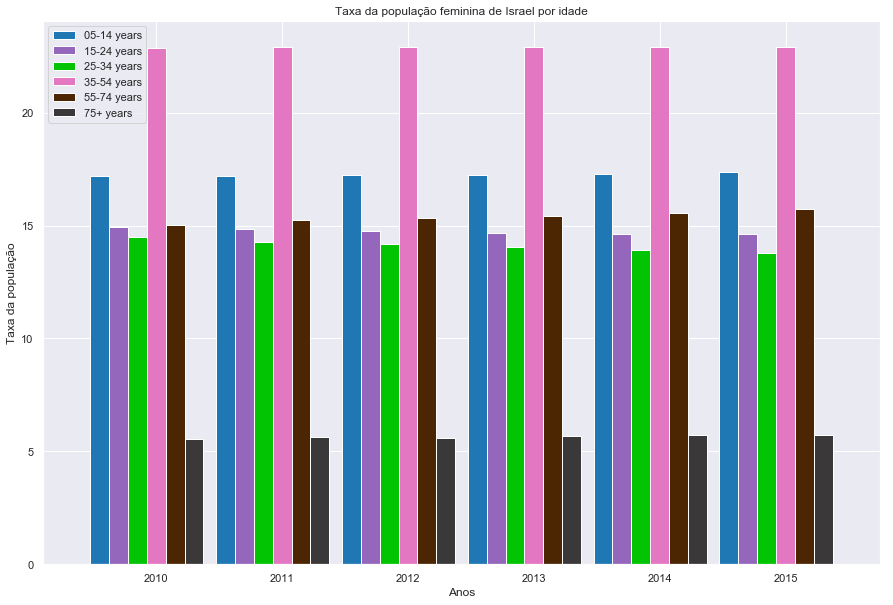

In [106]:
generate_chart_rate_population_age(israel_female, "Taxa da população", "Anos", "Taxa da população feminina de Israel por idade", "totalPopulationFemale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



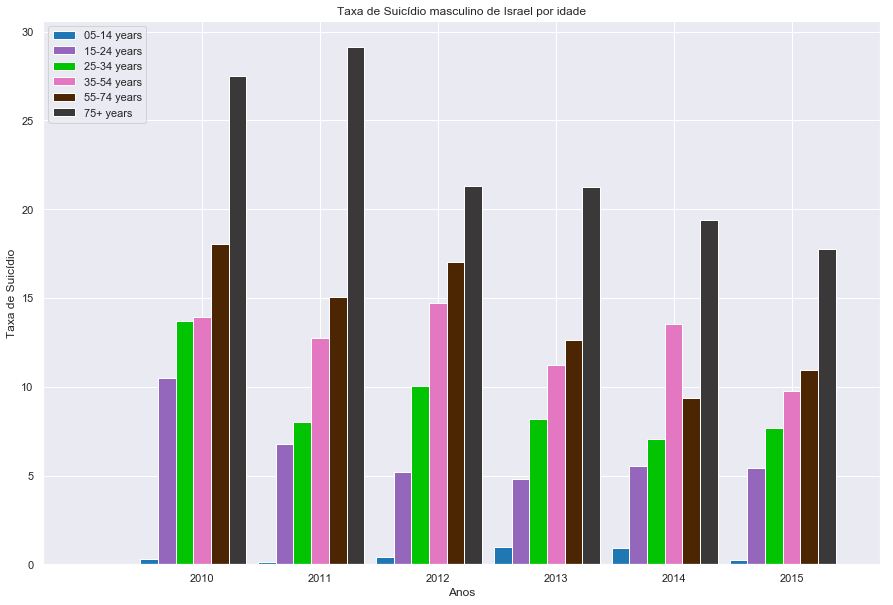

In [107]:
generate_chart_suicide_age(israel_male, "Taxa de Suicídio", "Anos", "Taxa de Suicídio masculino de Israel por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



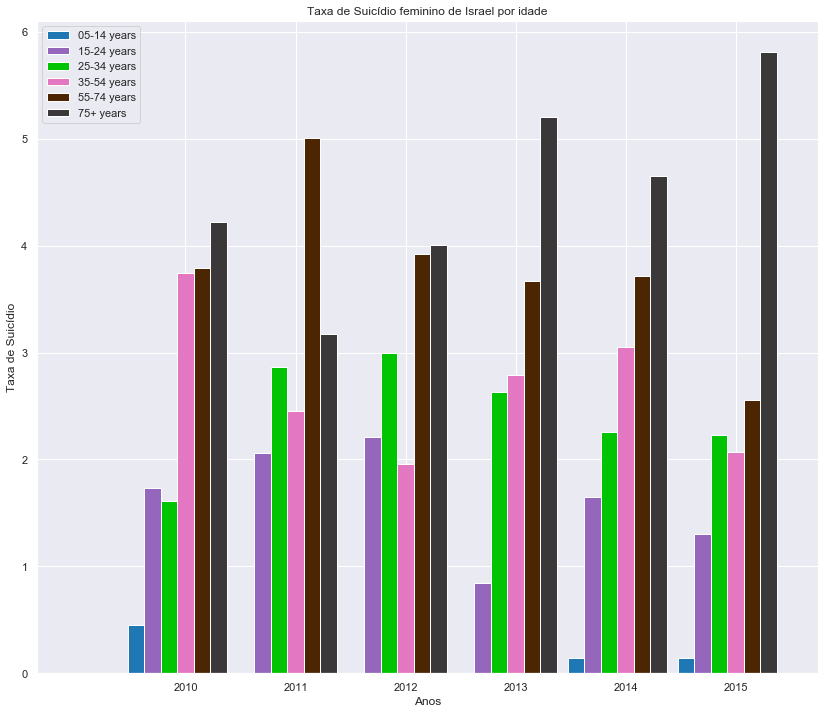

In [108]:
generate_chart_suicide_age(israel_female, "Taxa de Suicídio", "Anos", "Taxa de Suicídio feminino de Israel por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



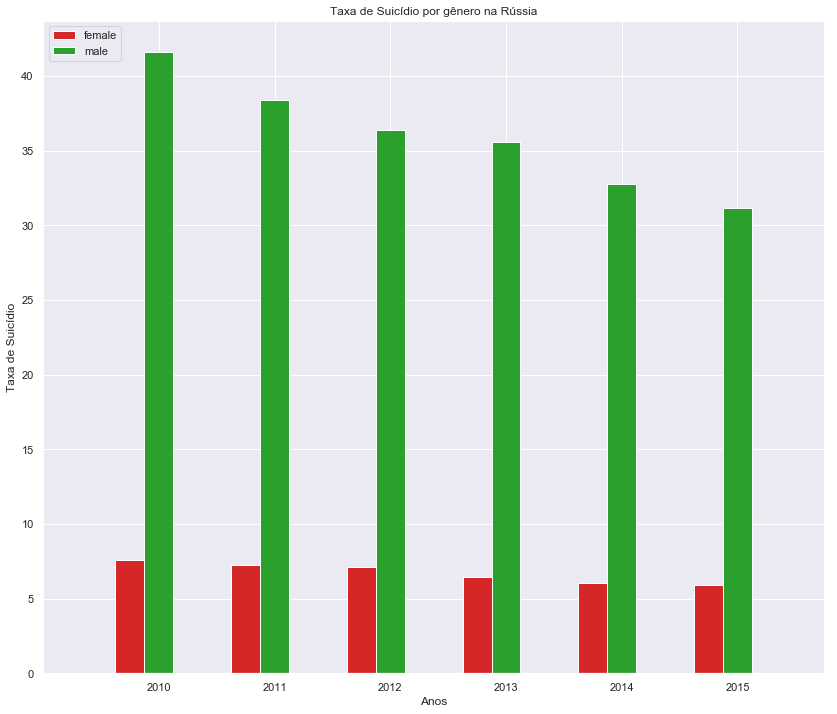

In [109]:
generate_chart_suicide_gen(gru, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Rússia",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



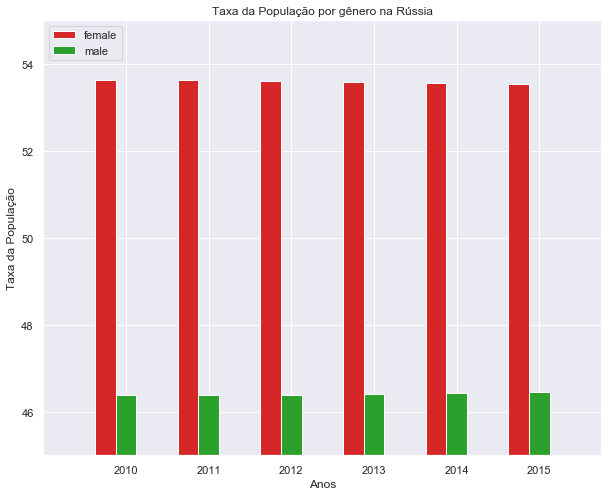

In [110]:
generate_chart_rate_population_gen(gru, "Taxa da População", "Anos", "Taxa da População por gênero na Rússia",male_female_colors,45,55,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



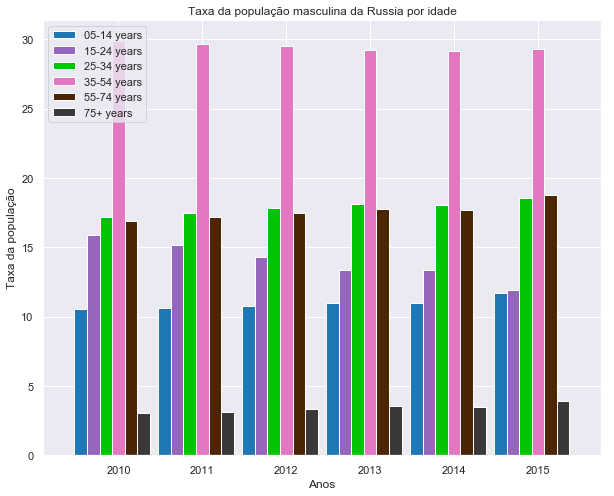

In [111]:
generate_chart_rate_population_age(russia_male, "Taxa da população", "Anos", "Taxa da população masculina da Russia por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



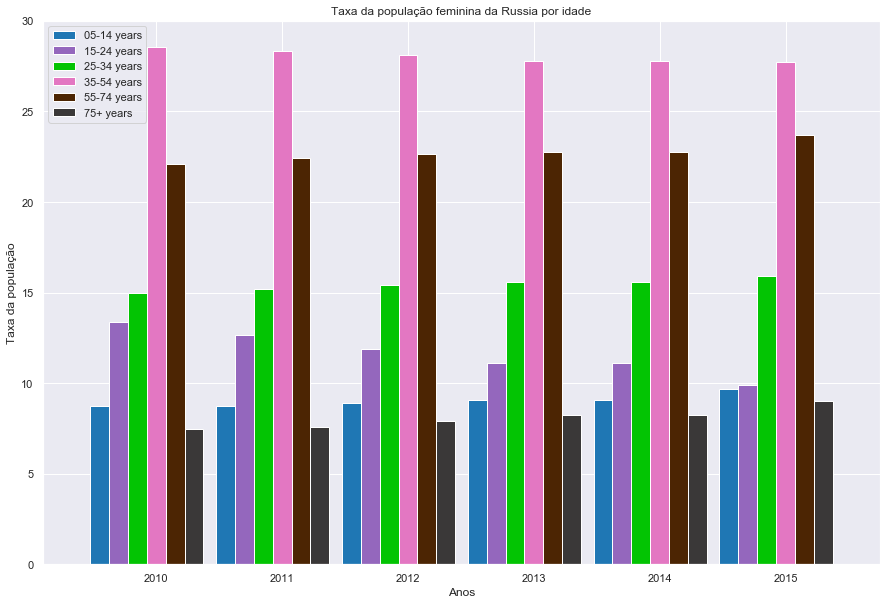

In [112]:
generate_chart_rate_population_age(russia_female, "Taxa da população", "Anos", "Taxa da população feminina da Russia por idade", "totalPopulationFemale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



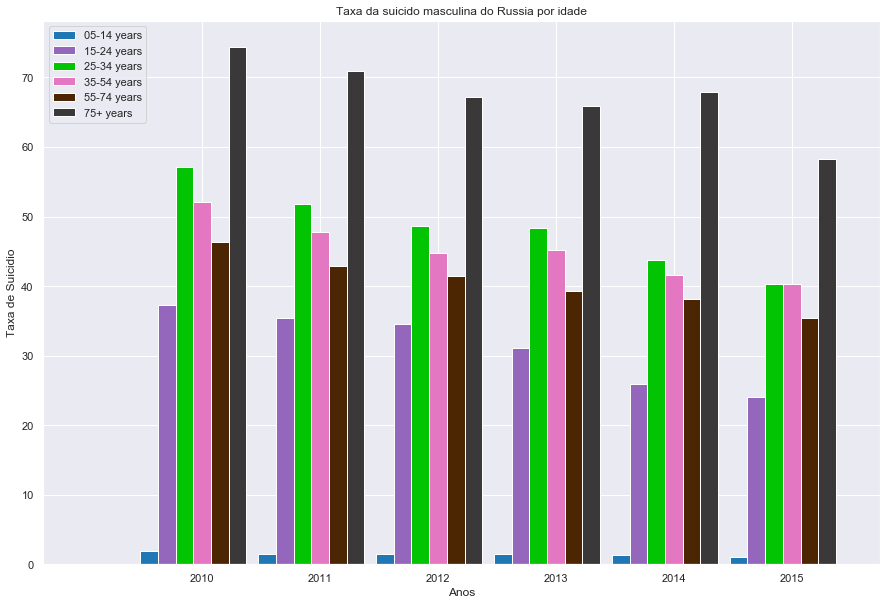

In [113]:
generate_chart_suicide_age(russia_male, "Taxa de Suicidio", "Anos", "Taxa da suicido masculina do Russia por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



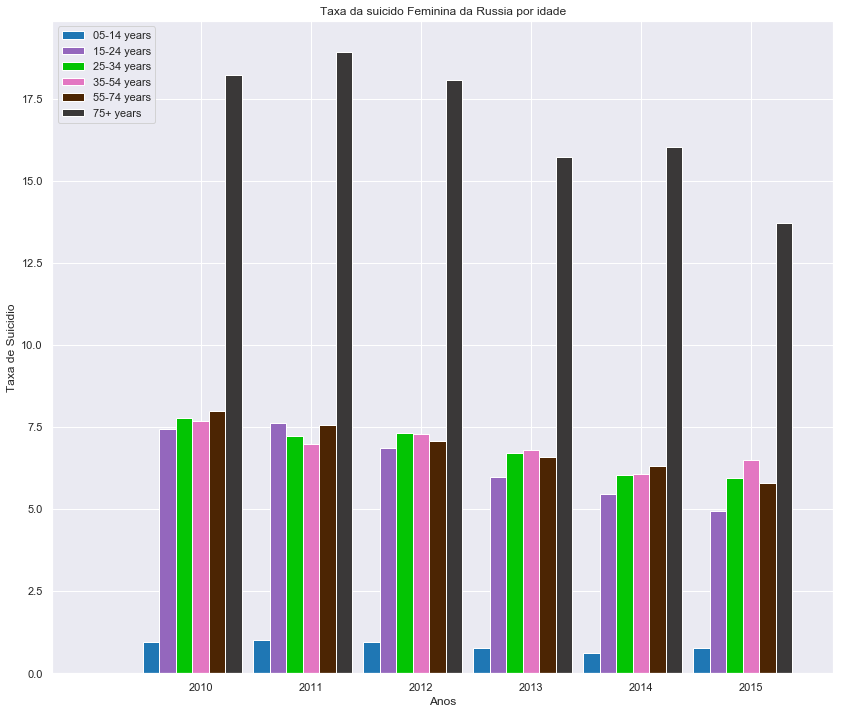

In [114]:
generate_chart_suicide_age(russia_female, "Taxa de Suicidio", "Anos", "Taxa da suicido Feminina da Russia por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



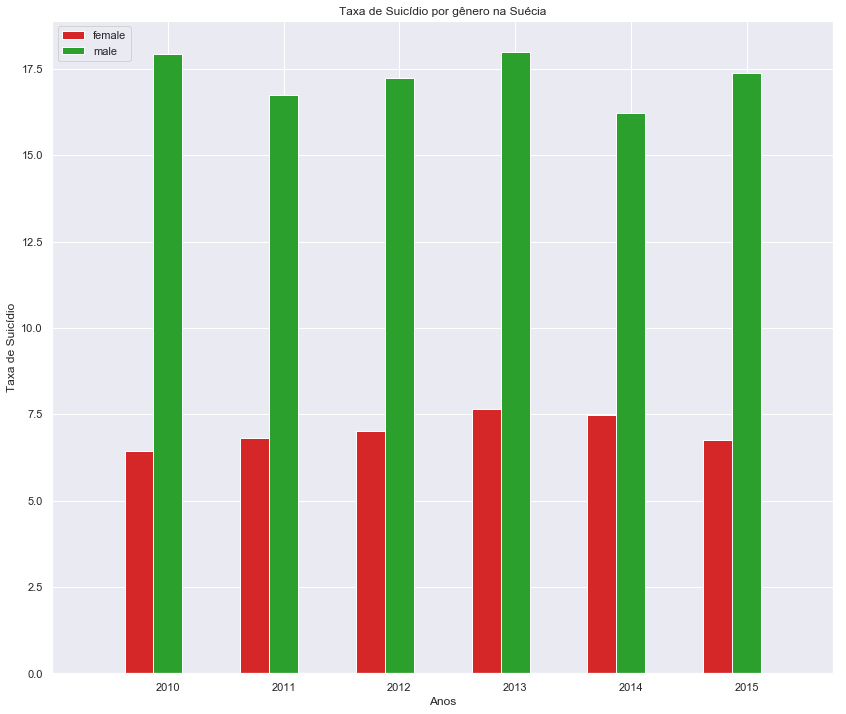

In [115]:
generate_chart_suicide_gen(gsw, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Suécia",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



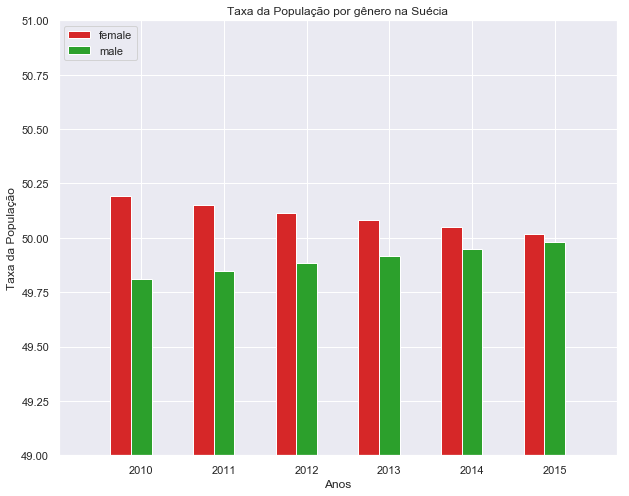

In [116]:
generate_chart_rate_population_gen(gsw, "Taxa da População", "Anos", "Taxa da População por gênero na Suécia",male_female_colors,49,51,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



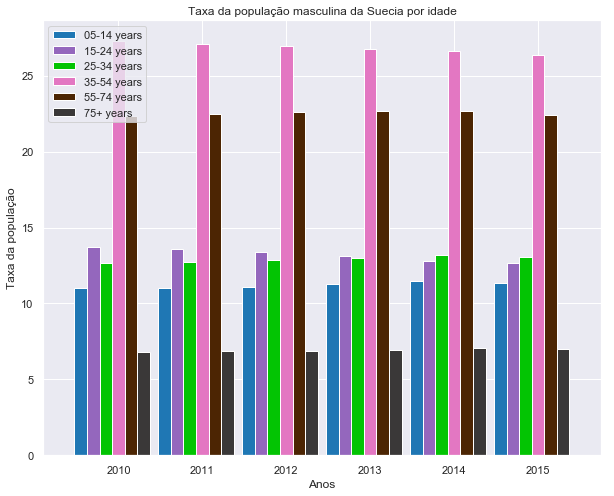

In [117]:
generate_chart_rate_population_age(sweden_male, "Taxa da população", "Anos", "Taxa da população masculina da Suecia por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



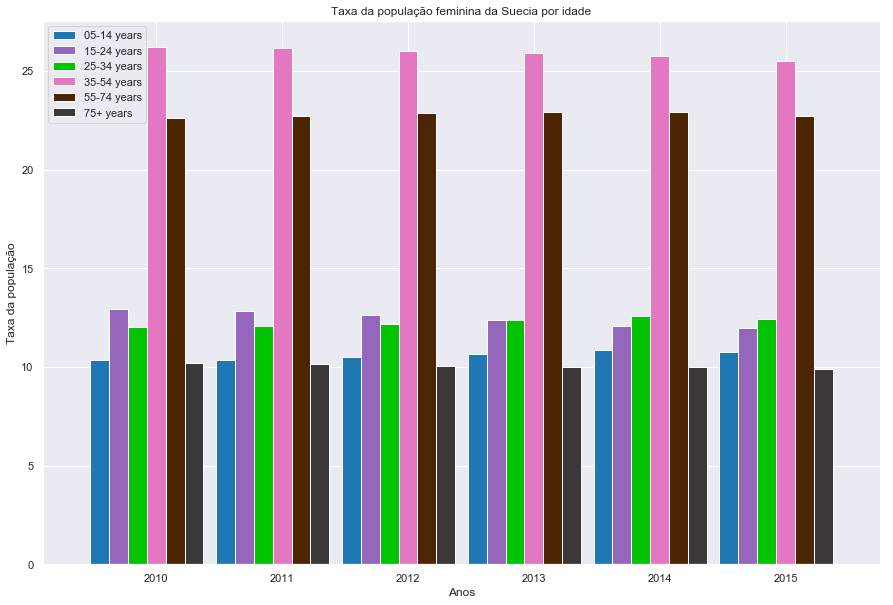

In [118]:
generate_chart_rate_population_age(sweden_female, "Taxa da população", "Anos", "Taxa da população feminina da Suecia por idade", "totalPopulationFemale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



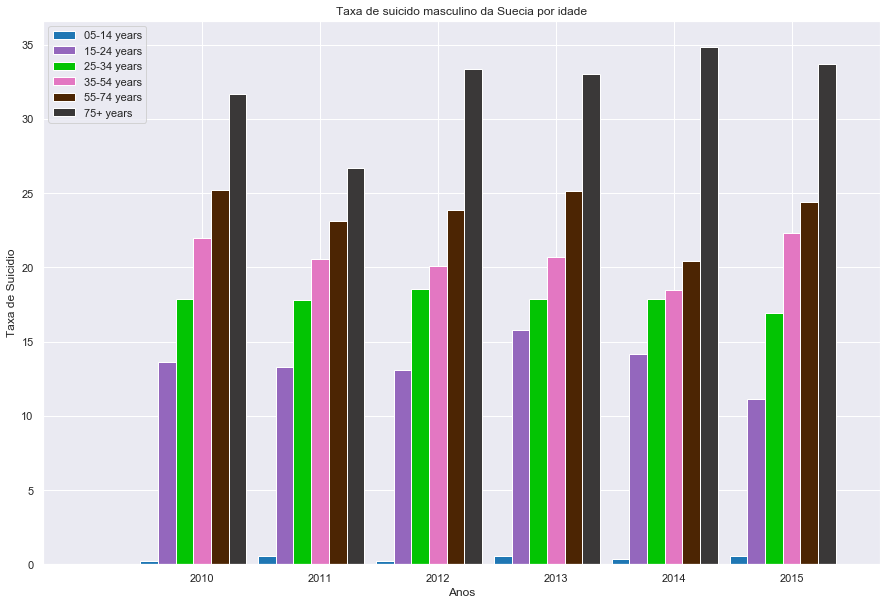

In [119]:
generate_chart_suicide_age(sweden_male, "Taxa de Suicidio", "Anos", "Taxa de suicido masculino da Suecia por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



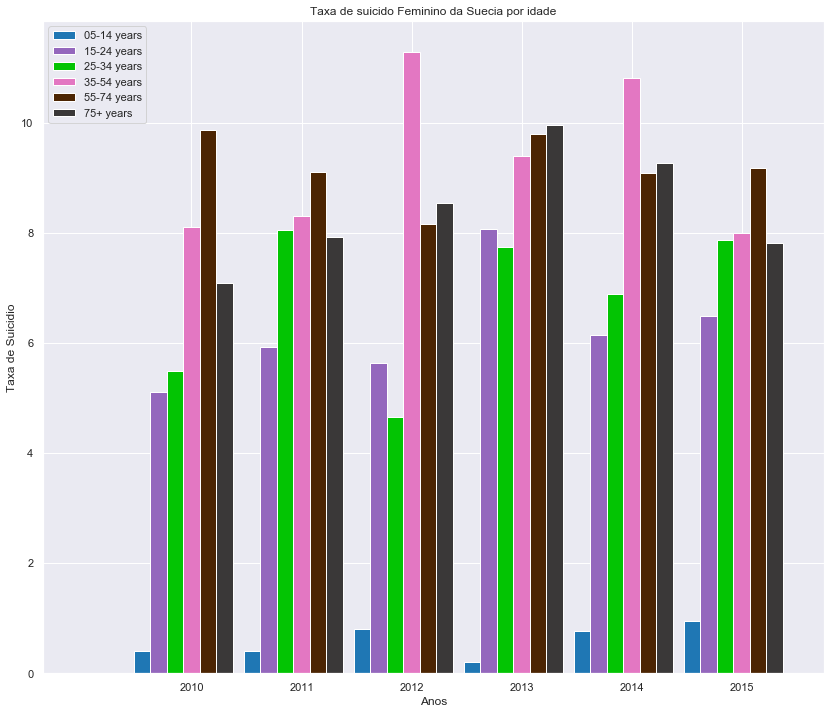

In [120]:
generate_chart_suicide_age(sweden_female, "Taxa de Suicidio", "Anos", "Taxa de suicido Feminino da Suecia por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



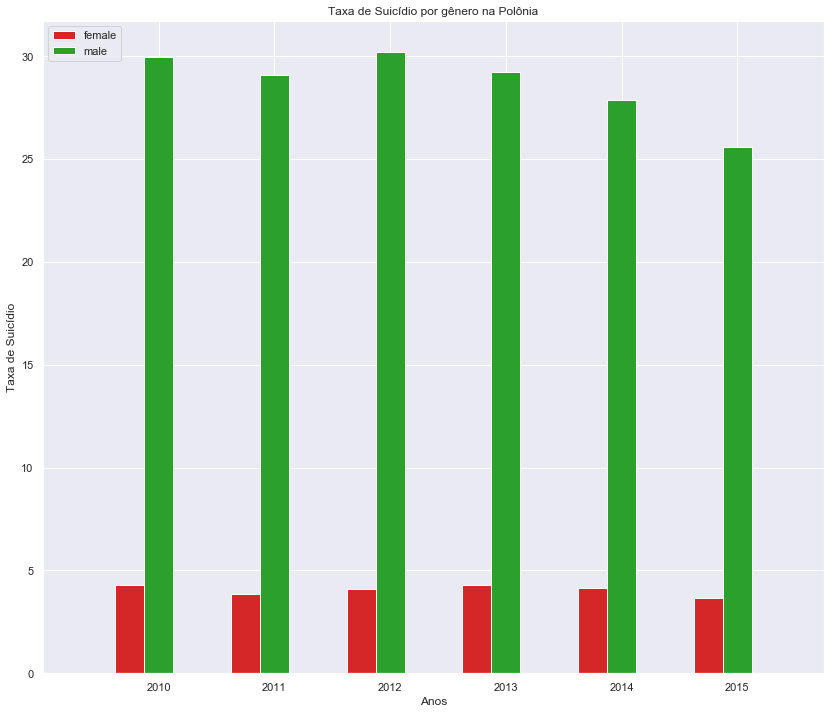

In [121]:
generate_chart_suicide_gen(gpo, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Polônia",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



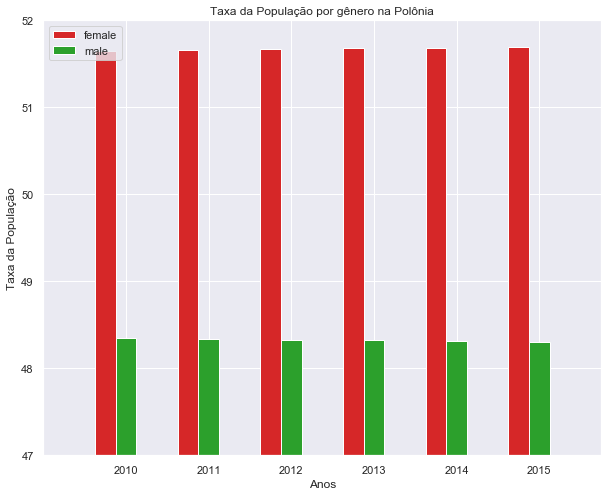

In [122]:
generate_chart_rate_population_gen(gpo, "Taxa da População", "Anos", "Taxa da População por gênero na Polônia",male_female_colors,47,52,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



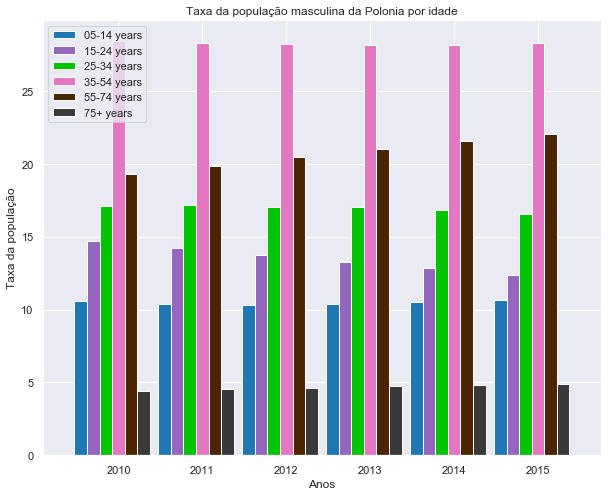

In [123]:
generate_chart_rate_population_age(poland_male, "Taxa da população", "Anos", "Taxa da população masculina da Polonia por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



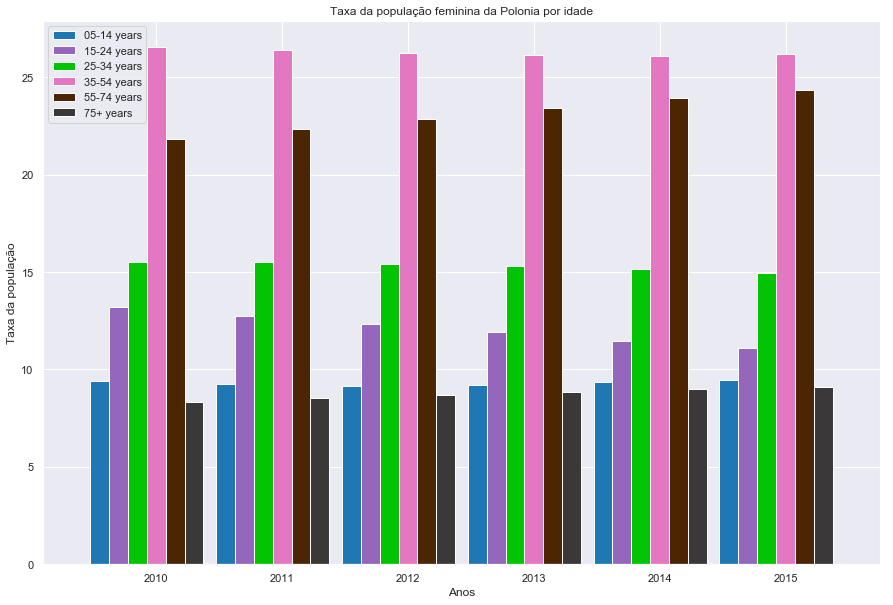

In [124]:
generate_chart_rate_population_age(poland_female, "Taxa da população", "Anos", "Taxa da população feminina da Polonia por idade", "totalPopulationFemale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



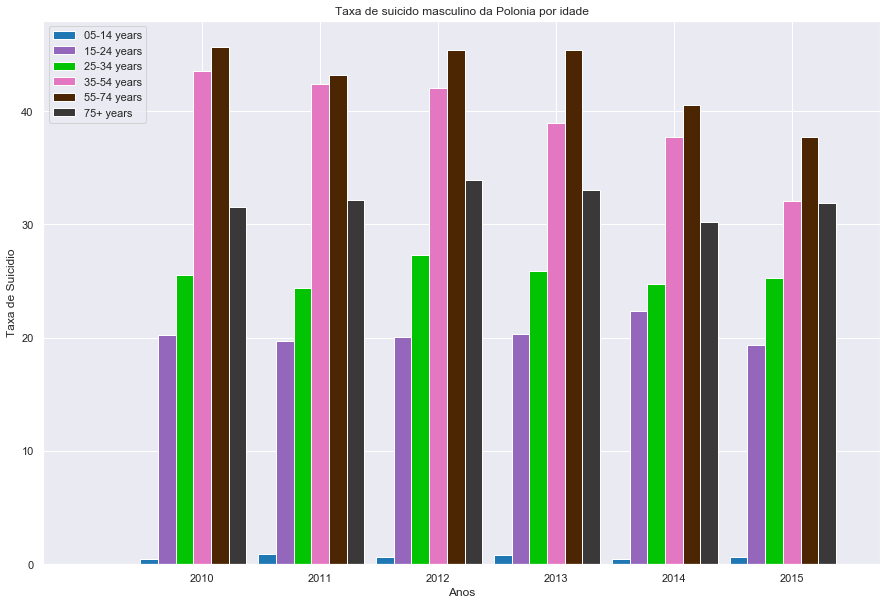

In [125]:
generate_chart_suicide_age(poland_male, "Taxa de Suicidio", "Anos", "Taxa de suicido masculino da Polonia por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



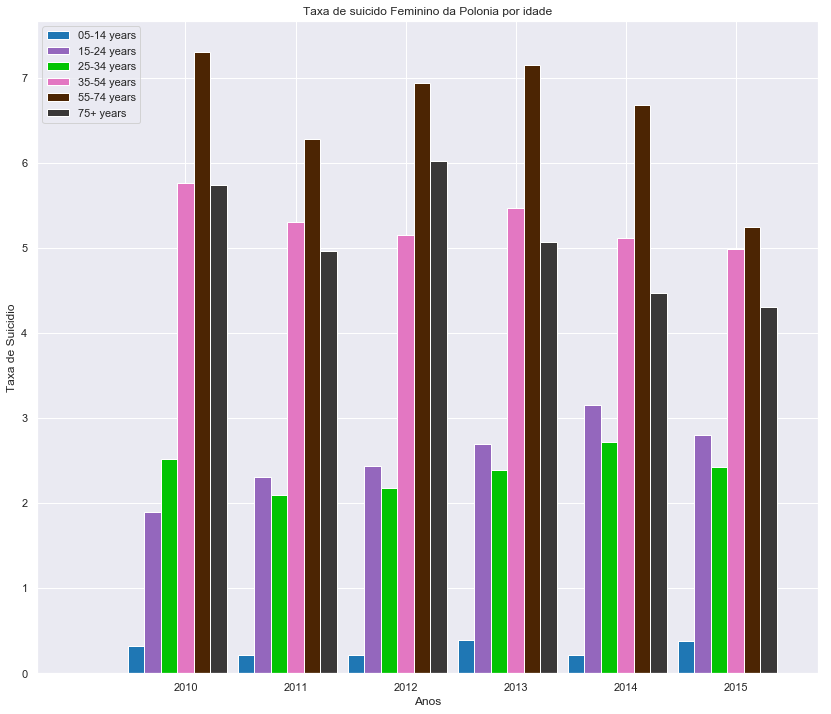

In [126]:
generate_chart_suicide_age(poland_female, "Taxa de Suicidio", "Anos", "Taxa de suicido Feminino da Polonia por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



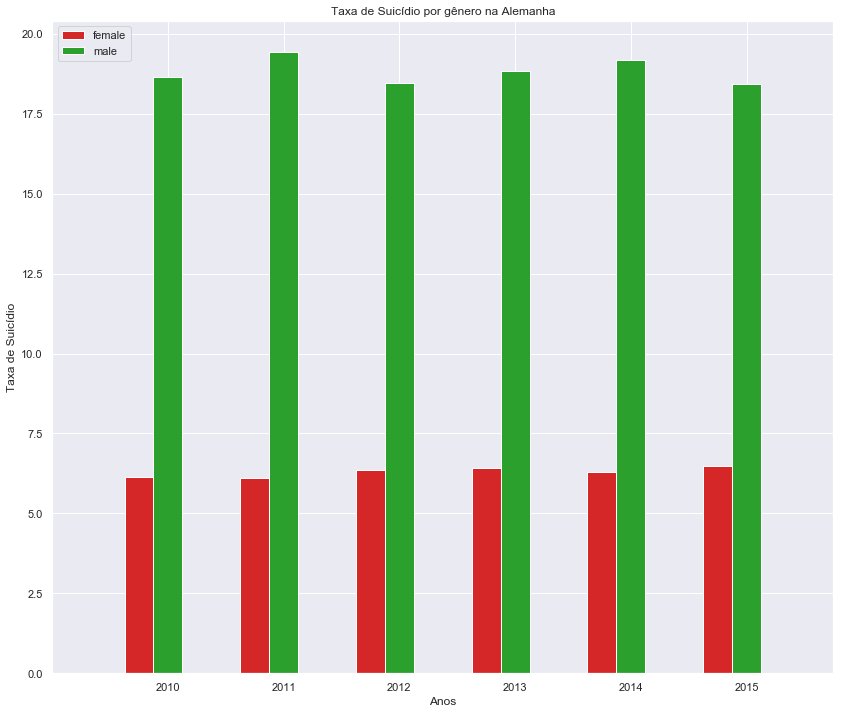

In [127]:
generate_chart_suicide_gen(gge, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Alemanha",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



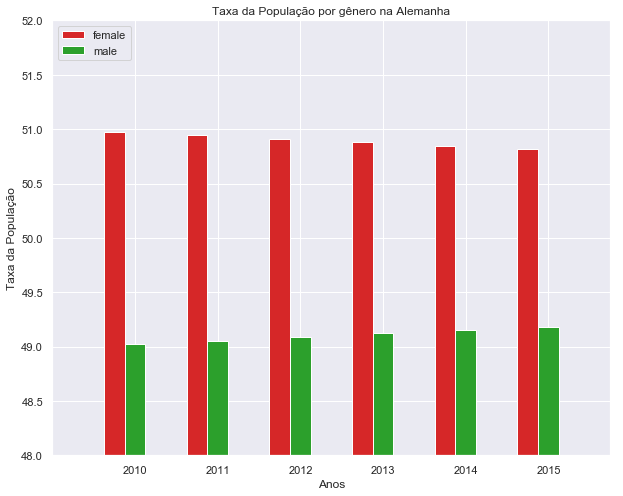

In [128]:
generate_chart_rate_population_gen(gge, "Taxa da População", "Anos", "Taxa da População por gênero na Alemanha",male_female_colors,48,52,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



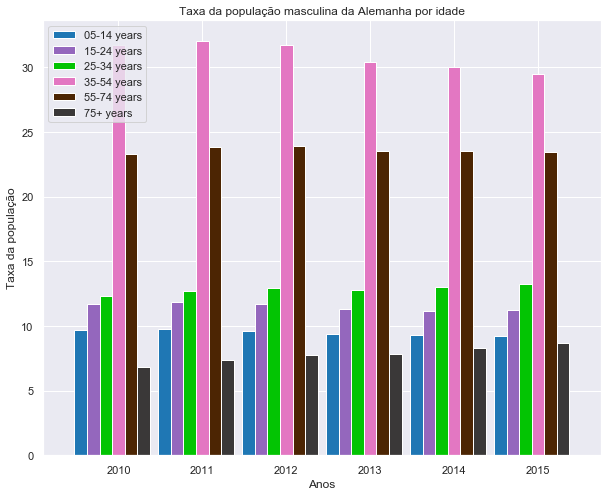

In [129]:
generate_chart_rate_population_age(germany_male, "Taxa da população", "Anos", "Taxa da população masculina da Alemanha por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



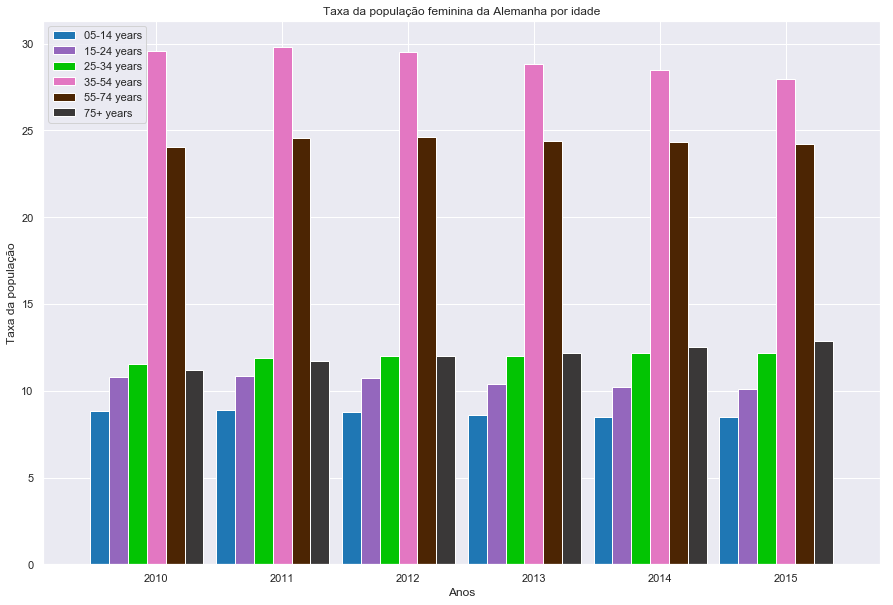

In [130]:
generate_chart_rate_population_age(germany_female, "Taxa da população", "Anos", "Taxa da população feminina da Alemanha por idade", "totalPopulationFemale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



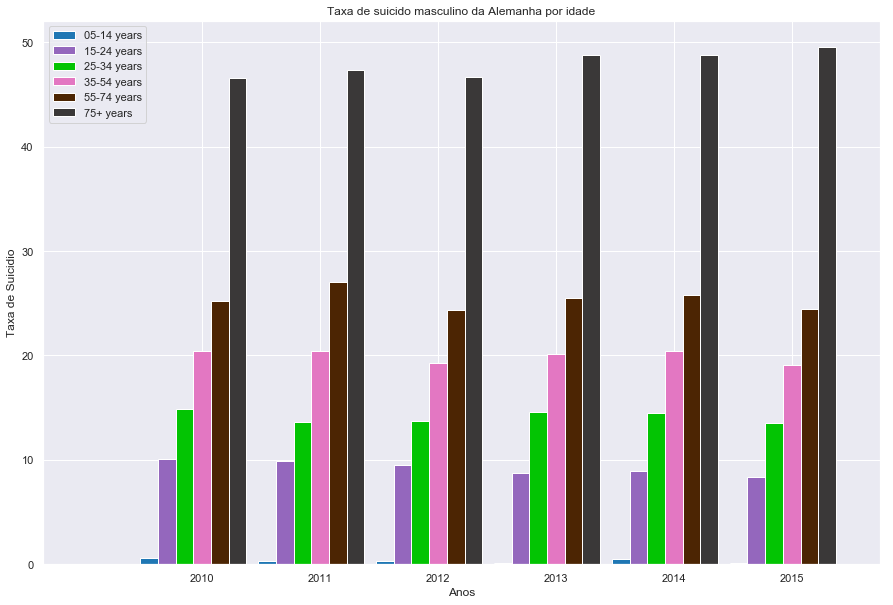

In [131]:
generate_chart_suicide_age(germany_male, "Taxa de Suicidio", "Anos", "Taxa de suicido masculino da Alemanha por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



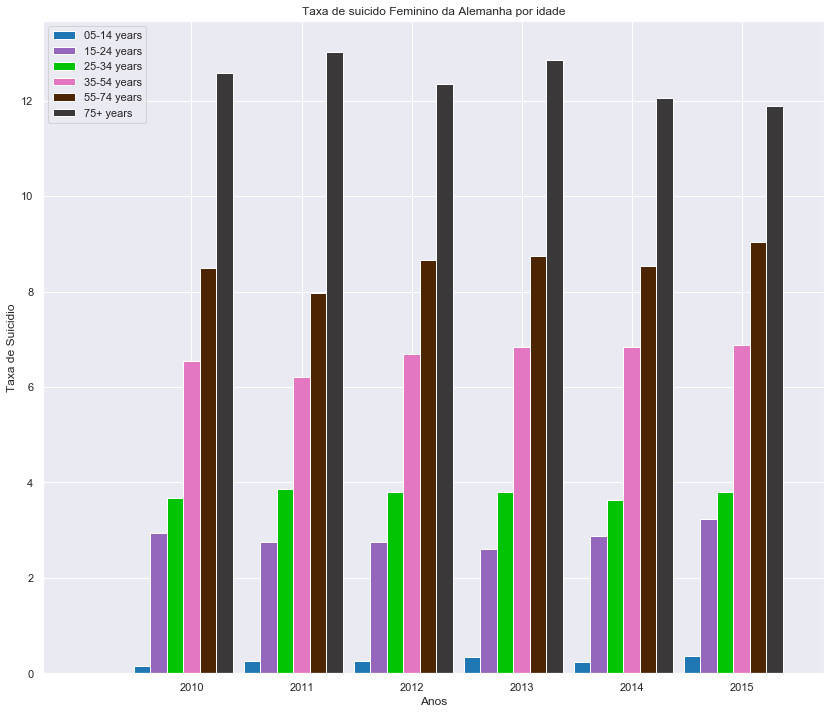

In [132]:
generate_chart_suicide_age(germany_female, "Taxa de Suicidio", "Anos", "Taxa de suicido Feminino da Alemanha por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



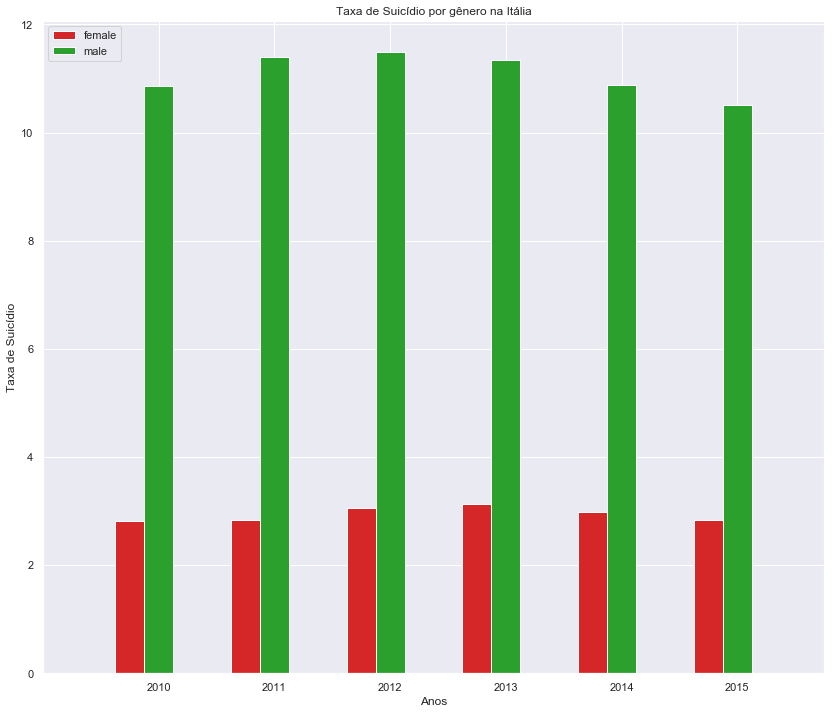

In [133]:
generate_chart_suicide_gen(git, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Itália",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



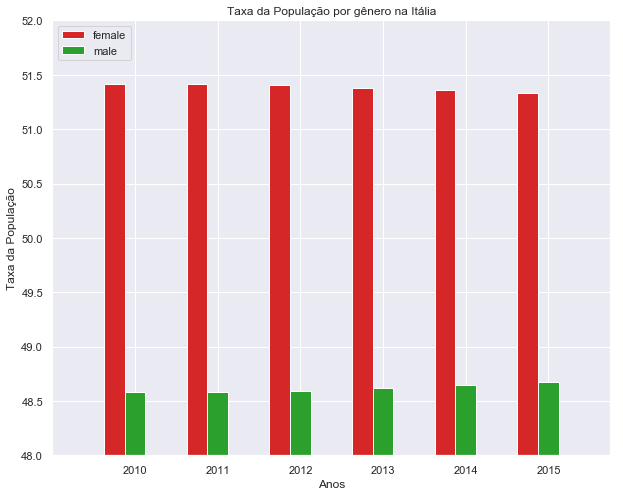

In [134]:
generate_chart_rate_population_gen(git, "Taxa da População", "Anos", "Taxa da População por gênero na Itália",male_female_colors,48,52,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



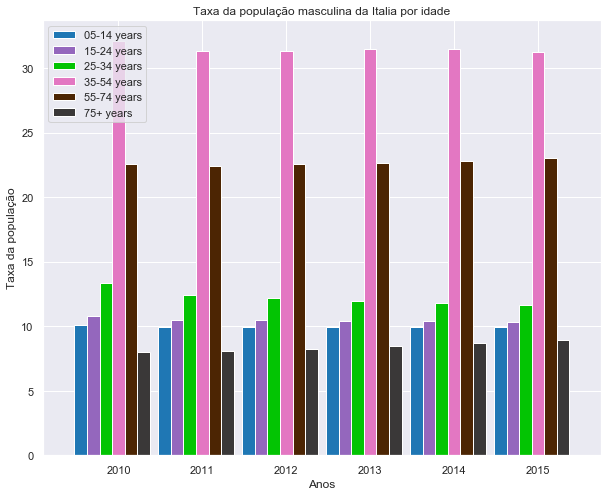

In [135]:
generate_chart_rate_population_age(italy_male, "Taxa da população", "Anos", "Taxa da população masculina da Italia por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



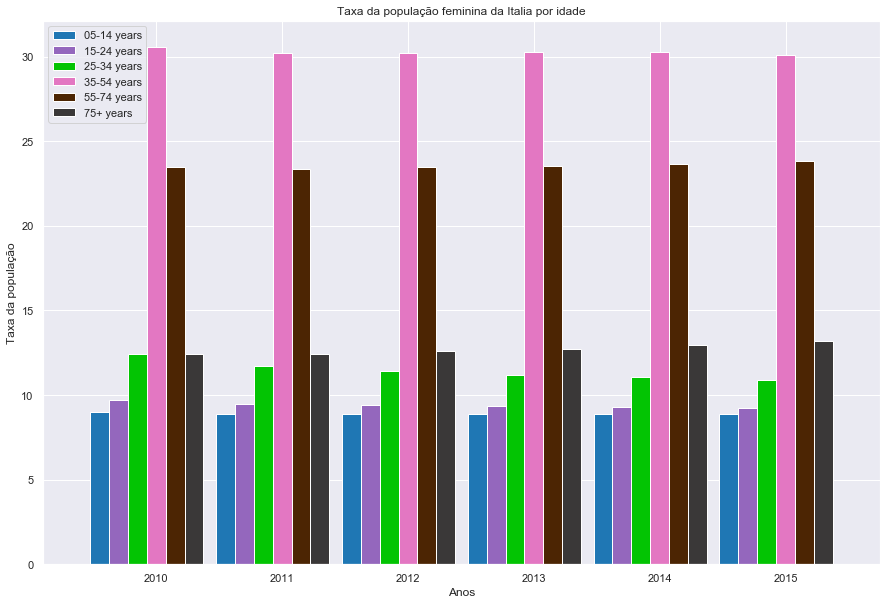

In [136]:
generate_chart_rate_population_age(italy_female, "Taxa da população", "Anos", "Taxa da população feminina da Italia por idade", "totalPopulationFemale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



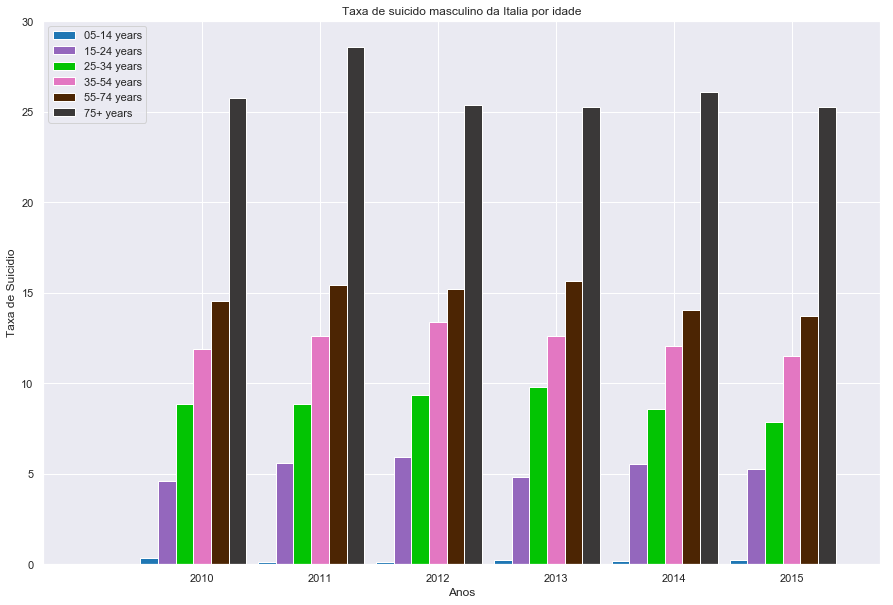

In [137]:
generate_chart_suicide_age(italy_male, "Taxa de Suicidio", "Anos", "Taxa de suicido masculino da Italia por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



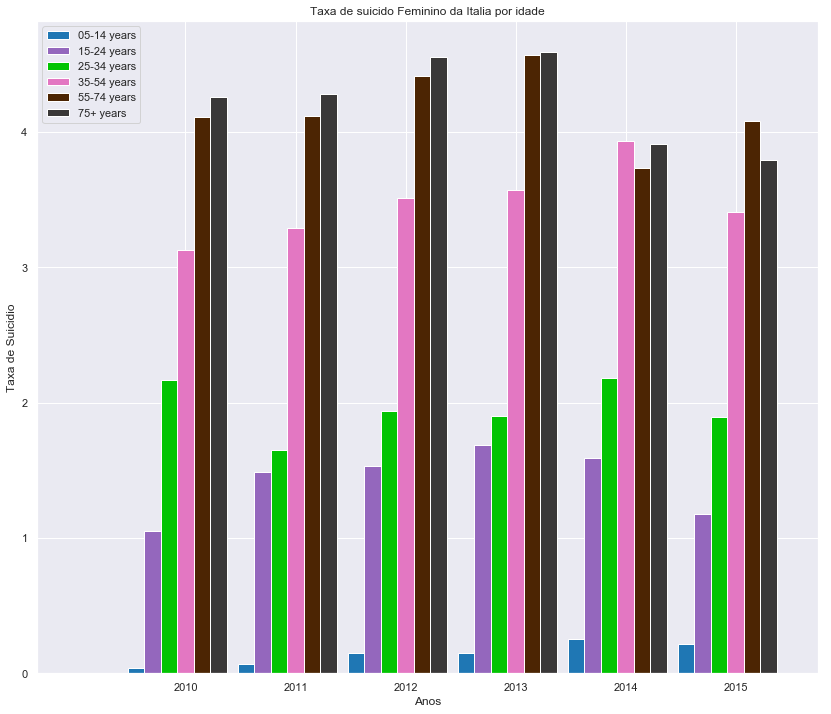

In [138]:
generate_chart_suicide_age(italy_female, "Taxa de Suicidio", "Anos", "Taxa de suicido Feminino da Italia por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



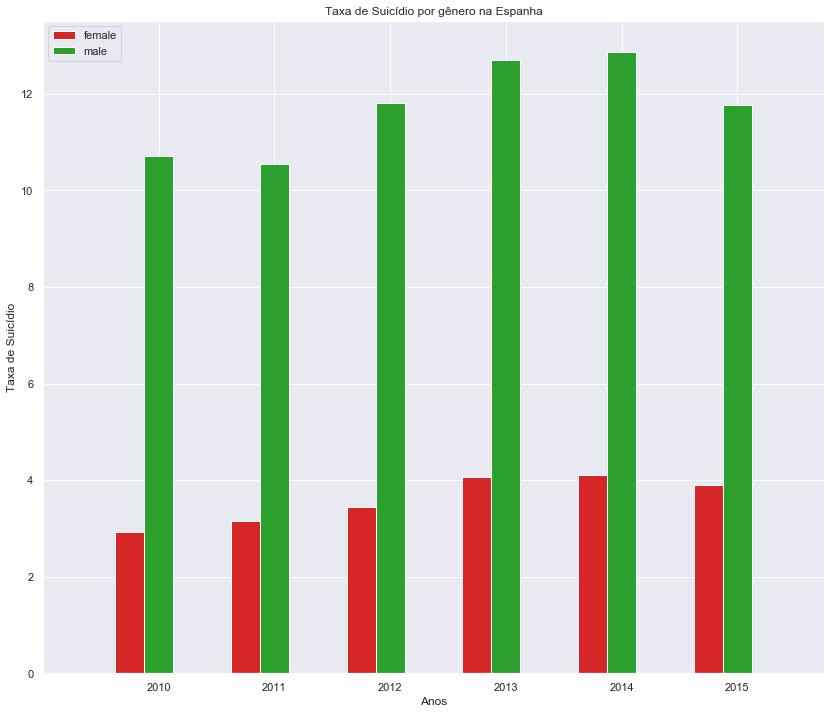

In [139]:
generate_chart_suicide_gen(gsp, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Espanha",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



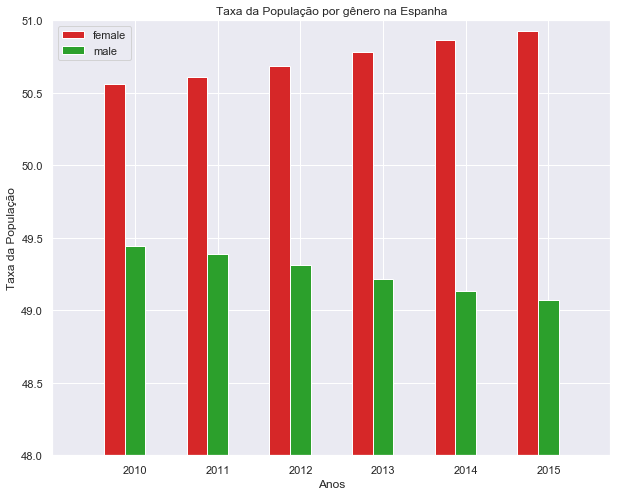

In [140]:
generate_chart_rate_population_gen(gsp, "Taxa da População", "Anos", "Taxa da População por gênero na Espanha",male_female_colors,48,51,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



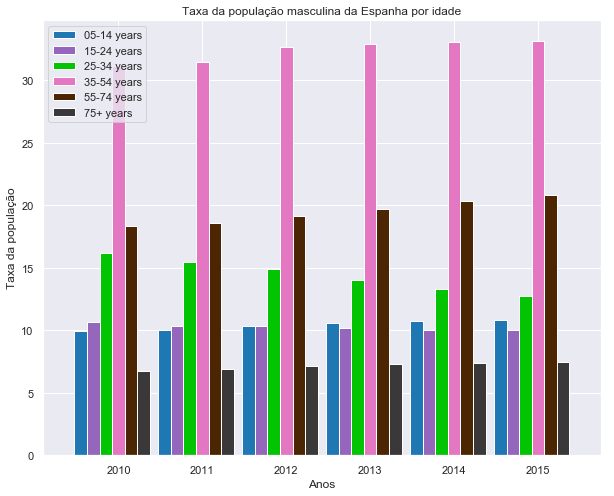

In [141]:
generate_chart_rate_population_age(spain_male, "Taxa da população", "Anos", "Taxa da população masculina da Espanha por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



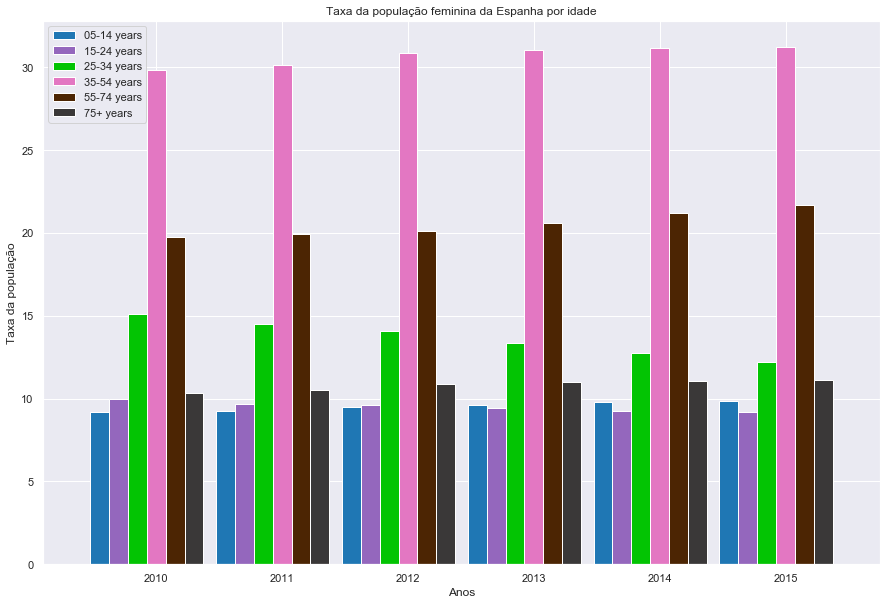

In [142]:
generate_chart_rate_population_age(spain_female, "Taxa da população", "Anos", "Taxa da população feminina da Espanha por idade", "totalPopulationFemale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



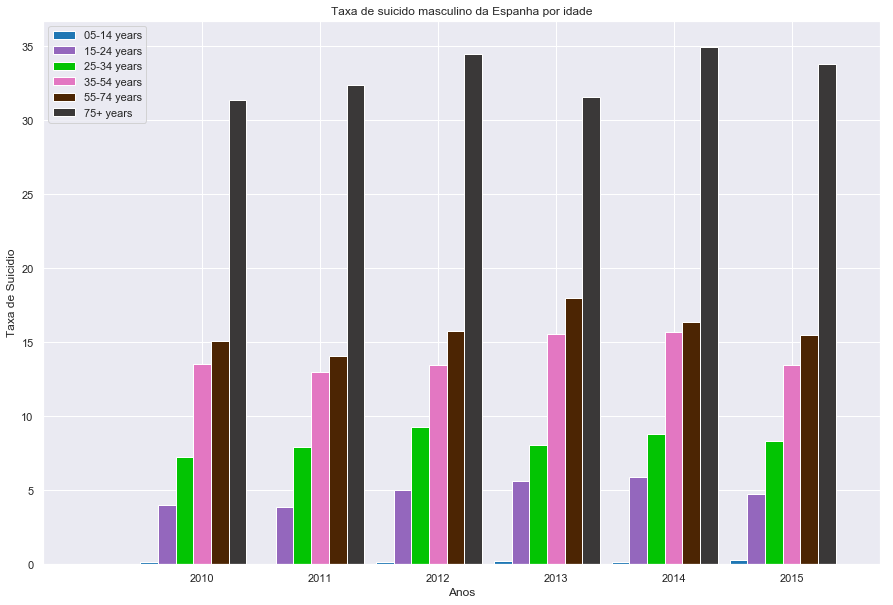

In [143]:
generate_chart_suicide_age(spain_male, "Taxa de Suicidio", "Anos", "Taxa de suicido masculino da Espanha por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



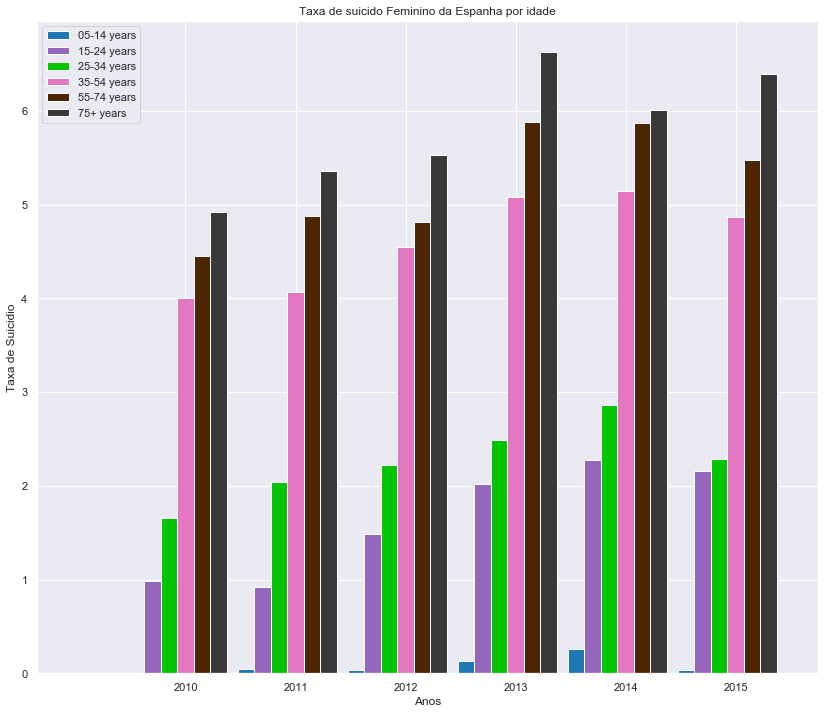

In [144]:
generate_chart_suicide_age(spain_female, "Taxa de Suicidio", "Anos", "Taxa de suicido Feminino da Espanha por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



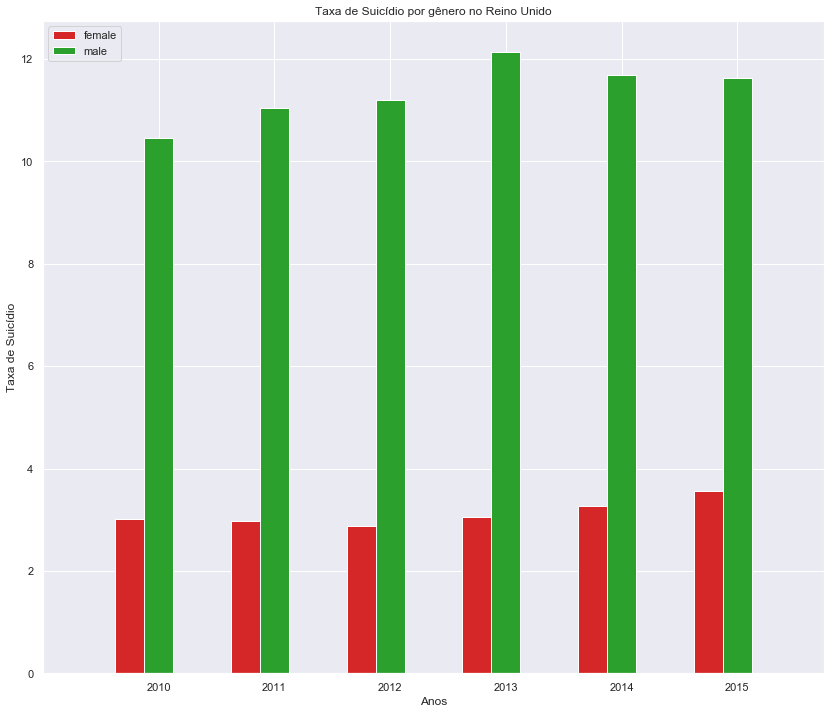

In [145]:
generate_chart_suicide_gen(guk, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero no Reino Unido",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



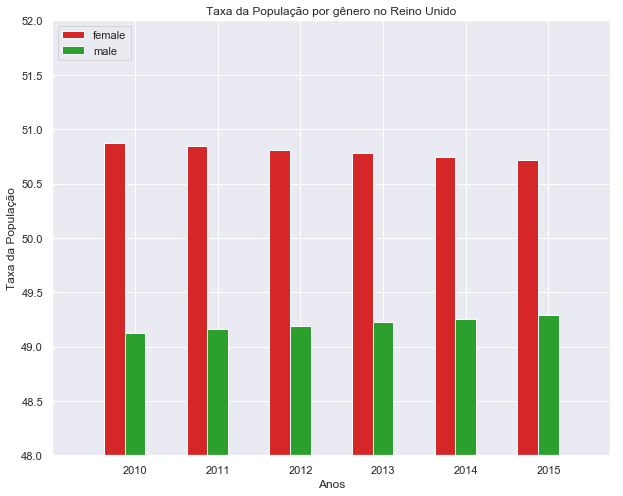

In [146]:
generate_chart_rate_population_gen(guk, "Taxa da População", "Anos", "Taxa da População por gênero no Reino Unido",male_female_colors,48,52,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



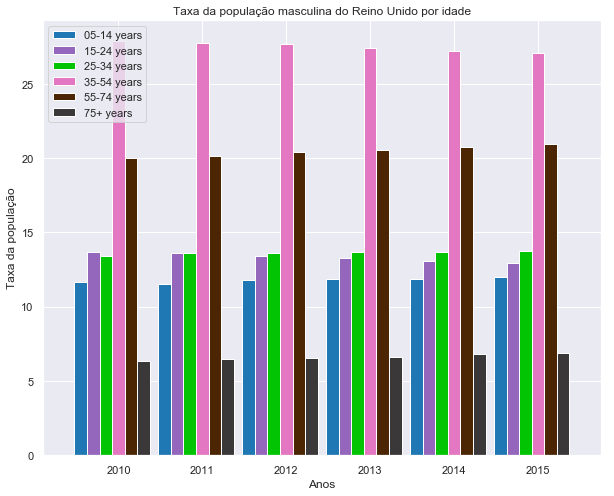

In [147]:
generate_chart_rate_population_age(unitedKingdom_male, "Taxa da população", "Anos", "Taxa da população masculina do Reino Unido por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



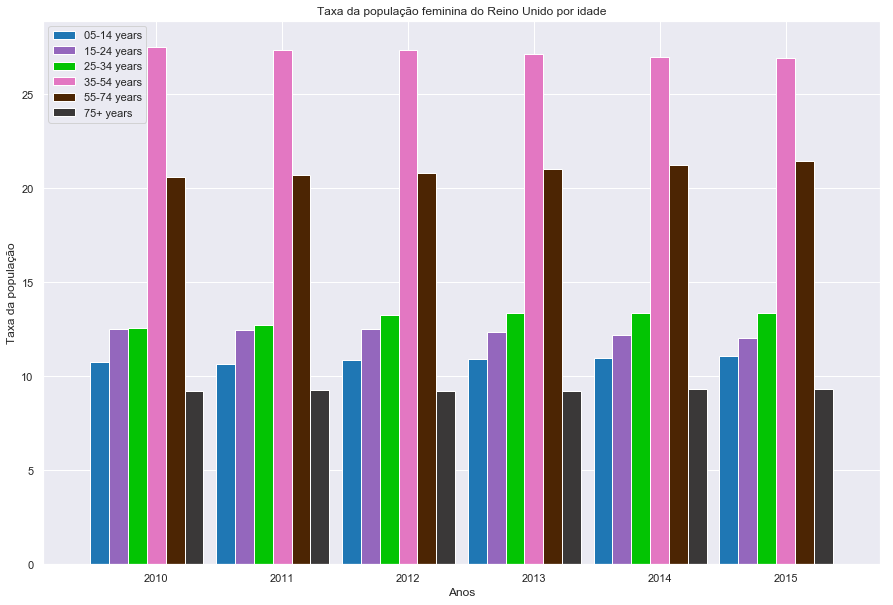

In [148]:
generate_chart_rate_population_age(unitedKingdom_female, "Taxa da população", "Anos", "Taxa da população feminina do Reino Unido por idade", "totalPopulationFemale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



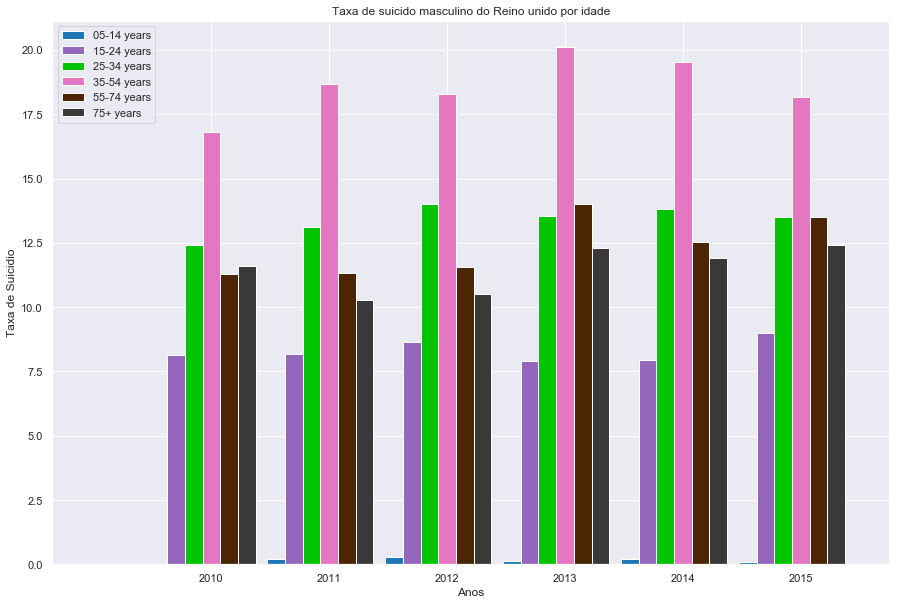

In [149]:
generate_chart_suicide_age(unitedKingdom_male, "Taxa de Suicidio", "Anos", "Taxa de suicido masculino do Reino unido por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



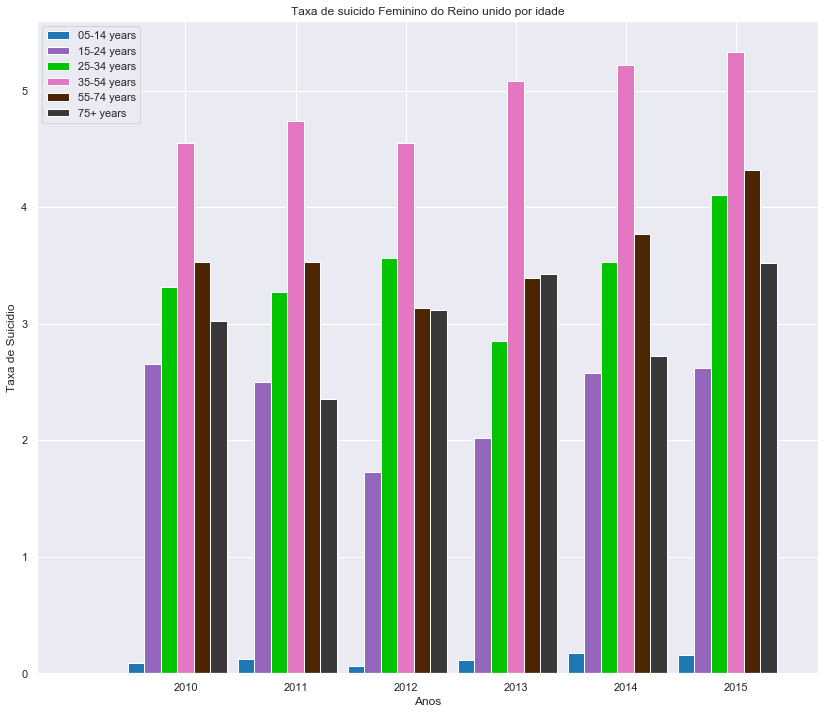

In [150]:
generate_chart_suicide_age(unitedKingdom_female, "Taxa de Suicidio", "Anos", "Taxa de suicido Feminino do Reino unido por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



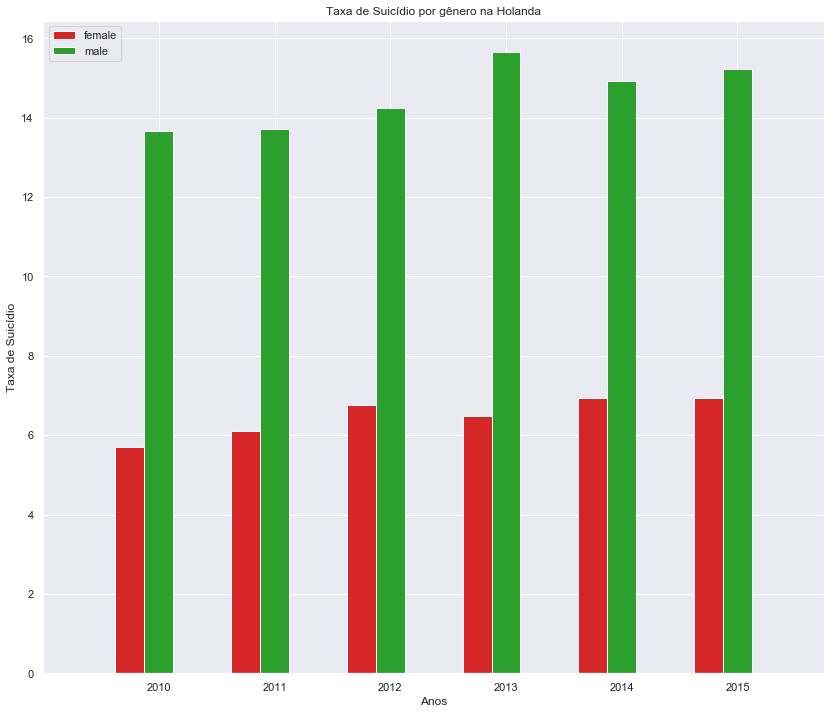

In [151]:
generate_chart_suicide_gen(gne, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Holanda",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



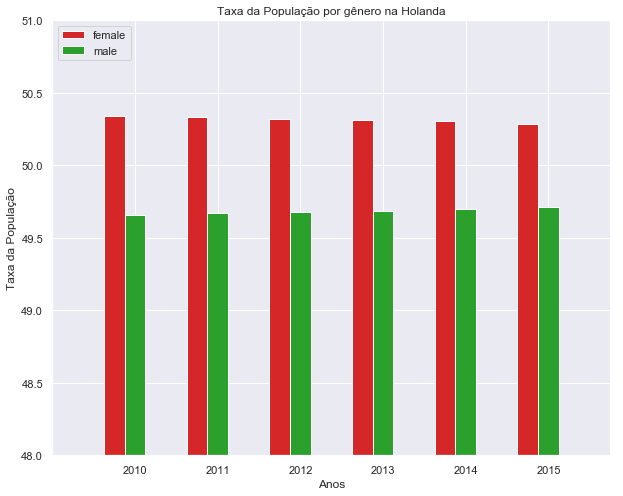

In [152]:
generate_chart_rate_population_gen(gne, "Taxa da População", "Anos", "Taxa da População por gênero na Holanda",male_female_colors,48,51,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



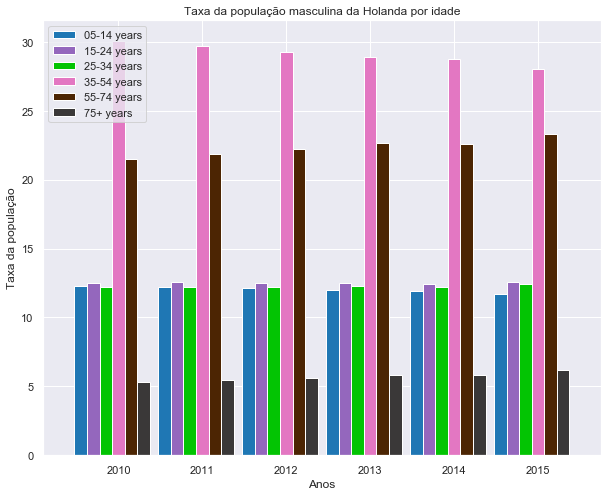

In [153]:
generate_chart_rate_population_age(netherlands_male, "Taxa da população", "Anos", "Taxa da população masculina da Holanda por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



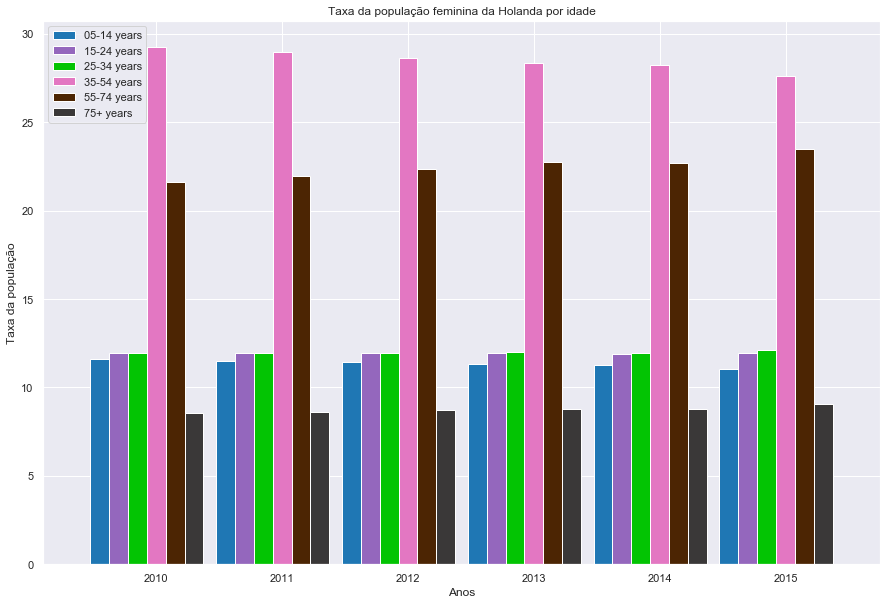

In [154]:
generate_chart_rate_population_age(netherlands_female, "Taxa da população", "Anos", "Taxa da população feminina da Holanda por idade", "totalPopulationFemale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



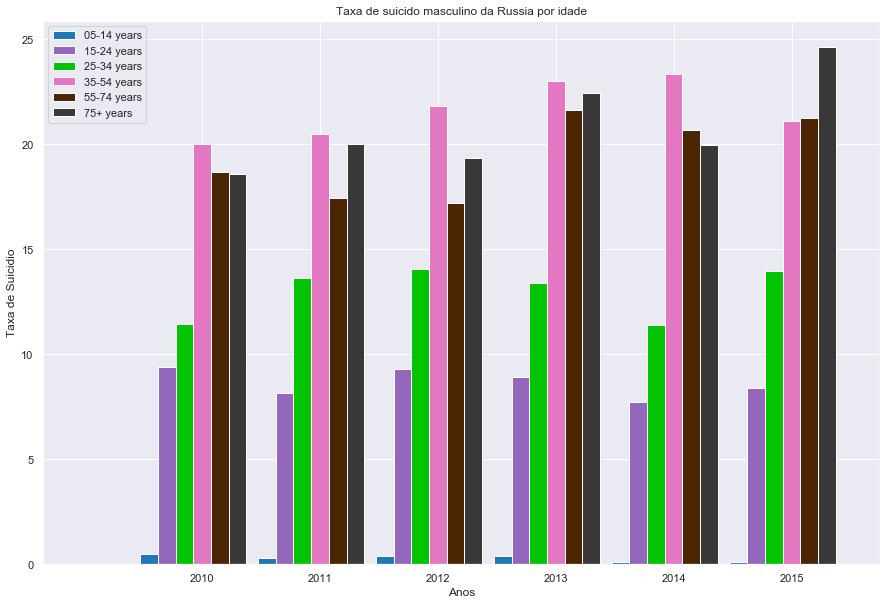

In [155]:
generate_chart_suicide_age(netherlands_male, "Taxa de Suicidio", "Anos", "Taxa de suicido masculino da Russia por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



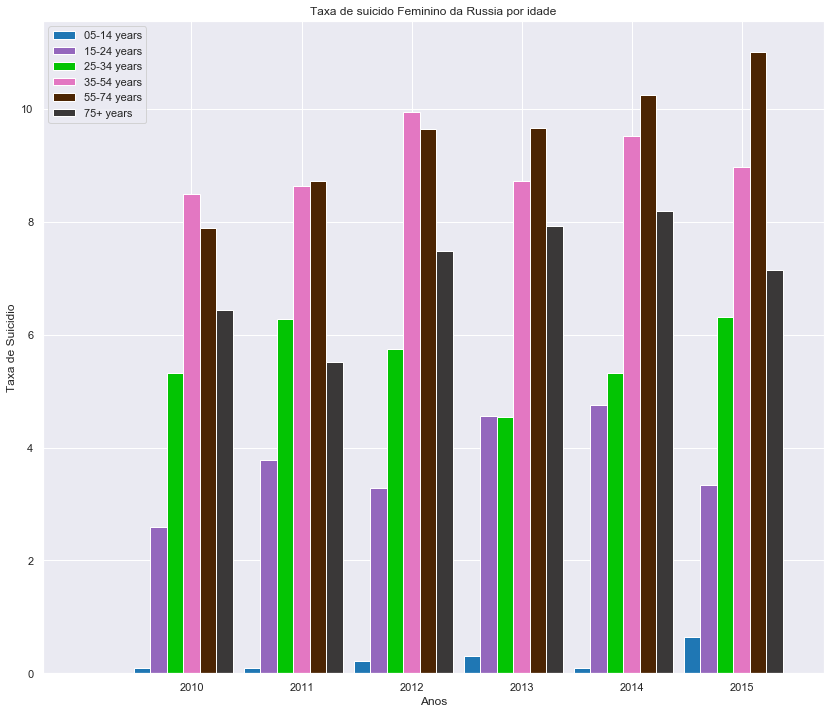

In [156]:
generate_chart_suicide_age(netherlands_female, "Taxa de Suicidio", "Anos", "Taxa de suicido Feminino da Russia por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



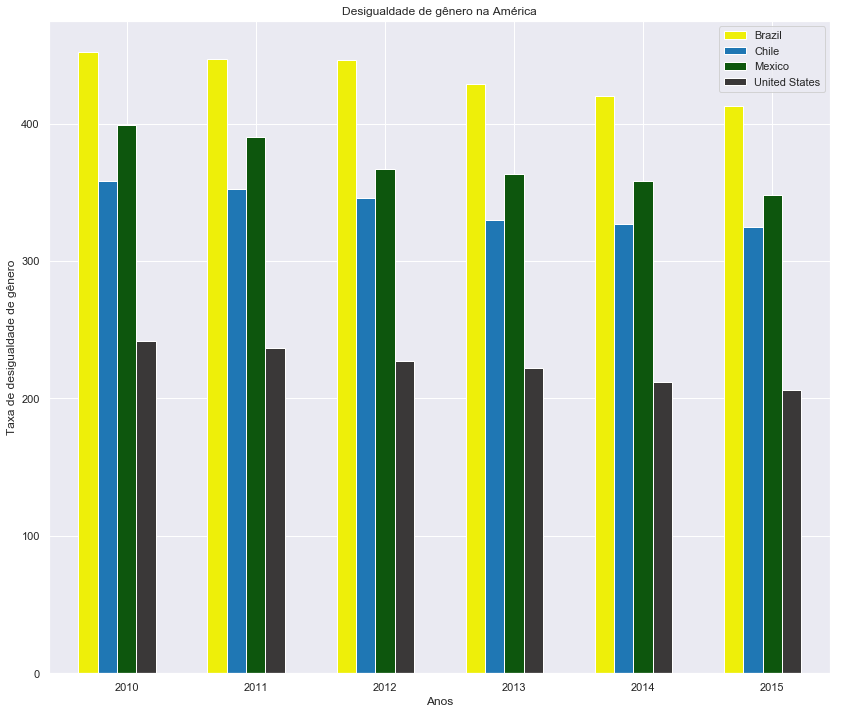

In [157]:
generate_chart_gender_inequality(gamerica,"Taxa de desigualdade de gênero","Anos","Desigualdade de gênero na América", america_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



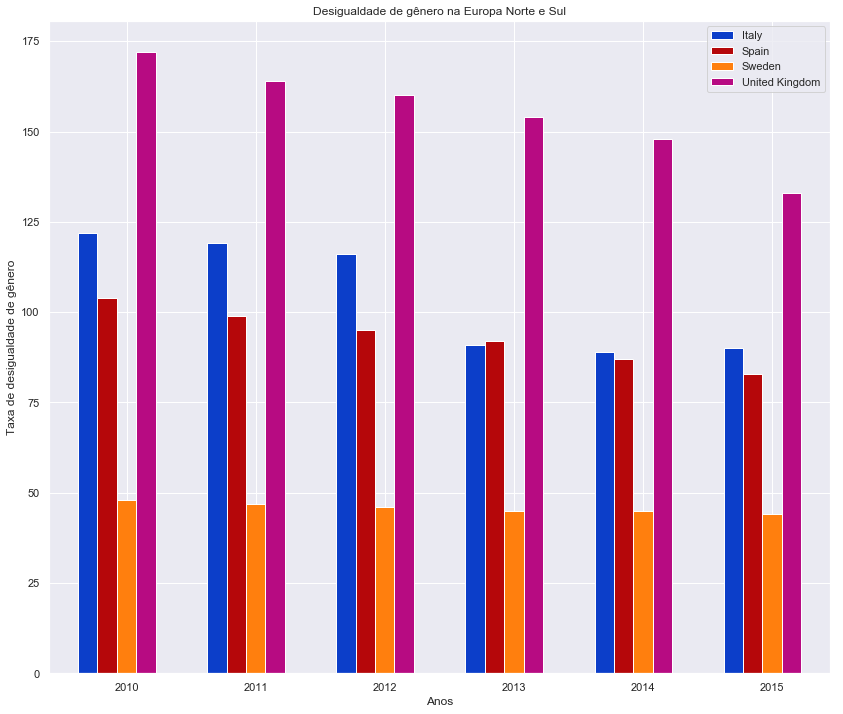

In [158]:
generate_chart_gender_inequality(geurons,"Taxa de desigualdade de gênero","Anos","Desigualdade de gênero na Europa Norte e Sul", europe_ns_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



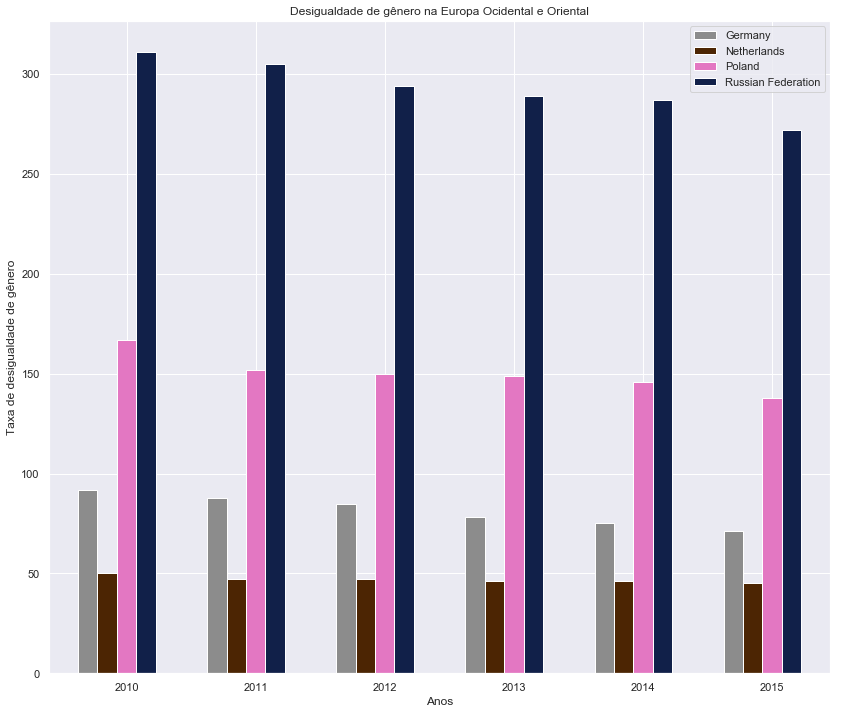

In [159]:
generate_chart_gender_inequality(geurowe,"Taxa de desigualdade de gênero","Anos","Desigualdade de gênero na Europa Ocidental e Oriental", europe_we_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



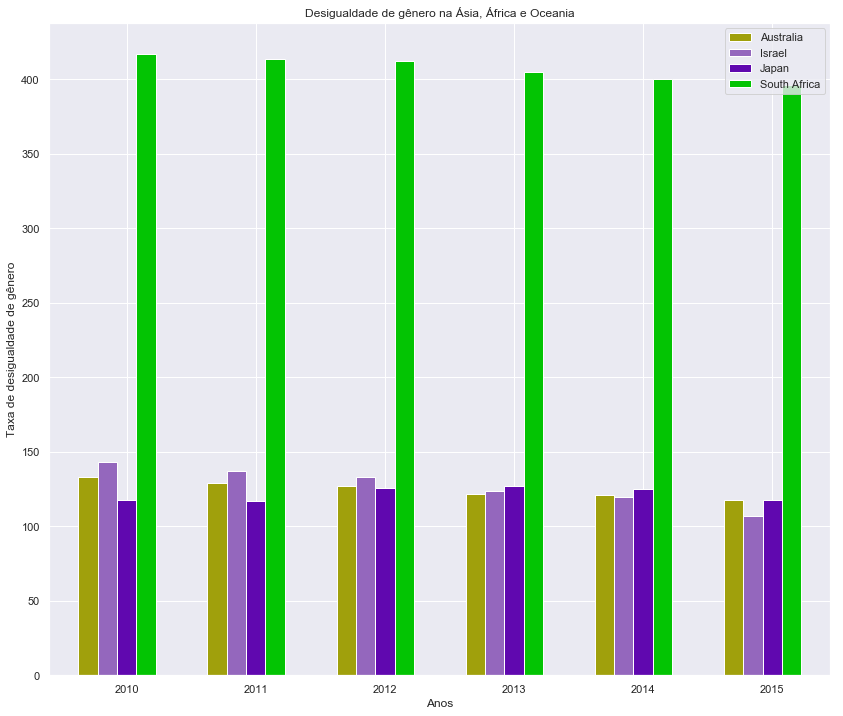

In [160]:
generate_chart_gender_inequality(gaao,"Taxa de desigualdade de gênero","Anos","Desigualdade de gênero na Ásia, África e Oceania", aao_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



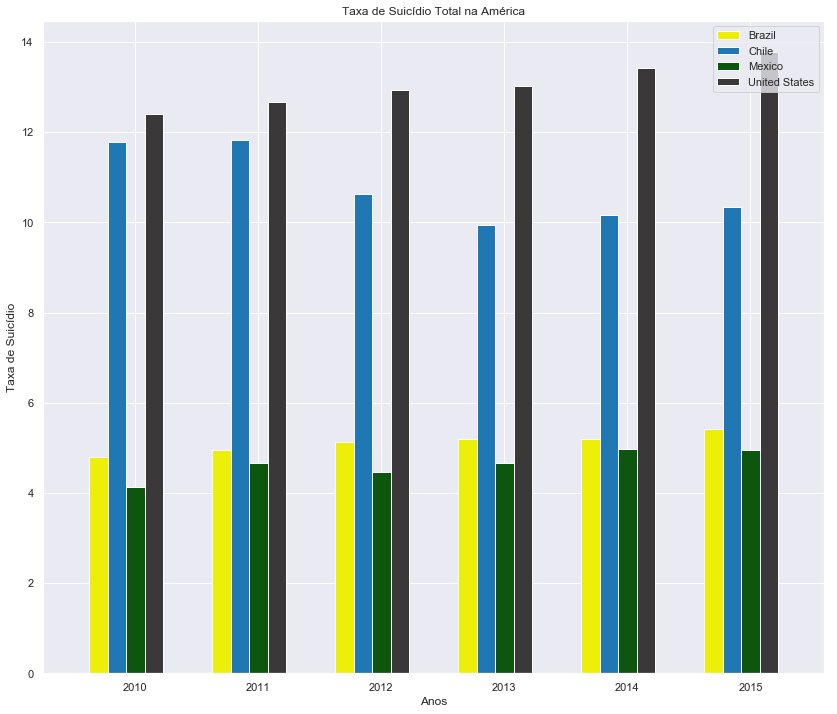

In [161]:
generate_chart_suicide_total(gamerica, "Taxa de Suicídio", "Anos", "Taxa de Suicídio Total na América",america_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



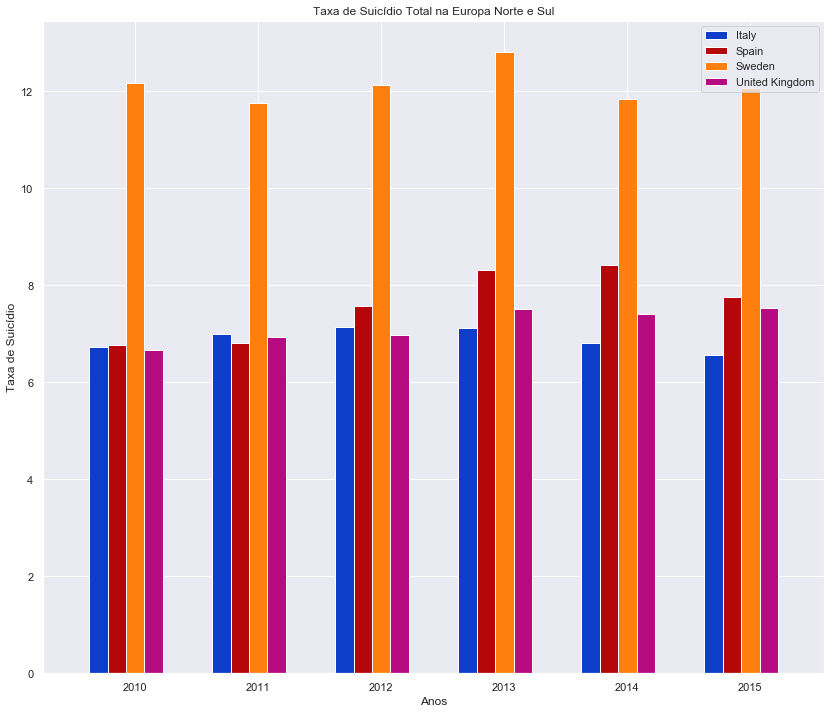

In [162]:
generate_chart_suicide_total(geurons, "Taxa de Suicídio", "Anos", "Taxa de Suicídio Total na Europa Norte e Sul",europe_ns_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



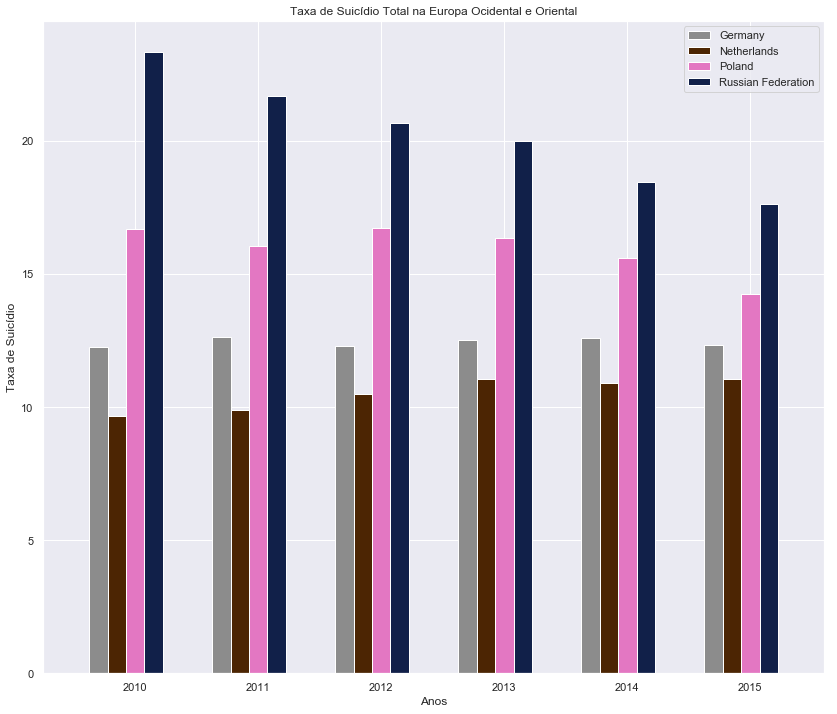

In [163]:
generate_chart_suicide_total(geurowe, "Taxa de Suicídio", "Anos", "Taxa de Suicídio Total na Europa Ocidental e Oriental",europe_we_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



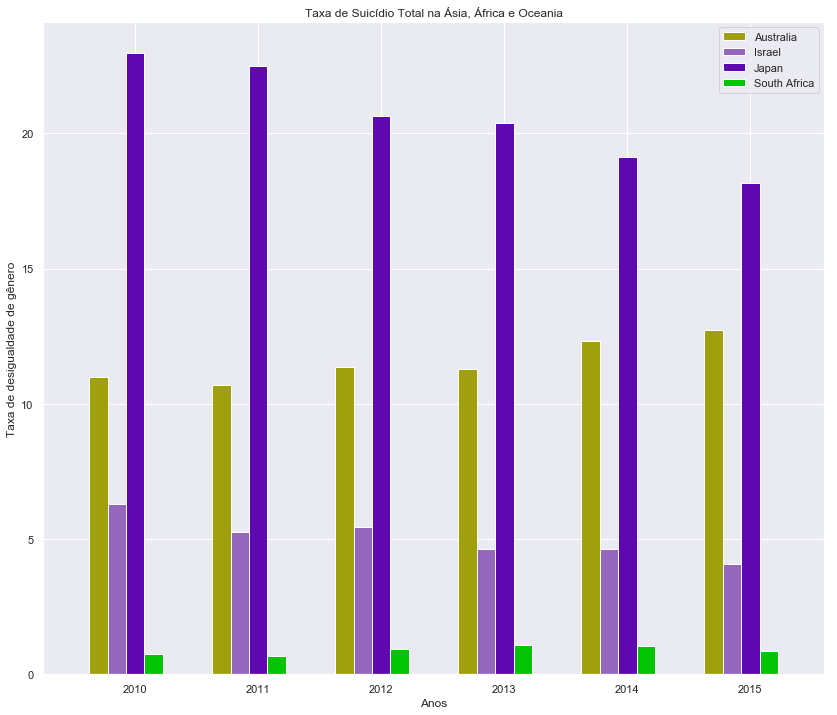

In [164]:
generate_chart_suicide_total(gaao,"Taxa de desigualdade de gênero","Anos","Taxa de Suicídio Total na Ásia, África e Oceania", aao_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



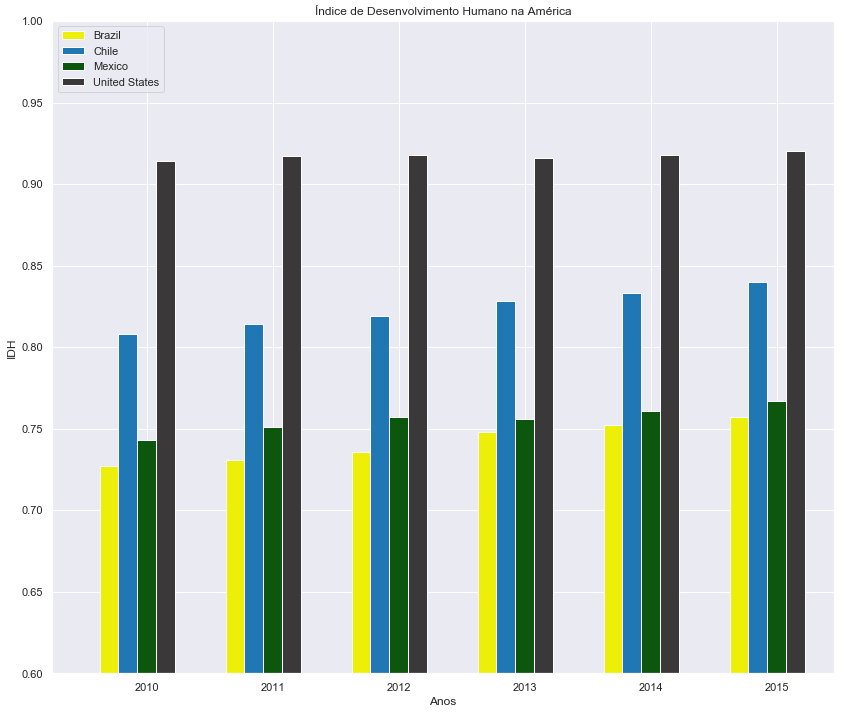

In [165]:
generate_chart_hdi_total(gamerica, "IDH", "Anos", "Índice de Desenvolvimento Humano na América",america_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



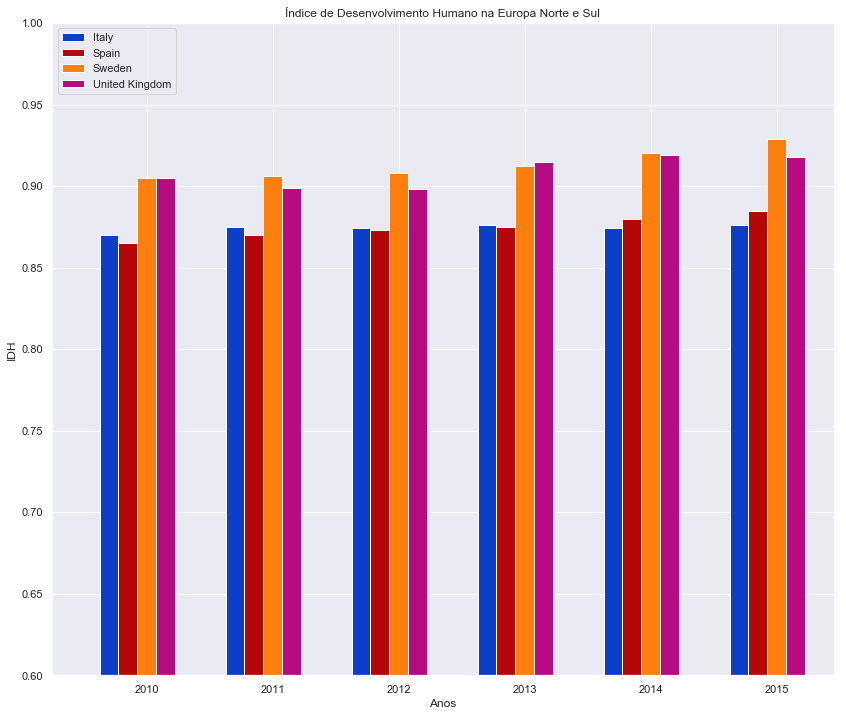

In [166]:
generate_chart_hdi_total(geurons, "IDH", "Anos", "Índice de Desenvolvimento Humano na Europa Norte e Sul",europe_ns_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



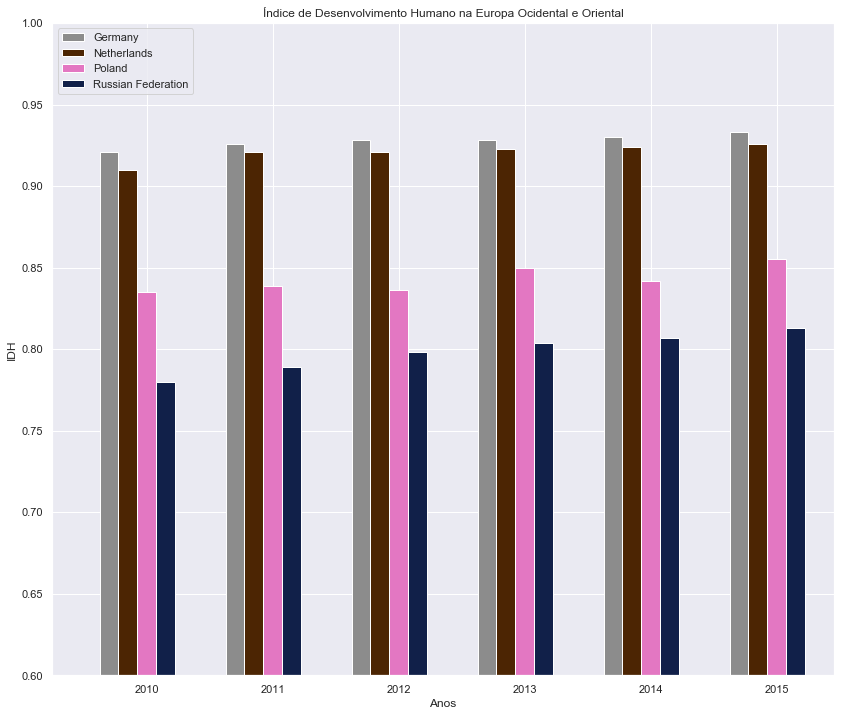

In [167]:
generate_chart_hdi_total(geurowe, "IDH", "Anos", "Índice de Desenvolvimento Humano na Europa Ocidental e Oriental",europe_we_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



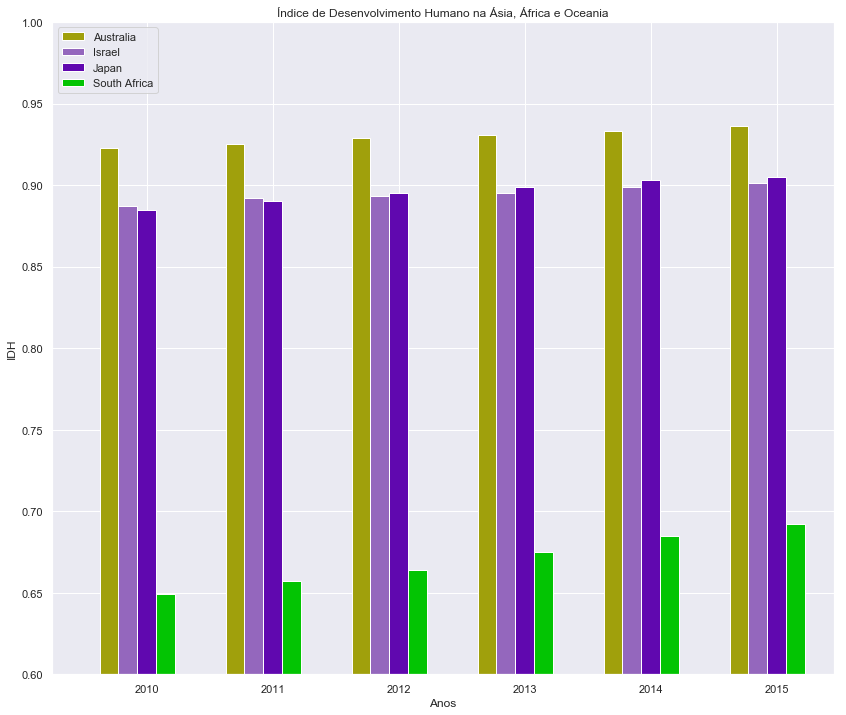

In [168]:
generate_chart_hdi_total(gaao,"IDH","Anos","Índice de Desenvolvimento Humano na Ásia, África e Oceania", aao_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



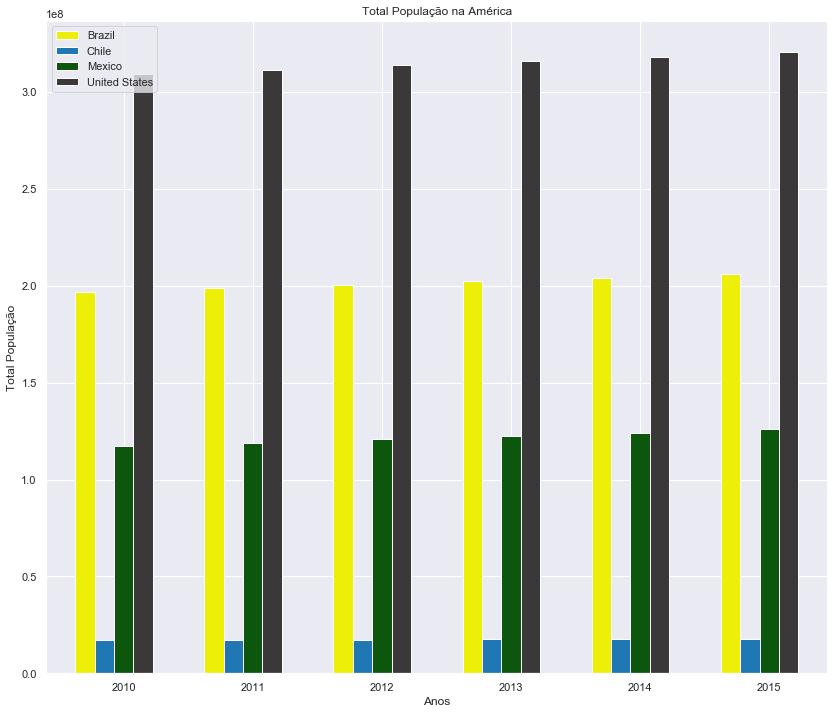

In [169]:
generate_chart_total_pop(gamerica, "Total População", "Anos", "Total População na América",america_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



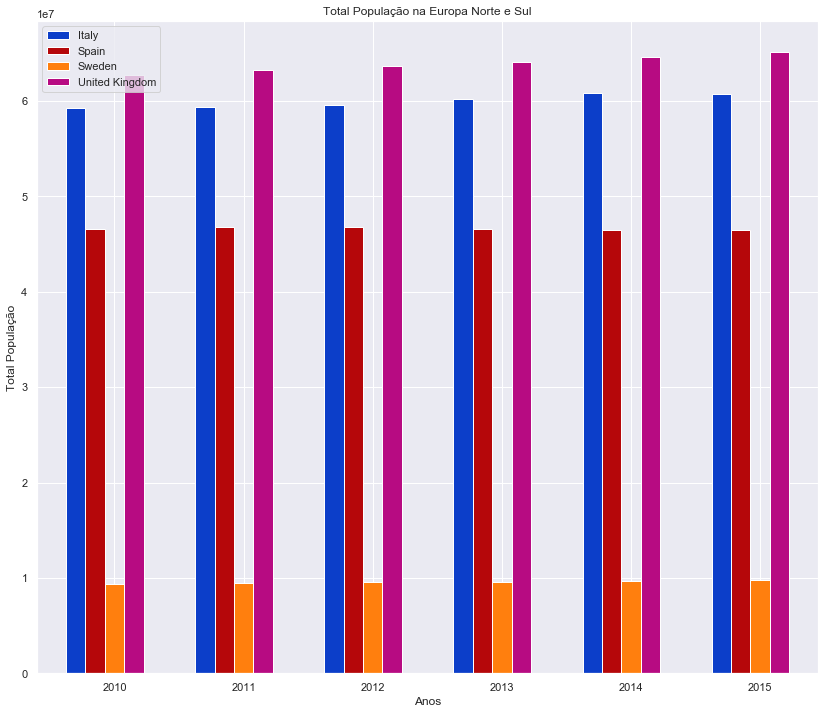

In [170]:
generate_chart_total_pop(geurons, "Total População", "Anos", "Total População na Europa Norte e Sul",europe_ns_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



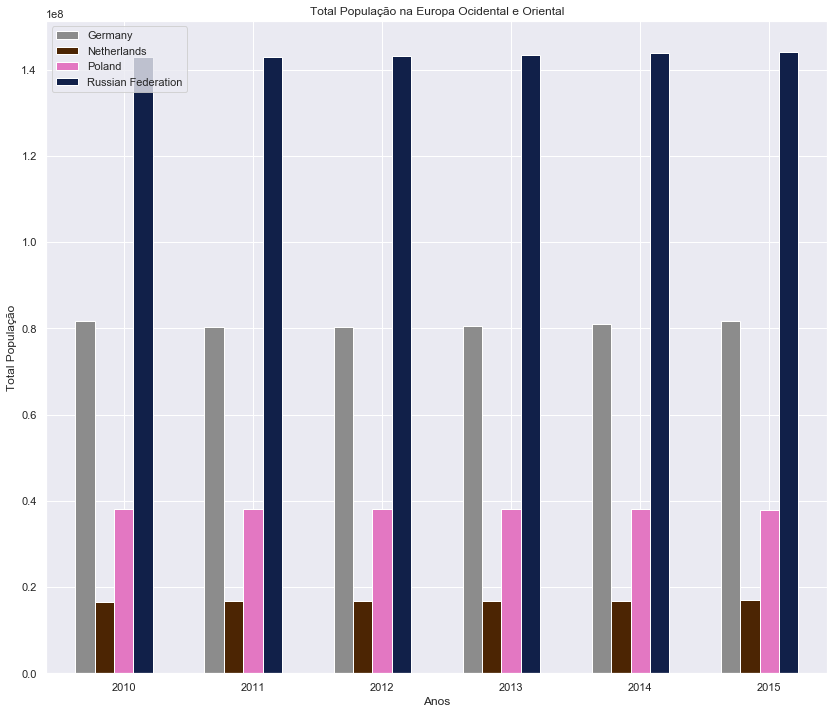

In [171]:
generate_chart_total_pop(geurowe, "Total População", "Anos", "Total População na Europa Ocidental e Oriental",europe_we_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



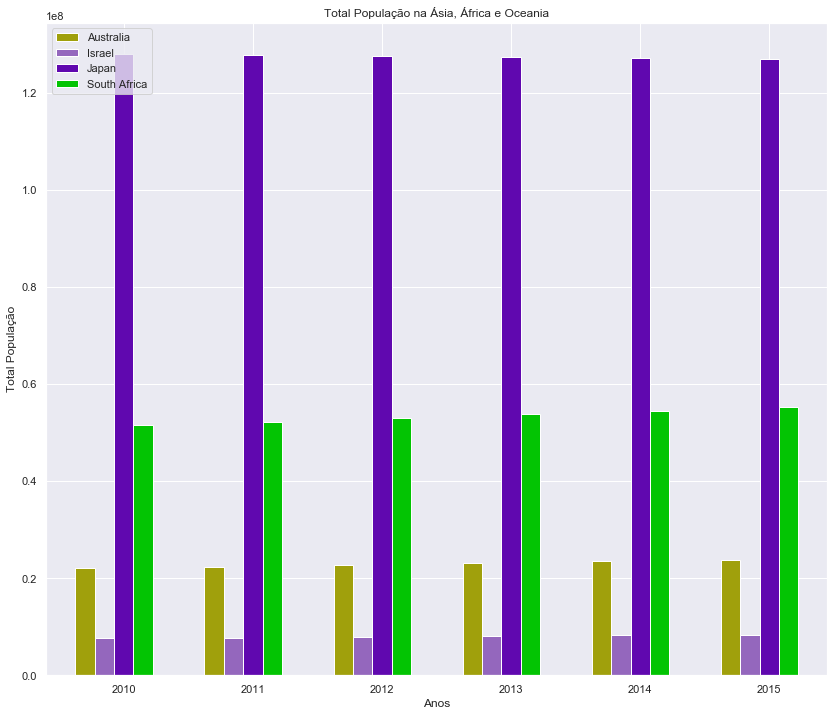

In [172]:
generate_chart_total_pop(gaao,"Total População","Anos","Total População na Ásia, África e Oceania", aao_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



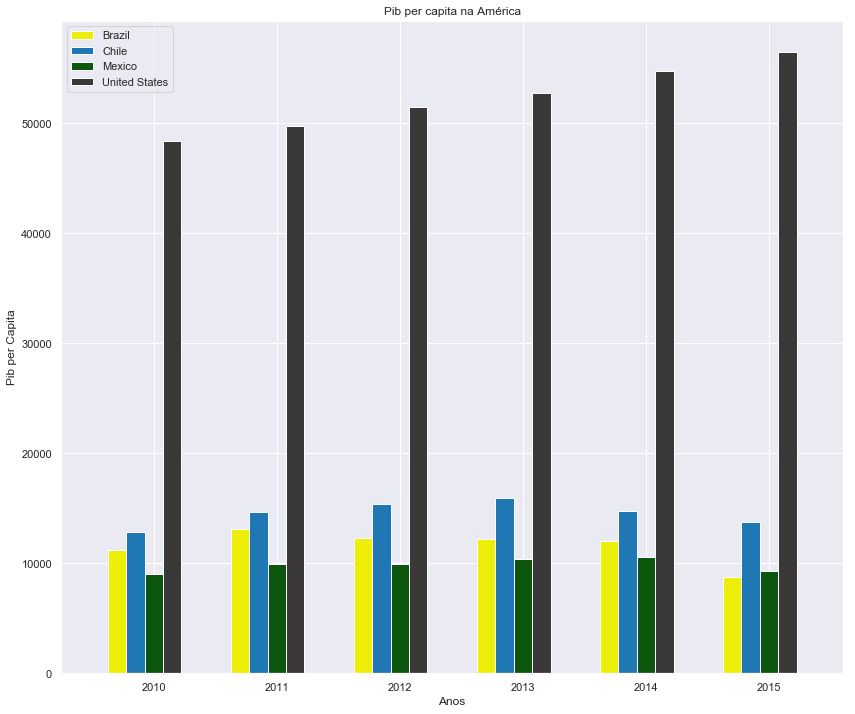

In [173]:
generate_chart_gdp_pc(gamerica, "Pib per Capita", "Anos", "Pib per capita na América",america_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



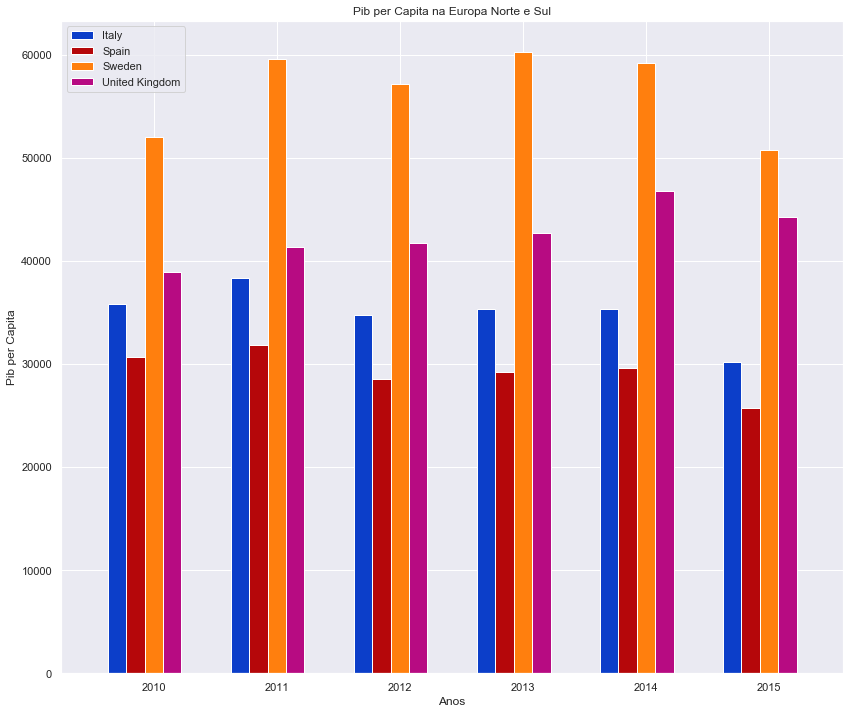

In [174]:
generate_chart_gdp_pc(geurons, "Pib per Capita", "Anos", "Pib per Capita na Europa Norte e Sul",europe_ns_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



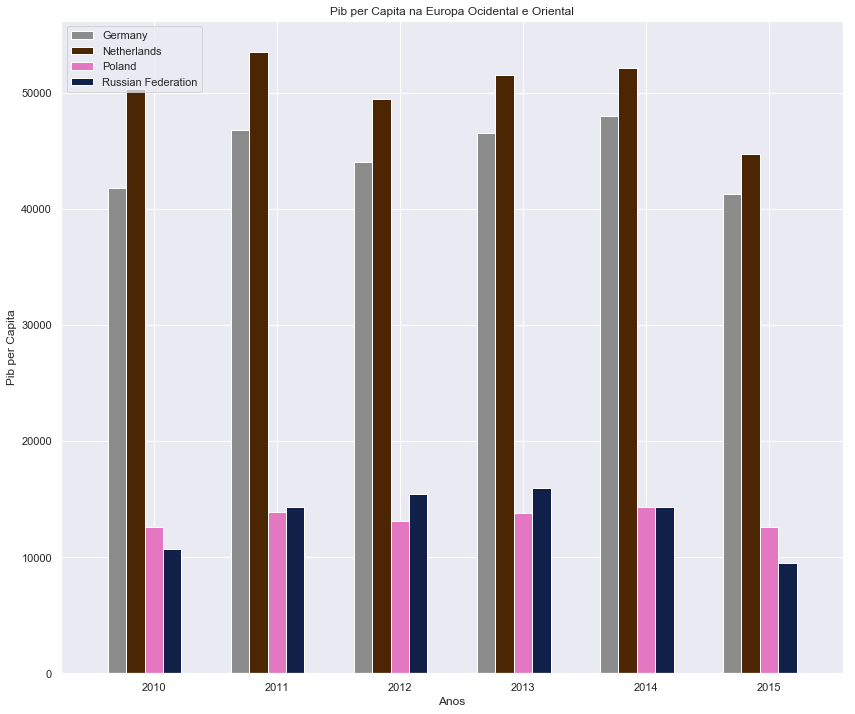

In [175]:
generate_chart_gdp_pc(geurowe, "Pib per Capita", "Anos", "Pib per Capita na Europa Ocidental e Oriental",europe_we_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



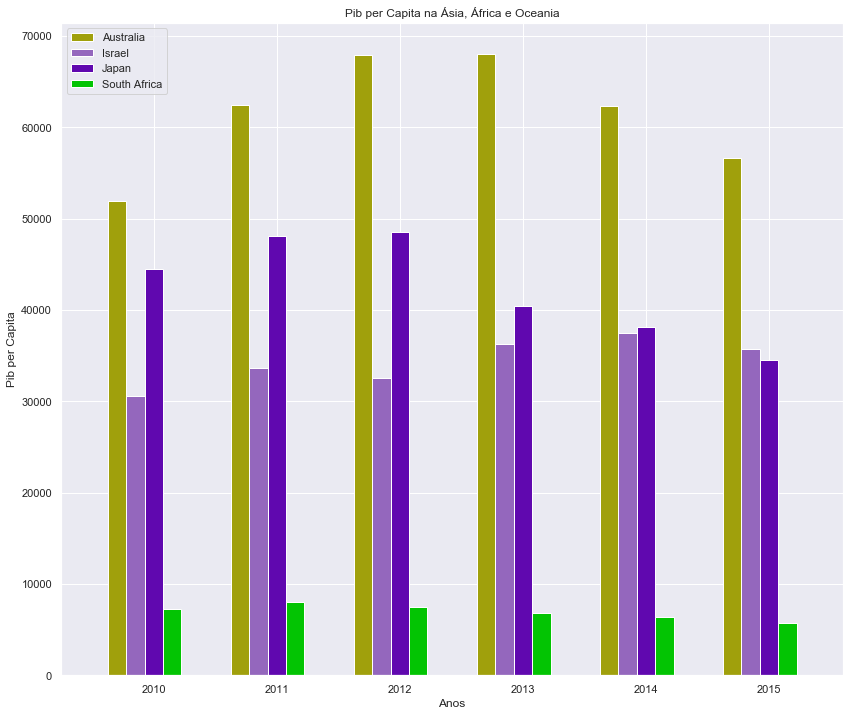

In [176]:
generate_chart_gdp_pc(gaao,"Pib per Capita","Anos","Pib per Capita na Ásia, África e Oceania", aao_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



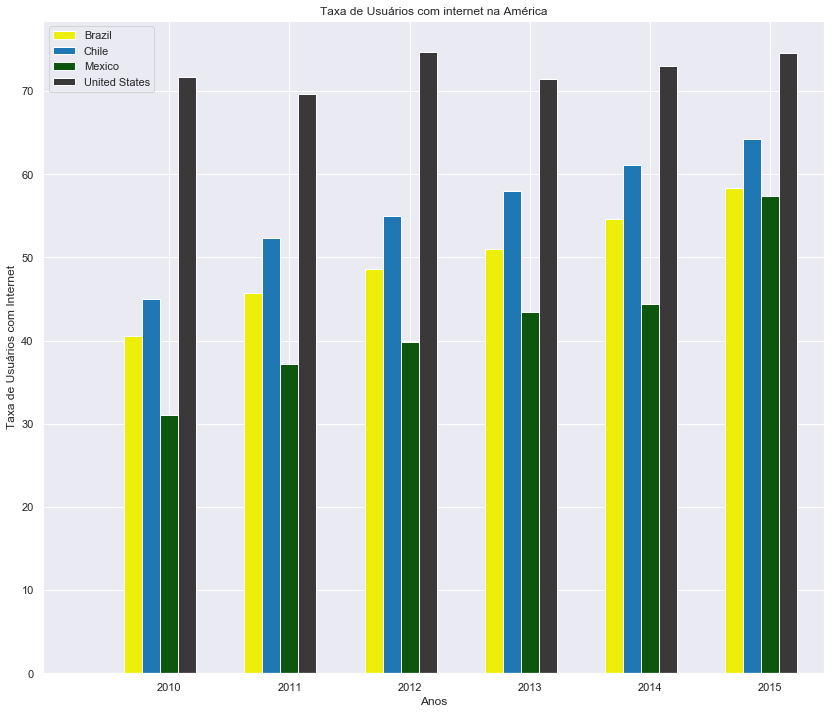

In [177]:
generate_chart_users_internet(gamerica, "Taxa de Usuários com Internet", "Anos", "Taxa de Usuários com internet na América", america_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



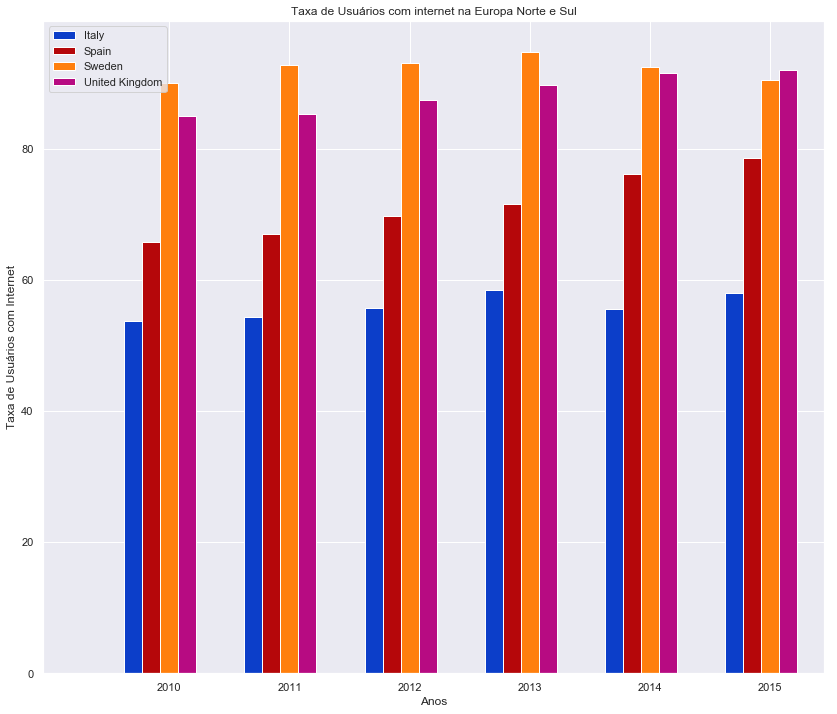

In [178]:
generate_chart_users_internet(geurons, "Taxa de Usuários com Internet", "Anos", "Taxa de Usuários com internet na Europa Norte e Sul", europe_ns_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



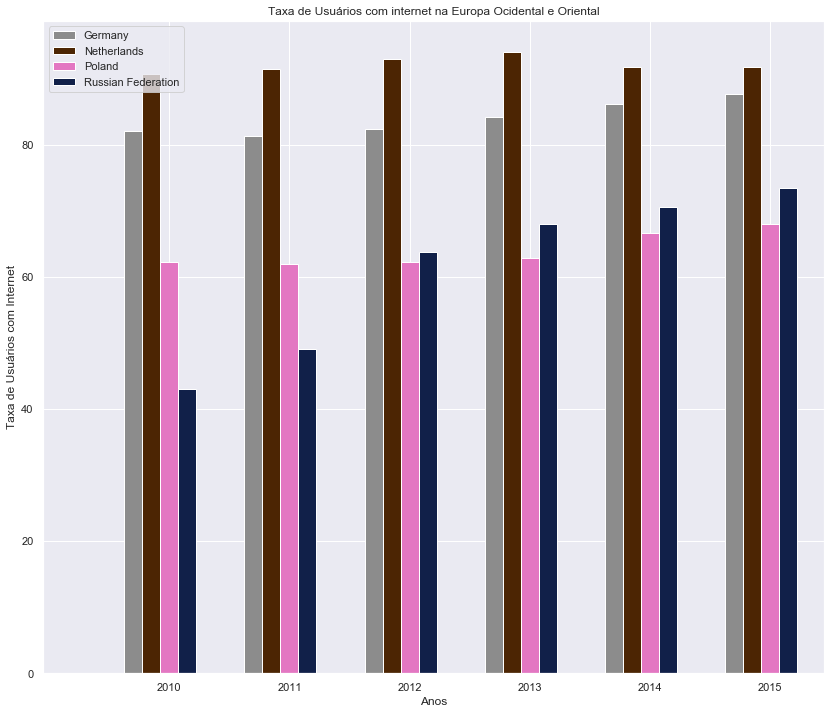

In [179]:
generate_chart_users_internet(geurowe, "Taxa de Usuários com Internet", "Anos", "Taxa de Usuários com internet na Europa Ocidental e Oriental", europe_we_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



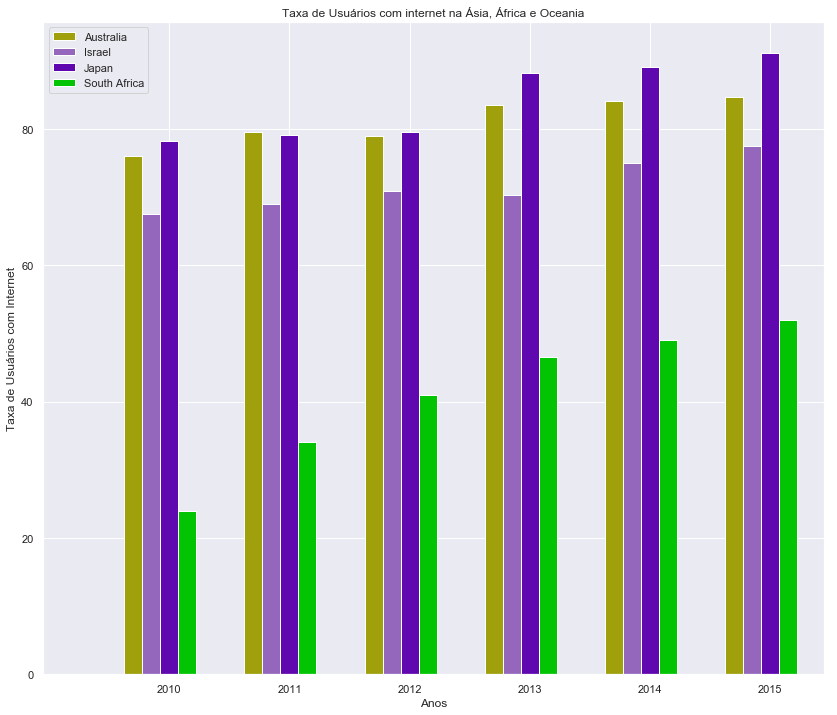

In [180]:
generate_chart_users_internet(gaao, "Taxa de Usuários com Internet", "Anos", "Taxa de Usuários com internet na Ásia, África e Oceania", aao_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



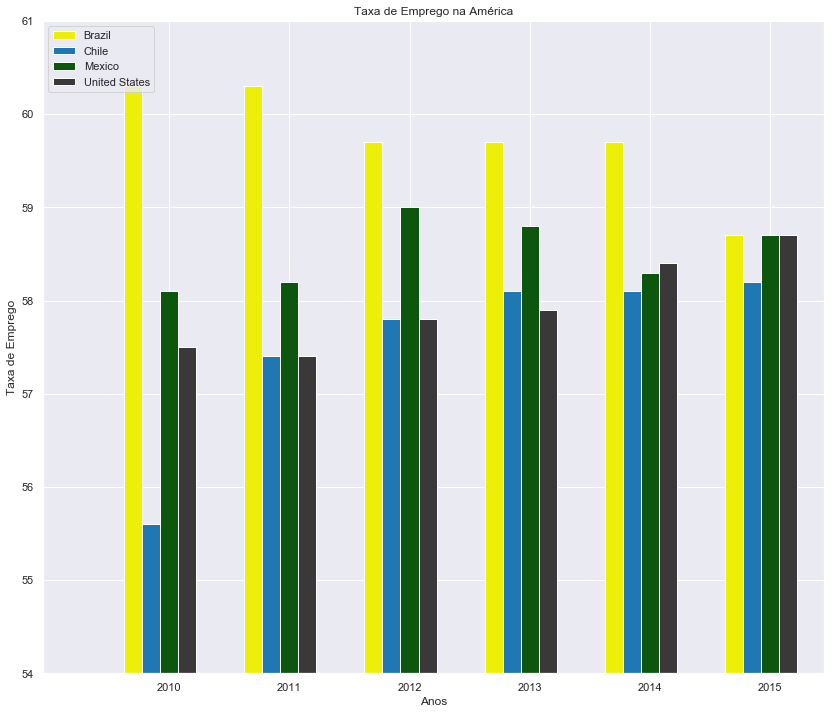

In [181]:
generate_chart_employment(gamerica, "Taxa de Emprego", "Anos", "Taxa de Emprego na América",america_colors,54,61)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



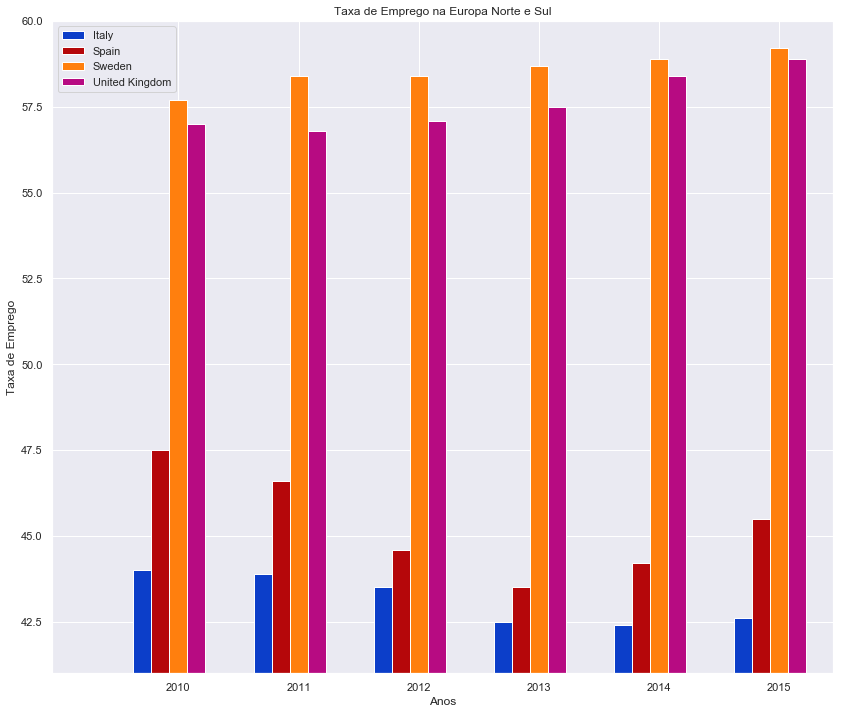

In [182]:
generate_chart_employment(geurons, "Taxa de Emprego", "Anos", "Taxa de Emprego na Europa Norte e Sul",europe_ns_colors,41,60)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



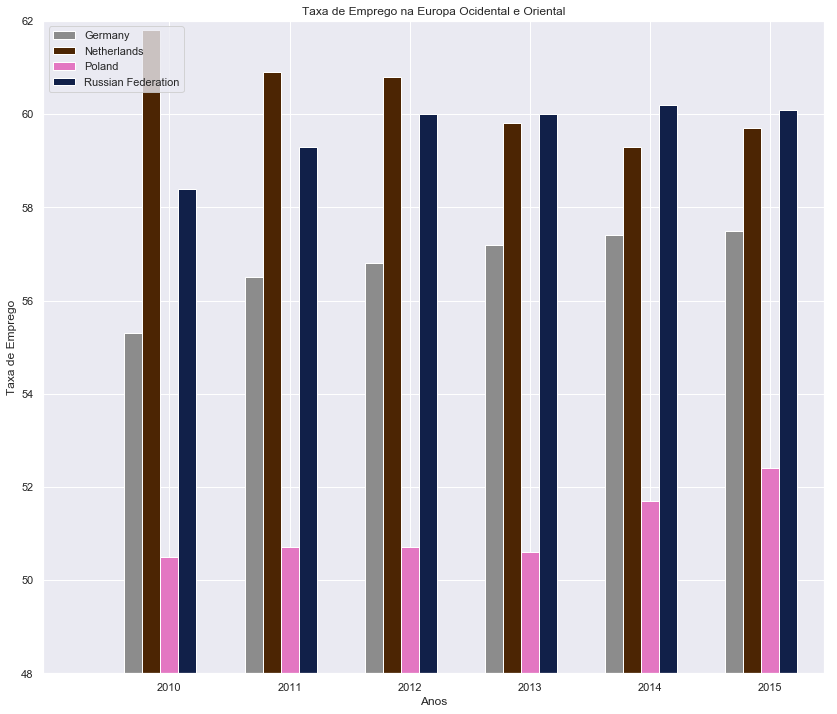

In [183]:
generate_chart_employment(geurowe, "Taxa de Emprego", "Anos", "Taxa de Emprego na Europa Ocidental e Oriental",europe_we_colors,48,62)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



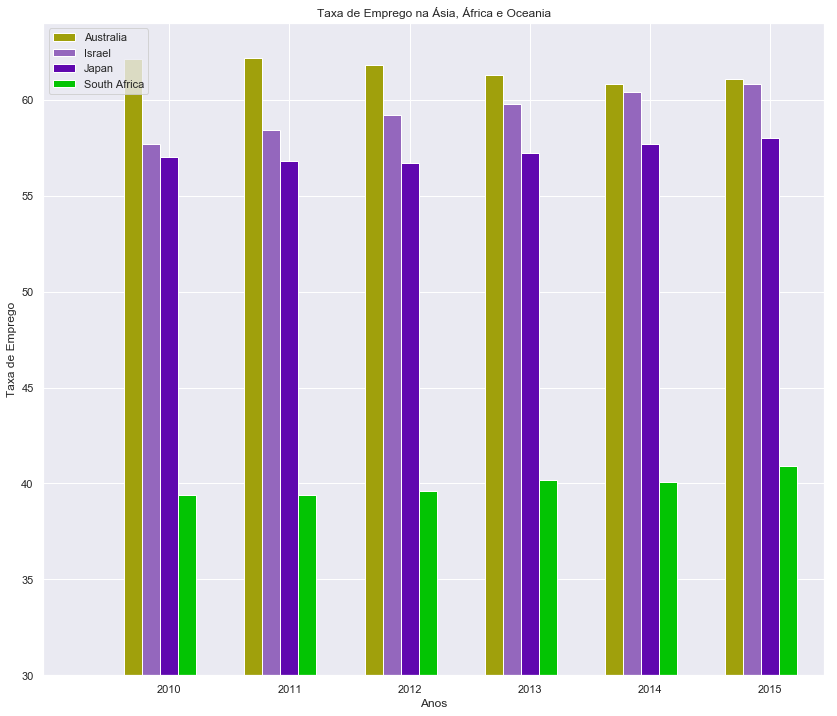

In [184]:
generate_chart_employment(gaao, "Taxa de Emprego", "Anos", "Taxa de Emprego na Ásia, África e Oceania",aao_colors,30,64)

In [185]:
def generate_growth_pop_age_lin(df, col_y, col_f, col_m, x_limit, x_label, y_label, legend, title):
    plt.plot(df[col_y],df[col_f], color='red' )
    plt.plot (df[col_y],df[col_m], color='green' )
    plt.xlim(x_limit)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(legend)
    plt.title(title)
    plt.show()

